# UFC Machine Learning Prediction Project

### *All Post-Scraping Work

- Author: Travis Royce
- traviscroyce@gmail.com
- linkedin.com/in/travis-royce

## Project Overview

The purpose of this project is to create a model to predict the outcome of UFC (Ultimate Fighting Championship) events. The UFC was created in 1993 with the expressed purpose of identifying the most effective martial art(s). This project is an extension of my curiosity into the original purpose of the UFC; what makes an effective martial artist, relative to an opponent?

## Business Overview
This project's end result will be an application which can help identify descrepancies between the "Vegas" odds of a fight and the model-predicted (i.e., theoretically more accurate) odds of that same fight. This could be used by bookmakers to increase revenues by offering slightly "better" odds than competitor bookmakers, given the model indicates it is appropriate. Alternatively, it could be used by bookmakers to create more accurate odds than previously, as the favorite only wins around 60% of the time in MMA.

## Data Overview

### Data Description

The majority of the data I used for this project I scraped from UFCStats.com. This website contains more statistics than any other website, but does not have some key metrics such as fighter sizes, bios, and odds. 

Thus, the odds were scraped from bestfightodds.com, while the fighter sizes and bios were scraped from ufc.com. 

Further, individual events and fights, and much from the final streamlit application, are scraped from ufc.com.

The data itself is fight-by-fight based data, originally from over 8,000 fights (which, after dropping for lack of data, decreased to around 5,000 by the final testing dataframe).

There are 350 final tested features in this dataset, and over 450 features in the non-tested version of the dataset, as many of the features are in-match statistics that are unknowable before a fight, so they had to be removed from the testing section. 

#### Data Limitations

I would really like to be able to categorize these martial artists based on their initial skillset and studies, but this is not possible with any dataset that I have seen. For instance, if a martial artist is a blackbelt in Jiujitsu since he was 6, I would like to know! Ideally, in further iterations of this project, I would be able to add historical, contextual data such as this. 


### Define Target Variable

The target variable in this project is if a fighter won an individual fight or not. 

### Define Scoring Metric

Because our data is evenly split between wins and losses, and for each fight there is only the choice of Fighter A or Fighter B, it renders recall and precision equivalent. Therefore, I chose to use accuracy.

### Project Structure

As there was no up-to-date database available, a good portion of this notebook is scraping and saving data using various methods with beautiful soup and selenium. 


# Feature Addition and Prediction

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from bs4 import BeautifulSoup
import time   
import shutil      
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from random import randint
import  random
import os
os.chdir('C:/Users/Travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')
from cmath import nan
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import shutil       
import datetime
from scipy.stats import norm
import requests
import json
import xgboost
from xgboost import XGBClassifier
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import pickle
from sklearn.metrics import fbeta_score
import winsound
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.svm import SVC

Load fights_df, which was created in the scraping notebook.

In [2]:
# Load fights df
fights_df = pd.read_csv('data/final/aggregates/Fight_DF.csv')
print(fights_df.shape)
fights_df.head()

(8359, 78)


Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0      Holly Holm   Irene Aldana     0     0                154   
1  Joshua Burkman      Josh Neer     1     0                 35   
2  Paddy Pimblett  Kazula Vargas     0     0                  3   
3      Greg Hardy     Ben Sosoli     0     0                 54   
4   Jared Rosholt  Josh Copeland     0     0                 22   

   A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0               301                 69               185   
1                88                 19                39   
2                 6                  7                 9   
3               105                 26                97   
4                45                  9                36   

   A_Sig_strike_percent  B_Sig_strike_percent  ... B_Clinch_Strikes_land  \
0                  0.51                  0.37  ...                     4   
1                  0.39                  0.48  ...                     5   
2                  0.50                  0.77  ...                     2   
3                  0.51                  0.26  ...                     0   
4                  0.48                  0.25  ...                     3   

  B_Clinch_Strikes_att  A_Clinch_Strikes_percent  B_Clinch_Strikes_percent  \
0                    4                  1.000000                  1.000000   
1                    9                  0.571429                  0.555556   
2                    2                  0.000000                  1.000000   
3                    1                  1.000000                  0.000000   
4                    8                  0.750000                  0.375000   

   A_Ground_Strikes_land  A_Ground_Strikes_att  B_Ground_Strikes_land  \
0                     13                    28                      0   
1                      5                    10                      7   
2                      1                     1                      3   
3                      0                     0                      0   
4                     10                    17                      0   

   B_Ground_Strikes_att  A_Ground_Strikes_percent  B_Ground_Strikes_percent  
0                     0                  0.464286                  0.000000  
1                     9                  0.500000                  0.777778  
2                     3                  1.000000                  1.000000  
3                     0                  0.000000                  0.000000  
4                     0                  0.588235                  0.000000  

[5 rows x 78 columns]

Add fighter odds to dataframe

In [3]:
# Load Fighter Odds
odds_by_fighter = pd.read_csv('data/final/odds/All_Odds_by_Fighter_WithChange.csv')

print(odds_by_fighter.shape)
odds_by_fighter.head()

(22954, 8)


fighter     5D  Ref  \
0       Brock Lesnar -225.0  NaN   
1          Frank Mir  205.0  NaN   
2  Georges St-Pierre -275.0  NaN   
3       Thiago Alves  250.0  NaN   
4      Dan Henderson -200.0  NaN   

                                     event_odds_url  \
0  https://www.bestfightodds.com/events/ufc-100-137   
1  https://www.bestfightodds.com/events/ufc-100-137   
2  https://www.bestfightodds.com/events/ufc-100-137   
3  https://www.bestfightodds.com/events/ufc-100-137   
4  https://www.bestfightodds.com/events/ufc-100-137   

                                  event_ufcstats_url     event_id event_name  \
0  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
1  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
2  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
3  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
4  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   

   odds_change  
0        -31.0  
1         59.0  
2          NaN  
3         -6.0  
4          4.0

In [4]:
# Clean up
odds_by_fighter['event_code'] = odds_by_fighter['event_ufcstats_url'].str.split('/').str[-1] 
odds_by_fighter['fighter'] = odds_by_fighter['fighter'].str.strip()
odds_by_fighter.head(3)

fighter     5D  Ref  \
0       Brock Lesnar -225.0  NaN   
1          Frank Mir  205.0  NaN   
2  Georges St-Pierre -275.0  NaN   

                                     event_odds_url  \
0  https://www.bestfightodds.com/events/ufc-100-137   
1  https://www.bestfightodds.com/events/ufc-100-137   
2  https://www.bestfightodds.com/events/ufc-100-137   

                                  event_ufcstats_url     event_id event_name  \
0  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
1  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
2  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   

   odds_change        event_code  
0        -31.0  0ee783aa00e468f0  
1         59.0  0ee783aa00e468f0  
2          NaN  0ee783aa00e468f0

Load event data, also created in the scraping notebook.

In [5]:
event_data = pd.read_csv('data/final/events/All_Events_Fights_and_FightUrls.csv')

In [6]:
# Clean up
event_data['Fighter1'] = event_data['Fighter1'].str.strip()
event_data['Fighter2'] = event_data['Fighter2'].str.strip()

In [7]:
event_data.head(3)

Unnamed: 0.1  Unnamed: 0  W/L  Weight class           Method  Round  Time  \
0             0           0  win   Heavyweight  KO/TKO  Punches      3  4:23   
1             1           1  win  Middleweight            U-DEC      3  5:00   
2             2           2  win  Middleweight            U-DEC      3  5:00   

             Fighter1         Fighter2  F1_Kd  F2_Kd  F1_Str  F2_Str  F1_Td  \
0          Ciryl Gane      Tai Tuivasa      1      1     110      29      0   
1    Robert Whittaker   Marvin Vettori      0      0      74      33      1   
2  Nassourdine Imavov  Joaquin Buckley      0      0      51      46      2   

   F2_Td  F1_Sub  F2_Sub  fight_num          event_id  \
0      0       0       0          1  00a905a4a4a2b071   
1      0       0       0          2  00a905a4a4a2b071   
2      0       2       0          3  00a905a4a4a2b071   

                                          fight_link  
0  http://www.ufcstats.com/fight-details/810c9da0...  
1  http://www.ufcstats.com/fight-details/b8ca1acd...  
2  http://www.ufcstats.com/fight-details/20f316f9...

In [8]:
# Make sure the formatting is the same for both dfs

event_data['event_id'] = event_data['event_id'].astype(str)
odds_by_fighter['event_code'] = odds_by_fighter['event_code'].astype(str)

In [9]:
# pick random row from odds_by_fighter to test that it works
rand_row = odds_by_fighter.sample(1)
rand_row

fighter     5D    Ref  \
11742  Jamie Pickett  275.0  268.0   

                                          event_odds_url  \
11742  https://www.bestfightodds.com/events/ufc-fight...   

                                      event_ufcstats_url  \
11742  http://ufcstats.com/event-details/e49c2db95e57...   

                                        event_id  \
11742  ufc-fight-night-183-thompson-vs-neal-2000   

                               event_name  odds_change        event_code  
11742  UFC Fight Night: Thompson vs. Neal         -2.0  e49c2db95e572dc8

In [10]:
# Checking out the data so far, just a test
test_data = event_data[event_data['event_id'] == rand_row['event_code'].values[0]]
test_data.head(4)

Unnamed: 0.1  Unnamed: 0  W/L  Weight class           Method  Round  \
5142          5142           0  win  Welterweight            U-DEC      5   
5143          5143           1  win  Bantamweight            U-DEC      3   
5144          5144           2  win  Welterweight            U-DEC      3   
5145          5145           3  win  Bantamweight  KO/TKO  Punches      1   

      Time          Fighter1        Fighter2  F1_Kd  F2_Kd  F1_Str  F2_Str  \
5142  5:00  Stephen Thompson      Geoff Neal      0      0     171      85   
5143  5:00         Jose Aldo     Marlon Vera      0      0      44      46   
5144  5:00    Michel Pereira  Khaos Williams      0      0      44      55   
5145  3:47          Rob Font   Marlon Moraes      1      0      30       9   

      F1_Td  F2_Td  F1_Sub  F2_Sub  fight_num          event_id  \
5142      0      0       0       0          1  e49c2db95e572dc8   
5143      0      0       0       0          2  e49c2db95e572dc8   
5144      2      0       1       0          3  e49c2db95e572dc8   
5145      0      2       0       0          4  e49c2db95e572dc8   

                                             fight_link  
5142  http://www.ufcstats.com/fight-details/c7375d5d...  
5143  http://www.ufcstats.com/fight-details/014f1da2...  
5144  http://www.ufcstats.com/fight-details/3d35eb2d...  
5145  http://www.ufcstats.com/fight-details/8955ea3c...

In [11]:
def grab_fight_url(fighter, event_code):
        # This function takes in a fighter name and event code and returns the fight link for that fight
        
        try:
                data = event_data[event_data['event_id'] == event_code]
                data1 = data[data['Fighter1'] == fighter]
                data2 = data[data['Fighter2'] == fighter]
                data3 = pd.concat([data1, data2])

                return data3['fight_link'].values[0]
        except:
                return np.nan

In [12]:
# test
grab_fight_url('Robert Whittaker', '00a905a4a4a2b071')

'http://www.ufcstats.com/fight-details/b8ca1acdf3dc2f58'

Now, we add fight urls to odds_by_fighter, so that we can connect the two dataframes.

In [13]:
# add fight urls to odds by fighter
odds_by_fighter['fight_url'] = odds_by_fighter.apply(lambda row: grab_fight_url(row['fighter'], row['event_code']), axis=1)

In [14]:
odds_by_fighter.head(4)

fighter     5D  Ref  \
0       Brock Lesnar -225.0  NaN   
1          Frank Mir  205.0  NaN   
2  Georges St-Pierre -275.0  NaN   
3       Thiago Alves  250.0  NaN   

                                     event_odds_url  \
0  https://www.bestfightodds.com/events/ufc-100-137   
1  https://www.bestfightodds.com/events/ufc-100-137   
2  https://www.bestfightodds.com/events/ufc-100-137   
3  https://www.bestfightodds.com/events/ufc-100-137   

                                  event_ufcstats_url     event_id event_name  \
0  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
1  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
2  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
3  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   

   odds_change        event_code  \
0        -31.0  0ee783aa00e468f0   
1         59.0  0ee783aa00e468f0   
2          NaN  0ee783aa00e468f0   
3         -6.0  0ee783aa00e468f0   

                                           fight_url  
0  http://www.ufcstats.com/fight-details/8df2751d...  
1  http://www.ufcstats.com/fight-details/8df2751d...  
2  http://www.ufcstats.com/fight-details/b0dfb313...  
3  http://www.ufcstats.com/fight-details/b0dfb313...

In [15]:
# add columns 'odds' to odds by fighter, where odds is equal to the 5D column unless it is nan, then it is equal to the Ref column
odds_by_fighter['odds'] = odds_by_fighter.apply(lambda row: row['5D'] if np.isnan(row['5D']) == False else row['Ref'], axis=1)

In [16]:
# save odds by fighter with fight urls
odds_by_fighter.to_csv('data/final/odds/All_Odds_by_Fighter_With_Fight_Urls.csv', index=False)

### Double the Fights_DF

In this dataset, we currently have one row for each fighter in a fight. We need to double the dataframe so that we have one row for each fighter in a fight. This will allow us to A) balance the dataset, and B) have a more accurate representation of the fight from the perspective of each fighter.

In [17]:
# Create the double fights df (switching A and B)
fights_df2 = fights_df.copy()

# switch all _A and A_ to _C and C_
fights_df2.columns = fights_df2.columns.str.replace('Fighter_A', 'Fighter_C')
fights_df2.columns = fights_df2.columns.str.replace('A_', 'C_')

# switch all _B and B_ to _A and A_
fights_df2.columns = fights_df2.columns.str.replace('Fighter_B', 'Fighter_A')
fights_df2.columns = fights_df2.columns.str.replace('B_', 'A_')

# switch all _C and C_ to _B and B_
fights_df2.columns = fights_df2.columns.str.replace('Fighter_C', 'Fighter_B')
fights_df2.columns = fights_df2.columns.str.replace('C_', 'B_')

fights_df2.head()

Fighter_B      Fighter_A  B_Kd  A_Kd  B_Sig_strike_land  \
0      Holly Holm   Irene Aldana     0     0                154   
1  Joshua Burkman      Josh Neer     1     0                 35   
2  Paddy Pimblett  Kazula Vargas     0     0                  3   
3      Greg Hardy     Ben Sosoli     0     0                 54   
4   Jared Rosholt  Josh Copeland     0     0                 22   

   B_Sig_strike_att  A_Sig_strike_land  A_Sig_strike_att  \
0               301                 69               185   
1                88                 19                39   
2                 6                  7                 9   
3               105                 26                97   
4                45                  9                36   

   B_Sig_strike_percent  A_Sig_strike_percent  ... A_Clinch_Strikes_land  \
0                  0.51                  0.37  ...                     4   
1                  0.39                  0.48  ...                     5   
2                  0.50                  0.77  ...                     2   
3                  0.51                  0.26  ...                     0   
4                  0.48                  0.25  ...                     3   

  A_Clinch_Strikes_att  B_Clinch_Strikes_percent  A_Clinch_Strikes_percent  \
0                    4                  1.000000                  1.000000   
1                    9                  0.571429                  0.555556   
2                    2                  0.000000                  1.000000   
3                    1                  1.000000                  0.000000   
4                    8                  0.750000                  0.375000   

   B_Ground_Strikes_land  B_Ground_Strikes_att  A_Ground_Strikes_land  \
0                     13                    28                      0   
1                      5                    10                      7   
2                      1                     1                      3   
3                      0                     0                      0   
4                     10                    17                      0   

   A_Ground_Strikes_att  B_Ground_Strikes_percent  A_Ground_Strikes_percent  
0                     0                  0.464286                  0.000000  
1                     9                  0.500000                  0.777778  
2                     3                  1.000000                  1.000000  
3                     0                  0.000000                  0.000000  
4                     0                  0.588235                  0.000000  

[5 rows x 78 columns]

In [18]:
# add the new columns to the original df
double_fights_df = pd.concat([fights_df, fights_df2], axis=0)
double_fights_df.head(4)


Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0      Holly Holm   Irene Aldana     0     0                154   
1  Joshua Burkman      Josh Neer     1     0                 35   
2  Paddy Pimblett  Kazula Vargas     0     0                  3   
3      Greg Hardy     Ben Sosoli     0     0                 54   

   A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0               301                 69               185   
1                88                 19                39   
2                 6                  7                 9   
3               105                 26                97   

   A_Sig_strike_percent  B_Sig_strike_percent  ... B_Clinch_Strikes_land  \
0                  0.51                  0.37  ...                     4   
1                  0.39                  0.48  ...                     5   
2                  0.50                  0.77  ...                     2   
3                  0.51                  0.26  ...                     0   

  B_Clinch_Strikes_att  A_Clinch_Strikes_percent  B_Clinch_Strikes_percent  \
0                    4                  1.000000                  1.000000   
1                    9                  0.571429                  0.555556   
2                    2                  0.000000                  1.000000   
3                    1                  1.000000                  0.000000   

   A_Ground_Strikes_land  A_Ground_Strikes_att  B_Ground_Strikes_land  \
0                     13                    28                      0   
1                      5                    10                      7   
2                      1                     1                      3   
3                      0                     0                      0   

   B_Ground_Strikes_att  A_Ground_Strikes_percent  B_Ground_Strikes_percent  
0                     0                  0.464286                  0.000000  
1                     9                  0.500000                  0.777778  
2                     3                  1.000000                  1.000000  
3                     0                  0.000000                  0.000000  

[4 rows x 78 columns]

In [19]:
double_fights_df.columns

Index(['Fighter_A', 'Fighter_B', 'A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes',
       'B_Total_Strikes', 'A_Total_Strikes_land', 'A_Total_Strikes_att',
       'B_Total_Strikes_land', 'B_Total_Strikes_att',
       'A_Total_Strikes_percent', 'B_Total_Strikes_percent',
       'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land',
       'B_Takedowns_att', 'A_Takedown_percent', 'B_Takedown_percent',
       'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land',
       'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min',
       'A_Ctrl_time_sec', 'B_Ctrl_time_min', 'B_Ctrl_time_sec',
       'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details', 'event_title',
       'event_url', 'date', 'Winner', 'fight_id', 'A_Head_Strikes_land',
       'A_Head_Strikes_att', 'B_Head_Strikes_land', 'B_Head_Strikes_att',
       'A_Head_Strikes_percent', 'B_Head_

In [20]:
double_fights_df.to_csv('data/final/aggregates/Fight_DF_V2.csv', index=False)

In [21]:
double_fights_df['event_url'].unique()

array(['http://www.ufcstats.com/event-details/805ad1801eb26abb',
       'http://www.ufcstats.com/event-details/f70144caea5c4c80',
       'http://www.ufcstats.com/event-details/1d00756835ca67c9', ...,
       'http://www.ufcstats.com/event-details/14a433bccba87016',
       'http://www.ufcstats.com/event-details/8dc46e9a7895ce1a',
       'http://www.ufcstats.com/event-details/68d76fd9ecf7431d'],
      dtype=object)

In [22]:
double_fights_df.head()

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0      Holly Holm   Irene Aldana     0     0                154   
1  Joshua Burkman      Josh Neer     1     0                 35   
2  Paddy Pimblett  Kazula Vargas     0     0                  3   
3      Greg Hardy     Ben Sosoli     0     0                 54   
4   Jared Rosholt  Josh Copeland     0     0                 22   

   A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0               301                 69               185   
1                88                 19                39   
2                 6                  7                 9   
3               105                 26                97   
4                45                  9                36   

   A_Sig_strike_percent  B_Sig_strike_percent  ... B_Clinch_Strikes_land  \
0                  0.51                  0.37  ...                     4   
1                  0.39                  0.48  ...                     5   
2                  0.50                  0.77  ...                     2   
3                  0.51                  0.26  ...                     0   
4                  0.48                  0.25  ...                     3   

  B_Clinch_Strikes_att  A_Clinch_Strikes_percent  B_Clinch_Strikes_percent  \
0                    4                  1.000000                  1.000000   
1                    9                  0.571429                  0.555556   
2                    2                  0.000000                  1.000000   
3                    1                  1.000000                  0.000000   
4                    8                  0.750000                  0.375000   

   A_Ground_Strikes_land  A_Ground_Strikes_att  B_Ground_Strikes_land  \
0                     13                    28                      0   
1                      5                    10                      7   
2                      1                     1                      3   
3                      0                     0                      0   
4                     10                    17                      0   

   B_Ground_Strikes_att  A_Ground_Strikes_percent  B_Ground_Strikes_percent  
0                     0                  0.464286                  0.000000  
1                     9                  0.500000                  0.777778  
2                     3                  1.000000                  1.000000  
3                     0                  0.000000                  0.000000  
4                     0                  0.588235                  0.000000  

[5 rows x 78 columns]

## Add Odds by Fighter to FightsDf

### Load Point for OddsByFighter

In [23]:
# load
odds_by_fighter = pd.read_csv('data/final/odds/All_Odds_by_Fighter_With_Fight_Urls.csv')

#### Note: We want to use ufcstats Urls as our connector

We could also just use the event code if that isnt working for some reason

In [24]:
odds_by_fighter.head(2)

fighter     5D  Ref                                    event_odds_url  \
0  Brock Lesnar -225.0  NaN  https://www.bestfightodds.com/events/ufc-100-137   
1     Frank Mir  205.0  NaN  https://www.bestfightodds.com/events/ufc-100-137   

                                  event_ufcstats_url     event_id event_name  \
0  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   
1  http://ufcstats.com/event-details/0ee783aa00e4...  ufc-100-137    UFC 100   

   odds_change        event_code  \
0        -31.0  0ee783aa00e468f0   
1         59.0  0ee783aa00e468f0   

                                           fight_url   odds  
0  http://www.ufcstats.com/fight-details/8df2751d... -225.0  
1  http://www.ufcstats.com/fight-details/8df2751d...  205.0

In [25]:
# make sure formatting is the same (string)
odds_by_fighter['event_ufcstats_url'] = odds_by_fighter['event_ufcstats_url'].astype(str)
odds_by_fighter['event_code'] = odds_by_fighter['event_code'].astype(str)

double_fights_df['event_url'] = double_fights_df['event_url'].astype(str)


In [26]:
# make sure name formatting is same
odds_by_fighter['fighter'] = odds_by_fighter['fighter'].str.strip()
double_fights_df['Fighter_A'] = double_fights_df['Fighter_A'].str.strip()
double_fights_df['Fighter_B'] = double_fights_df['Fighter_B'].str.strip()

In [27]:
# Add column "Event Code", which is event code for ufcstats

double_fights_df['event_code'] = double_fights_df['event_url'].str.split('/').str[-1]

In [28]:
double_fights_df['event_code'] = double_fights_df['event_code'].astype(str)

In [29]:
# check the differences between double_fights_df['event_code'] and odds_by_fighter['event_code']
dfights = double_fights_df['event_code'].unique()
odds = odds_by_fighter['event_code'].unique()

# check differences in list
diff = [x for x in dfights if x not in odds]

In [30]:
diff2 = [x for x in odds if x not in dfights]
diff2

['885e7f70dcac0007',
 'nan',
 '49c29e57d4e2be6f',
 'be5aab761c40ef35',
 '756f45905fb20cb5',
 '4f670b7972fa0a2e']

Note: The double fights DF has lots of OUTSIDE of UFC fights, whereas the odds does not. As we want to focus on the UFC events, this is okay. In summation, it is fine that we are losing some non-UFC fight data here. 

In [31]:
# Check Dtypes of odds_by_fighter
odds_by_fighter.dtypes

fighter                object
5D                    float64
Ref                   float64
event_odds_url         object
event_ufcstats_url     object
event_id               object
event_name             object
odds_change           float64
event_code             object
fight_url              object
odds                  float64
dtype: object

In [32]:
odds_by_fighter['event_code'] = odds_by_fighter['event_code'].astype(str)
odds_by_fighter['event_ufcstats_url'] = odds_by_fighter['event_ufcstats_url'].astype(str)

In [33]:
def get_odds_from_obf(event_code, fighter):
        # Function takes in event code and fighter name and returns the odds ]
        # for that fighter in that event
        try:
                data = odds_by_fighter[odds_by_fighter['event_code'] == event_code]
                data = data[data['fighter'] == fighter]
                return data['odds'].values[0]
        except:
                return np.nan

In [34]:
# test
get_odds_from_obf('805ad1801eb26abb', 'Holly Holm')

-125.0

In [35]:
double_fights_df['Fighter_A_Odds'] = double_fights_df.apply(lambda row: get_odds_from_obf(row['event_code'], row['Fighter_A']), axis=1)
double_fights_df['Fighter_B_Odds'] = double_fights_df.apply(lambda row: get_odds_from_obf(row['event_code'], row['Fighter_B']), axis=1)

In [36]:
# check missing
len(double_fights_df[double_fights_df['Fighter_A_Odds'].isna()])

6913

In [37]:
# check not missing
len(double_fights_df[double_fights_df['Fighter_A_Odds'].notna()])

9805

## Add Odds Change to FightsDf

In [38]:
def get_odds_change_from_obf(event_code, fighter):
        # Function takes in event code and fighter name and returns the odds change
        try:
                data = odds_by_fighter[odds_by_fighter['event_code'] == event_code]
                data = data[data['fighter'] == fighter]
                return data['odds_change'].values[0]
        except:
                return np.nan

In [39]:
# add odds change
double_fights_df['Fighter_A_Odds_Change'] = double_fights_df.apply(lambda row: get_odds_change_from_obf(row['event_code'], row['Fighter_A']), axis=1)
double_fights_df['Fighter_B_Odds_Change'] = double_fights_df.apply(lambda row: get_odds_change_from_obf(row['event_code'], row['Fighter_B']), axis=1)


Check the missing values in the dataset

<AxesSubplot:xlabel='Count', ylabel='variable'>

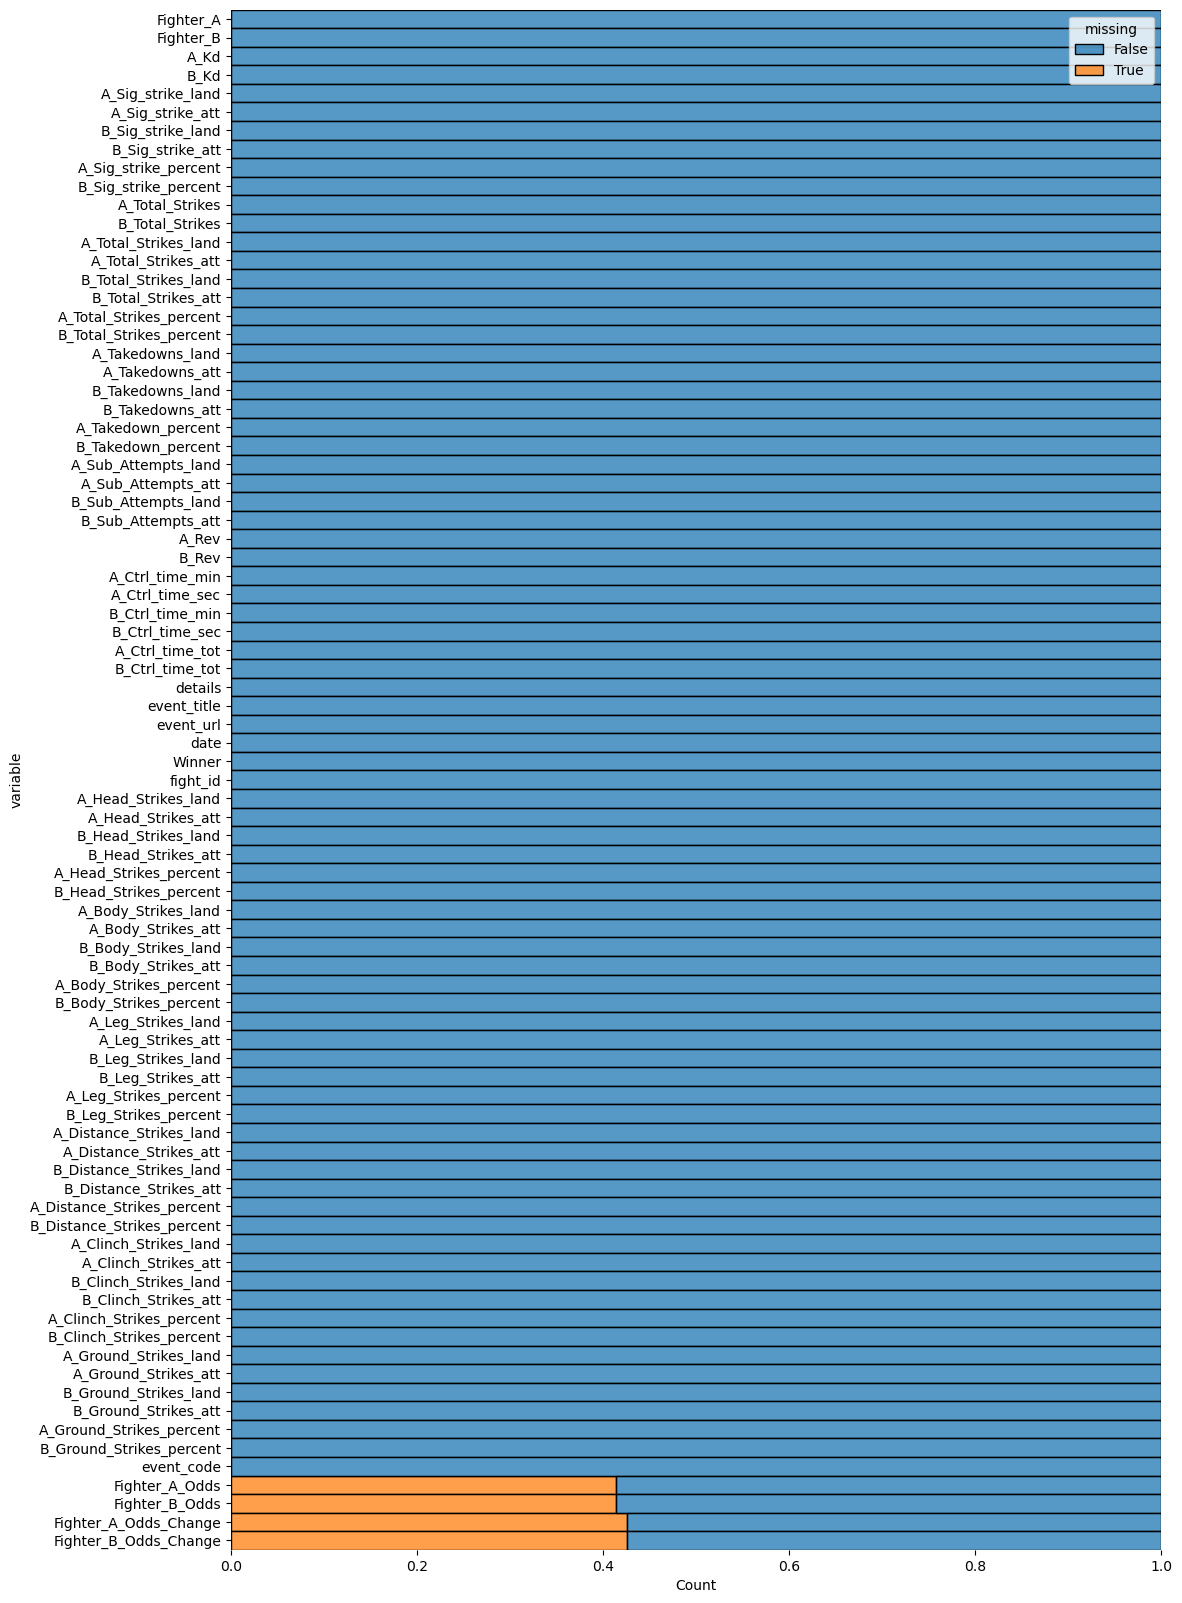

In [40]:
f, ax = plt.subplots(figsize = (12,20))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = double_fights_df.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

As we know from earlier, we do not have many of these odds because these events were outside of the UFC. Thus, we can drop them. 

In [41]:
double_fights_df = double_fights_df.dropna()
double_fights_df.shape

(8694, 83)

In [42]:
# Save point for safety
double_fights_df.to_csv('data/final/aggregates/Double_Fights_DF_V1.csv', index=False)

In [43]:
double_fights_df.head()

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0         Holly Holm   Irene Aldana     0     0                154   
3         Greg Hardy     Ben Sosoli     0     0                 54   
4      Jared Rosholt  Josh Copeland     0     0                 22   
5   Alistair Overeem  Stefan Struve     0     0                 17   
10     Nordine Taleb  Kyle Prepolec     0     0                 90   

    A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0                301                 69               185   
3                105                 26                97   
4                 45                  9                36   
5                 25                  2                 5   
10               201                 52               153   

    A_Sig_strike_percent  B_Sig_strike_percent  ... A_Ground_Strikes_att  \
0                   0.51                  0.37  ...                   28   
3                   0.51                  0.26  ...                    0   
4                   0.48                  0.25  ...                   17   
5                   0.68                  0.40  ...                   20   
10                  0.44                  0.33  ...                    2   

   B_Ground_Strikes_land  B_Ground_Strikes_att  A_Ground_Strikes_percent  \
0                      0                     0                  0.464286   
3                      0                     0                  0.000000   
4                      0                     0                  0.588235   
5                      0                     0                  0.700000   
10                     0                     0                  0.500000   

    B_Ground_Strikes_percent        event_code  Fighter_A_Odds  \
0                        0.0  805ad1801eb26abb          -125.0   
3                        0.0  3ae10ac4df3df05c          -400.0   
4                        0.0  f54200f1dfb9b5d4          -310.0   
5                        0.0  d4a12dfa4067742f          -200.0   
10                       0.0  351264d11286d09a          -420.0   

    Fighter_B_Odds  Fighter_A_Odds_Change  Fighter_B_Odds_Change  
0            105.0                   39.0                   49.0  
3            325.0                  -16.0                  -19.0  
4            280.0                   23.0                   -5.0  
5            185.0                   53.0                   40.0  
10           335.0                  -77.0                  377.0  

[5 rows x 83 columns]

In [44]:
# find all objects in df
double_fights_df.select_dtypes(include=['object']).columns

Index(['Fighter_A', 'Fighter_B', 'A_Total_Strikes', 'B_Total_Strikes',
       'details', 'event_title', 'event_url', 'date', 'Winner', 'fight_id',
       'event_code'],
      dtype='object')

In [45]:
# drop A_Total_Strikes and B_Total_Strikes, they were not meant to be here. 

double_fights_df = double_fights_df.drop(['A_Total_Strikes', 'B_Total_Strikes'], axis=1)


## Add Feature: In-Fight Statistic Differentials

This is 

Calculate differences in (in-match) fight statistics.

In [46]:
for col in double_fights_df.columns:
    if col.startswith('A_'):
        new_col = col.replace('A_', 'Dif_')
        double_fights_df[new_col] = double_fights_df[col] - double_fights_df[col.replace('A_', 'B_')]
    else:
        continue

double_fights_df

Fighter_A        Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0           Holly Holm     Irene Aldana     0     0                154   
3           Greg Hardy       Ben Sosoli     0     0                 54   
4        Jared Rosholt    Josh Copeland     0     0                 22   
5     Alistair Overeem    Stefan Struve     0     0                 17   
10       Nordine Taleb    Kyle Prepolec     0     0                 90   
...                ...              ...   ...   ...                ...   
8346    Marcos Rogerio    Blagoy Ivanov     0     0                 68   
8347      Marcus Davis       Mike Swick     0     0                 31   
8351     Lucas Martins    Darren Elkins     0     0                 26   
8352   Krzysztof Jotko  Sean Strickland     0     0                 37   
8356     Gleison Tibau    Tony Ferguson     0     0                  2   

      A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0                  301                 69               185   
3                  105                 26                97   
4                   45                  9                36   
5                   25                  2                 5   
10                 201                 52               153   
...                ...                ...               ...   
8346               133                 62               128   
8347                55                 32                86   
8351                82                 47               154   
8352               196                 84               182   
8356                20                 11                38   

      A_Sig_strike_percent  B_Sig_strike_percent  ...  \
0                     0.51                  0.37  ...   
3                     0.51                  0.26  ...   
4                     0.48                  0.25  ...   
5                     0.68                  0.40  ...   
10                    0.44                  0.33  ...   
...                    ...                   ...  ...   
8346                  0.51                  0.48  ...   
8347                  0.56                  0.37  ...   
8351                  0.31                  0.30  ...   
8352                  0.18                  0.46  ...   
8356                  0.10                  0.28  ...   

      Dif_Leg_Strikes_percent  Dif_Distance_Strikes_land  \
0                    0.191033                         75   
3                   -0.035714                         26   
4                    0.000000                          3   
5                    0.000000                         -2   
10                   0.537838                         38   
...                       ...                        ...   
8346                 0.666667                          4   
8347                -0.200000                          7   
8351                -0.200000                         -2   
8352                 0.300000                        -47   
8356                -0.750000                         -6   

      Dif_Distance_Strikes_att  Dif_Distance_Strikes_percent  \
0                           91                      0.155590   
3                            7                      0.234021   
4                           -4                      0.160714   
5                           -2                     -0.500000   
10                          48                      0.109488   
...                        ...                           ...   
8346                        -3                      0.046721   
8347                        12                      0.108225   
8351                       -29                      0.057606   
8352                        14                     -0.272763   
8356                       -10                     -0.166667   

      Dif_Clinch_Strikes_land  Dif_Clinch_Strikes_att  \
0                          -3                      -3   
3                           2                       1   
4                    

In [47]:
# add difference in odds
double_fights_df['Dif_Odds'] = double_fights_df['Fighter_A_Odds'] - double_fights_df['Fighter_B_Odds']

#### Add Distribution Stat Features

Here, double_fights_df becomes fights, just for ease.

In [48]:
fights = double_fights_df

In [49]:
def get_fighter_running_dist_stats(fighter, date, col_to_get, stat_to_calc):
    # for each column in all_metric_cols, get the mean, std, etc. for each fighter
    
    # filter data
    data = fights[(fights['Fighter_A'] == fighter) | (fights['Fighter_B'] == fighter)]

    # only get fights before the date
    datey = pd.to_datetime(date)
    data['date'] = pd.to_datetime(data['date'])
    data = data[data['date'] < datey]

    # fighter could be either fighter A or fighter B
    fighter_data = pd.DataFrame()
    # when fighter is fighter A, get all fighter A data and copy it to fighter_data

    # fighterA df
    fighterA_df = fights[fights['Fighter_A'] == fighter]
    fighterB_df = fights[fights['Fighter_B'] == fighter]

    # keep only the fighters columns date, FighterA, and the col_to_get, 
    # do same for B, change col names from B to A, and concat
    fighterA_df = fighterA_df[['date', 'Fighter_A', 'A_' + col_to_get]]
    fighterA_df.rename(columns={'A_' + col_to_get: col_to_get, 'Fighter_A': 'fighter'}, inplace=True)
    fighterB_df = fighterB_df[['date', 'Fighter_B', 'B_' + col_to_get]]
    fighterB_df.rename(columns={'B_' + col_to_get: col_to_get, 'Fighter_B': 'fighter'}, inplace=True)

    # append the dataframes on fighter
    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # get the chosen statistic
    if stat_to_calc == 'mean':
        x = fighter_data[col_to_get].mean()
    elif stat_to_calc == 'std':
        x = fighter_data[col_to_get].std()
    elif stat_to_calc == 'median':
        x = fighter_data[col_to_get].median()  
    return x

#### Get Non-specific column names for Feature Creation

In [50]:
dif_cols = [n for n in fights.columns if 'Dif_' in n]
A_cols = [n for n in fights.columns if n.startswith('A_')]
all_metric_cols = A_cols + dif_cols
A_cols2 = pd.DataFrame(A_cols)
A_cols2['nonspecific'] = A_cols2[0].str[2:]
the_cols = list(A_cols2['nonspecific'].unique())

In [51]:
# test get_fighter_running_dist_stats
get_fighter_running_dist_stats('Khabib Nurmagomedov', '2020-01-18', 'Sig_strike_land', 'mean')

55.75

Get the mean, standard deviation, and median of each feature.

These features I call 'Rolling' features, because they are rolling metrics based on fighter's previous fights.
Further, these features are calculated as a distribution of the fighter's previous fights.

In [52]:
for col in the_cols:
    for stat in ['mean', 'std', 'median']:
        fights['A_Rolling_' + col + '_' + stat] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_A'], row['date'], col, stat), axis=1)
        fights['B_Rolling_' + col + '_' + stat] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_B'], row['date'], col, stat), axis=1)

In [53]:
# Save for safety
fights.to_csv('data/final/aggregates/Double_Fights_DF_V2.csv', index=False)

### Feature: Top-Down Averages (typical UFC Style)

In [54]:
def get_top_down_averages(fighter, date, col_to_get, dataframe):

    # for each column in all_metric_cols, calculate the top-down averages, as opposed to bottom-up

    data = dataframe[(dataframe['Fighter_A'] == fighter) | (dataframe['Fighter_B'] == fighter)]

    # only get fights before the date

    datey = pd.to_datetime(date)
    data['date'] = pd.to_datetime(data['date'])
    data = data[data['date'] < datey]

    # fighter could be either fighter A or fighter B

    fighter_data = pd.DataFrame()

    # when fighter is fighter A, get all fighter A data and copy it to fighter_data

    # fighterA df

    fighterA_df = dataframe[dataframe['Fighter_A'] == fighter]
    fighterB_df = dataframe[dataframe['Fighter_B'] == fighter]
    
    # keep only the fighters columns date, FighterA, and the col_to_get, 
    # do same for B, change col names from B to A, and concat

    fighterA_df = fighterA_df[['date', 'Fighter_A', 'A_' + col_to_get]]
    fighterA_df.rename(columns={'A_' + col_to_get: col_to_get, 'Fighter_A': 'fighter'}, inplace=True)
    fighterB_df = fighterB_df[['date', 'Fighter_B', 'B_' + col_to_get]]
    fighterB_df.rename(columns={'B_' + col_to_get: col_to_get, 'Fighter_B': 'fighter'}, inplace=True)
    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # append the dataframes on fighter

    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # get the average

    tot = fighter_data[col_to_get].sum()
    num = fighter_data[col_to_get].count()
    x = tot / num
    return x

In [55]:
# delete rolling cols from the_cols
the_cols = [n for n in the_cols if 'Rolling' not in n]
the_cols

['Kd',
 'Sig_strike_land',
 'Sig_strike_att',
 'Sig_strike_percent',
 'Total_Strikes_land',
 'Total_Strikes_att',
 'Total_Strikes_percent',
 'Takedowns_land',
 'Takedowns_att',
 'Takedown_percent',
 'Sub_Attempts_land',
 'Sub_Attempts_att',
 'Rev',
 'Ctrl_time_min',
 'Ctrl_time_sec',
 'Ctrl_time_tot',
 'Head_Strikes_land',
 'Head_Strikes_att',
 'Head_Strikes_percent',
 'Body_Strikes_land',
 'Body_Strikes_att',
 'Body_Strikes_percent',
 'Leg_Strikes_land',
 'Leg_Strikes_att',
 'Leg_Strikes_percent',
 'Distance_Strikes_land',
 'Distance_Strikes_att',
 'Distance_Strikes_percent',
 'Clinch_Strikes_land',
 'Clinch_Strikes_att',
 'Clinch_Strikes_percent',
 'Ground_Strikes_land',
 'Ground_Strikes_att',
 'Ground_Strikes_percent']

In [56]:
for col in the_cols:
    fights['A_topdown_Avg_' + col ] = fights.apply(lambda row: get_top_down_averages(row['Fighter_A'], row['date'], col, fights), axis=1)
    fights['B_topdown_Avg_' + col ] = fights.apply(lambda row: get_top_down_averages(row['Fighter_B'], row['date'], col, fights), axis=1)

In [57]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V3.csv')

### Add Opponent Stats

Now, we add the opponent top-down averages to the dataframe.

In [58]:
def get_opponent_averages(datafrm, date, col_to_get, fighter):
    col_to_get = 'B_' + col_to_get
    data = datafrm[(datafrm['Fighter_A'] == fighter) | (datafrm['Fighter_B'] == fighter)]
    datey = pd.to_datetime(date)
    data['date'] = pd.to_datetime(data['date'])
    data = data[data['date'] < datey]

    fighter_data = pd.DataFrame()

    fighterA_df = datafrm[datafrm['Fighter_A'] == fighter]
    fighterB_df = datafrm[datafrm['Fighter_B'] == fighter]

    # switch A_ and B_ to B_ and A_ in fighterB_df
    fighterB_df.columns = [n.replace('A_', 'C_') if n.startswith('A_') else n for n in fighterB_df.columns]
    fighterB_df.columns = [n.replace('B_', 'D_') if n.startswith('B_') else n for n in fighterB_df.columns]
    fighterB_df.columns = [n.replace('C_', 'B_') if n.startswith('C_') else n for n in fighterB_df.columns]
    fighterB_df.columns = [n.replace('D_', 'A_') if n.startswith('D_') else n for n in fighterB_df.columns]

    # copy fighter_A and fighter_B columns to new dataframe, then switch fighter_A and fighter_B columns

    fighterB_df.rename(columns={'Fighter_A': 'Fighter_A2', 'Fighter_B': 'Fighter_B2'}, inplace=True)
    fighterB_df.rename(columns={'Fighter_B2': 'Fighter_A', 'Fighter_A2': 'Fighter_B'}, inplace=True)

    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # get sum of col to get
    col_sum = fighter_data[col_to_get].sum()
    # get number of fights
    num_fights = len(fighter_data)
    # get average
    avg = col_sum / num_fights

    return avg


In [59]:
# test
get_opponent_averages(fights, '2017-01-01', 'Sig_strike_land', 'Conor McGregor')

37.42857142857143

In [60]:
# Determine columns to calculate opp averages for
cols = [n for n in fights.columns if n.startswith('B_')]
cols = [n for n in cols if 'topdown_' not in n]
cols = [n for n in cols if 'Rolling_' not in n]
cols = [n for n in cols if 'Dif_' not in n]

In [61]:
# delete the first 2 characters of each in col
cols2 = pd.DataFrame(cols)
cols2['nonspecific'] = cols2[0].str[2:]
cols2

# get unique values
the_cols = list(cols2['nonspecific'].unique())
the_cols

['Kd',
 'Sig_strike_land',
 'Sig_strike_att',
 'Sig_strike_percent',
 'Total_Strikes_land',
 'Total_Strikes_att',
 'Total_Strikes_percent',
 'Takedowns_land',
 'Takedowns_att',
 'Takedown_percent',
 'Sub_Attempts_land',
 'Sub_Attempts_att',
 'Rev',
 'Ctrl_time_min',
 'Ctrl_time_sec',
 'Ctrl_time_tot',
 'Head_Strikes_land',
 'Head_Strikes_att',
 'Head_Strikes_percent',
 'Body_Strikes_land',
 'Body_Strikes_att',
 'Body_Strikes_percent',
 'Leg_Strikes_land',
 'Leg_Strikes_att',
 'Leg_Strikes_percent',
 'Distance_Strikes_land',
 'Distance_Strikes_att',
 'Distance_Strikes_percent',
 'Clinch_Strikes_land',
 'Clinch_Strikes_att',
 'Clinch_Strikes_percent',
 'Ground_Strikes_land',
 'Ground_Strikes_att',
 'Ground_Strikes_percent']

In [62]:
n=0

for col in the_cols:
    fights['A_Opp_Avg_' + col] = fights.apply(lambda row: get_opponent_averages(fights, row['date'], col, row['Fighter_A']), axis=1)
    fights['B_Opp_Avg_' + col] = fights.apply(lambda row: get_opponent_averages(fights, row['date'], col, row['Fighter_B']), axis=1)
    n = n+1
    print(f' {col}, #{n} / {len(cols)} done.')

 Kd, #1 / 34 done.
 Sig_strike_land, #2 / 34 done.
 Sig_strike_att, #3 / 34 done.
 Sig_strike_percent, #4 / 34 done.
 Total_Strikes_land, #5 / 34 done.
 Total_Strikes_att, #6 / 34 done.
 Total_Strikes_percent, #7 / 34 done.
 Takedowns_land, #8 / 34 done.
 Takedowns_att, #9 / 34 done.
 Takedown_percent, #10 / 34 done.
 Sub_Attempts_land, #11 / 34 done.
 Sub_Attempts_att, #12 / 34 done.
 Rev, #13 / 34 done.
 Ctrl_time_min, #14 / 34 done.
 Ctrl_time_sec, #15 / 34 done.
 Ctrl_time_tot, #16 / 34 done.
 Head_Strikes_land, #17 / 34 done.
 Head_Strikes_att, #18 / 34 done.
 Head_Strikes_percent, #19 / 34 done.
 Body_Strikes_land, #20 / 34 done.
 Body_Strikes_att, #21 / 34 done.
 Body_Strikes_percent, #22 / 34 done.
 Leg_Strikes_land, #23 / 34 done.
 Leg_Strikes_att, #24 / 34 done.
 Leg_Strikes_percent, #25 / 34 done.
 Distance_Strikes_land, #26 / 34 done.
 Distance_Strikes_att, #27 / 34 done.
 Distance_Strikes_percent, #28 / 34 done.
 Clinch_Strikes_land, #29 / 34 done.
 Clinch_Strikes_att, #30

In [63]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V4.csv')

### Feature: Rolling Career Stat Differentials

This is the difference between fighter_A and fighter_B's rolling career stats.


#### 1) Mean (Average)

In [64]:
# get columns with Rolling and Mean
rolling_mean_cols= [n for n in fights.columns if 'Rolling' in n and 'mean' in n]
rolling_mean_cols = pd.DataFrame(rolling_mean_cols)
rolling_mean_cols['nonspecific'] = rolling_mean_cols[0].str[2:]
rmc = rolling_mean_cols['nonspecific'].unique()

In [65]:
for col in rmc:
    fights['Dif_' + col] = fights['A_' + col] - fights['B_' + col]

fights.head()

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0         Holly Holm   Irene Aldana     0     0                154   
3         Greg Hardy     Ben Sosoli     0     0                 54   
4      Jared Rosholt  Josh Copeland     0     0                 22   
5   Alistair Overeem  Stefan Struve     0     0                 17   
10     Nordine Taleb  Kyle Prepolec     0     0                 90   

    A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0                301                 69               185   
3                105                 26                97   
4                 45                  9                36   
5                 25                  2                 5   
10               201                 52               153   

    A_Sig_strike_percent  B_Sig_strike_percent  ...  \
0                   0.51                  0.37  ...   
3                   0.51                  0.26  ...   
4                   0.48                  0.25  ...   
5                   0.68                  0.40  ...   
10                  0.44                  0.33  ...   

    Dif_Rolling_Leg_Strikes_percent_mean  \
0                              -0.065882   
3                              -0.331807   
4                               0.091757   
5                               0.092005   
10                              0.263572   

    Dif_Rolling_Distance_Strikes_land_mean  \
0                               -16.500000   
3                                -3.555556   
4                                 1.500000   
5                                -4.937500   
10                              -17.375000   

    Dif_Rolling_Distance_Strikes_att_mean  \
0                              -51.972222   
3                              -45.222222   
4                               -2.166667   
5                              -24.625000   
10                             -71.000000   

    Dif_Rolling_Distance_Strikes_percent_mean  \
0                                    0.086093   
3                                    0.201744   
4                                    0.070912   
5                                    0.087630   
10                                   0.164081   

    Dif_Rolling_Clinch_Strikes_land_mean  Dif_Rolling_Clinch_Strikes_att_mean  \
0                               1.333333                             1.055556   
3                               1.555556                             0.888889   
4                               1.000000                            -0.833333   
5                               6.500000                             7.437500   
10                              0.625000                             0.875000   

    Dif_Rolling_Clinch_Strikes_percent_mean  \
0                                  0.063642   
3                                  0.391534   
4                                 -0.091625   
5                                  0.352308   
10                                -0.358631   

    Dif_Rolling_Ground_Strikes_land_mean  Dif_Rolling_Ground_Strikes_att_mean  \
0                              -1.916667                            -2.055556   
3                               8.000000                            10.000000   
4                              11.333333                            14.500000   
5                               9.312500                            10.625000   
10                              4.375000                             6.250000   

    Dif_Rolling_Ground_Strikes_percent_mean  
0                                 -0.101639  
3                                  0.360429  
4                                  0.633919  
5                                  0.231619  
10                                 0.465385  

[5 rows x 490 columns]

#### 2) Median (Average)

In [66]:
rolling_median_cols= [n for n in fights.columns if 'Rolling' in n and 'median' in n]
rolling_median_cols = pd.DataFrame(rolling_median_cols)
rolling_median_cols['nonspecific'] = rolling_median_cols[0].str[2:]
rmc = rolling_median_cols['nonspecific'].unique()

In [67]:
for col in rmc:
    fights['Dif_' + col] = fights['A_' + col] - fights['B_' + col]

fights.head()

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0         Holly Holm   Irene Aldana     0     0                154   
3         Greg Hardy     Ben Sosoli     0     0                 54   
4      Jared Rosholt  Josh Copeland     0     0                 22   
5   Alistair Overeem  Stefan Struve     0     0                 17   
10     Nordine Taleb  Kyle Prepolec     0     0                 90   

    A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0                301                 69               185   
3                105                 26                97   
4                 45                  9                36   
5                 25                  2                 5   
10               201                 52               153   

    A_Sig_strike_percent  B_Sig_strike_percent  ...  \
0                   0.51                  0.37  ...   
3                   0.51                  0.26  ...   
4                   0.48                  0.25  ...   
5                   0.68                  0.40  ...   
10                  0.44                  0.33  ...   

    Dif_Rolling_Leg_Strikes_percent_median  \
0                                 0.059091   
3                                -0.285714   
4                                 0.301587   
5                                 0.155556   
10                                0.253226   

    Dif_Rolling_Distance_Strikes_land_median  \
0                                      -28.0   
3                                       -9.0   
4                                       -3.0   
5                                      -11.5   
10                                     -29.0   

    Dif_Rolling_Distance_Strikes_att_median  \
0                                     -45.0   
3                                     -60.0   
4                                     -17.5   
5                                     -33.5   
10                                    -99.0   

    Dif_Rolling_Distance_Strikes_percent_median  \
0                                      0.075920   
3                                      0.234021   
4                                      0.042236   
5                                      0.142748   
10                                     0.111887   

    Dif_Rolling_Clinch_Strikes_land_median  \
0                                      0.0   
3                                      0.0   
4                                     -2.5   
5                                      3.0   
10                                    -0.5   

    Dif_Rolling_Clinch_Strikes_att_median  \
0                                    -0.5   
3                                    -1.0   
4                                    -4.5   
5                                     2.0   
10                                   -1.0   

    Dif_Rolling_Clinch_Strikes_percent_median  \
0                                    0.083333   
3                                    0.000000   
4                                   -0.019318   
5                                    0.869091   
10                                  -0.416667   

    Dif_Rolling_Ground_Strikes_land_median  \
0                                      0.0   
3                                      0.0   
4                                      9.0   
5                                      5.5   
10                                     1.0   

    Dif_Rolling_Ground_Strikes_att_median  \
0                                    -1.0   
3                                     0.0   
4                                    12.5   
5                                     7.0   
10                                    1.5   

    Dif_Rolling_Ground_Strikes_percent_median  
0                                    0.000000  
3                                    0.000000  
4                                    0.710784  
5                                    0.638889  
10                                   0.566667  

[5 rows x 524 columns]

#### 3) Standard Deviations

In [68]:
rolling_std_cols= [n for n in fights.columns if 'Rolling' in n and 'std' in n]
rolling_std_cols = pd.DataFrame(rolling_std_cols)
rolling_std_cols['nonspecific'] = rolling_std_cols[0].str[2:]
rsc = rolling_std_cols['nonspecific'].unique()
rsc

array(['Rolling_Kd_std', 'Rolling_Sig_strike_land_std',
       'Rolling_Sig_strike_att_std', 'Rolling_Sig_strike_percent_std',
       'Rolling_Total_Strikes_land_std', 'Rolling_Total_Strikes_att_std',
       'Rolling_Total_Strikes_percent_std', 'Rolling_Takedowns_land_std',
       'Rolling_Takedowns_att_std', 'Rolling_Takedown_percent_std',
       'Rolling_Sub_Attempts_land_std', 'Rolling_Sub_Attempts_att_std',
       'Rolling_Rev_std', 'Rolling_Ctrl_time_min_std',
       'Rolling_Ctrl_time_sec_std', 'Rolling_Ctrl_time_tot_std',
       'Rolling_Head_Strikes_land_std', 'Rolling_Head_Strikes_att_std',
       'Rolling_Head_Strikes_percent_std',
       'Rolling_Body_Strikes_land_std', 'Rolling_Body_Strikes_att_std',
       'Rolling_Body_Strikes_percent_std', 'Rolling_Leg_Strikes_land_std',
       'Rolling_Leg_Strikes_att_std', 'Rolling_Leg_Strikes_percent_std',
       'Rolling_Distance_Strikes_land_std',
       'Rolling_Distance_Strikes_att_std',
       'Rolling_Distance_Strikes_percent_st

In [69]:
for col in rsc:
    fights['Dif_' + col] = fights['A_' + col] - fights['B_' + col]

fights.head()

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0         Holly Holm   Irene Aldana     0     0                154   
3         Greg Hardy     Ben Sosoli     0     0                 54   
4      Jared Rosholt  Josh Copeland     0     0                 22   
5   Alistair Overeem  Stefan Struve     0     0                 17   
10     Nordine Taleb  Kyle Prepolec     0     0                 90   

    A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0                301                 69               185   
3                105                 26                97   
4                 45                  9                36   
5                 25                  2                 5   
10               201                 52               153   

    A_Sig_strike_percent  B_Sig_strike_percent  ...  \
0                   0.51                  0.37  ...   
3                   0.51                  0.26  ...   
4                   0.48                  0.25  ...   
5                   0.68                  0.40  ...   
10                  0.44                  0.33  ...   

    Dif_Rolling_Leg_Strikes_percent_std  \
0                              0.073845   
3                              0.393218   
4                             -0.130793   
5                              0.018552   
10                            -0.157097   

    Dif_Rolling_Distance_Strikes_land_std  \
0                                0.734230   
3                               19.336714   
4                                7.077737   
5                               -1.373089   
10                              22.633987   

    Dif_Rolling_Distance_Strikes_att_std  \
0                              -4.364535   
3                              45.163175   
4                              27.427443   
5                             -22.648652   
10                             44.954349   

    Dif_Rolling_Distance_Strikes_percent_std  \
0                                   0.137233   
3                                   0.132269   
4                                   0.015244   
5                                   0.040913   
10                                  0.206397   

    Dif_Rolling_Clinch_Strikes_land_std  Dif_Rolling_Clinch_Strikes_att_std  \
0                              2.538029                            2.465664   
3                              2.120550                            2.676453   
4                              6.450009                            8.311347   
5                              6.651126                            8.880159   
10                             1.868735                            3.403430   

    Dif_Rolling_Clinch_Strikes_percent_std  \
0                                -0.024241   
3                                 0.460108   
4                                 0.175367   
5                                -0.086069   
10                                0.126341   

    Dif_Rolling_Ground_Strikes_land_std  Dif_Rolling_Ground_Strikes_att_std  \
0                             -2.466833                           -2.353062   
3                             11.950880                           14.414045   
4                              9.939209                           11.611123   
5                             13.311782                           15.318519   
10                             6.907725                           10.142321   

    Dif_Rolling_Ground_Strikes_percent_std  
0                                -0.082689  
3                                 0.436579  
4                                 0.332215  
5                                 0.079562  
10                                0.402486  

[5 rows x 558 columns]

In [70]:
# Save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V5.csv')

In [71]:
#Identify columns with missing values
nothere = fights.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]

if len(nothere) > 0:
    cols = nothere.index

    f, ax = plt.subplots(figsize = (12,12))

    sns.despine(f, left=True, bottom=True)
    sns.histplot(
        data = fights[cols].isna().melt(value_name='missing'),
        y= 'variable',
        hue = 'missing',
        multiple = 'fill', ax = ax)

    ax.set_title('Missing Data by Column', fontsize = 20)
    ax.set_xlabel('Count', fontsize = 16)
    ax.set_ylabel('Column', fontsize = 16)
    ax.tick_params(labelsize = 14)

    plt.show()

else:
    print('No missing values')

No missing values


### Feature: UFC.Com Bio Data

UFC Bio data includes fighter height, weight, reach, and stance, among other important features.

In [72]:
fighter_bios = pd.read_csv('data/final/aggregates/All_Fighter_Bios.csv')
fighter_bios.head(1)

Unnamed: 0.1  Unnamed: 0        Status          Place of Birth  \
0             0           1  Not Fighting  Parrish, United States   

  Fighting style   Age  Height  Weight  Octagon Debut  Reach  Leg reach  \
0            MMA  32.0    72.0   155.0  Jul. 30, 2019   78.0       42.0   

      fighter Trains at  
0  Aalon Cruz       NaN

In [73]:
# drop unnamed column
fighter_bios.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

Text(0.5, 0, 'Count')

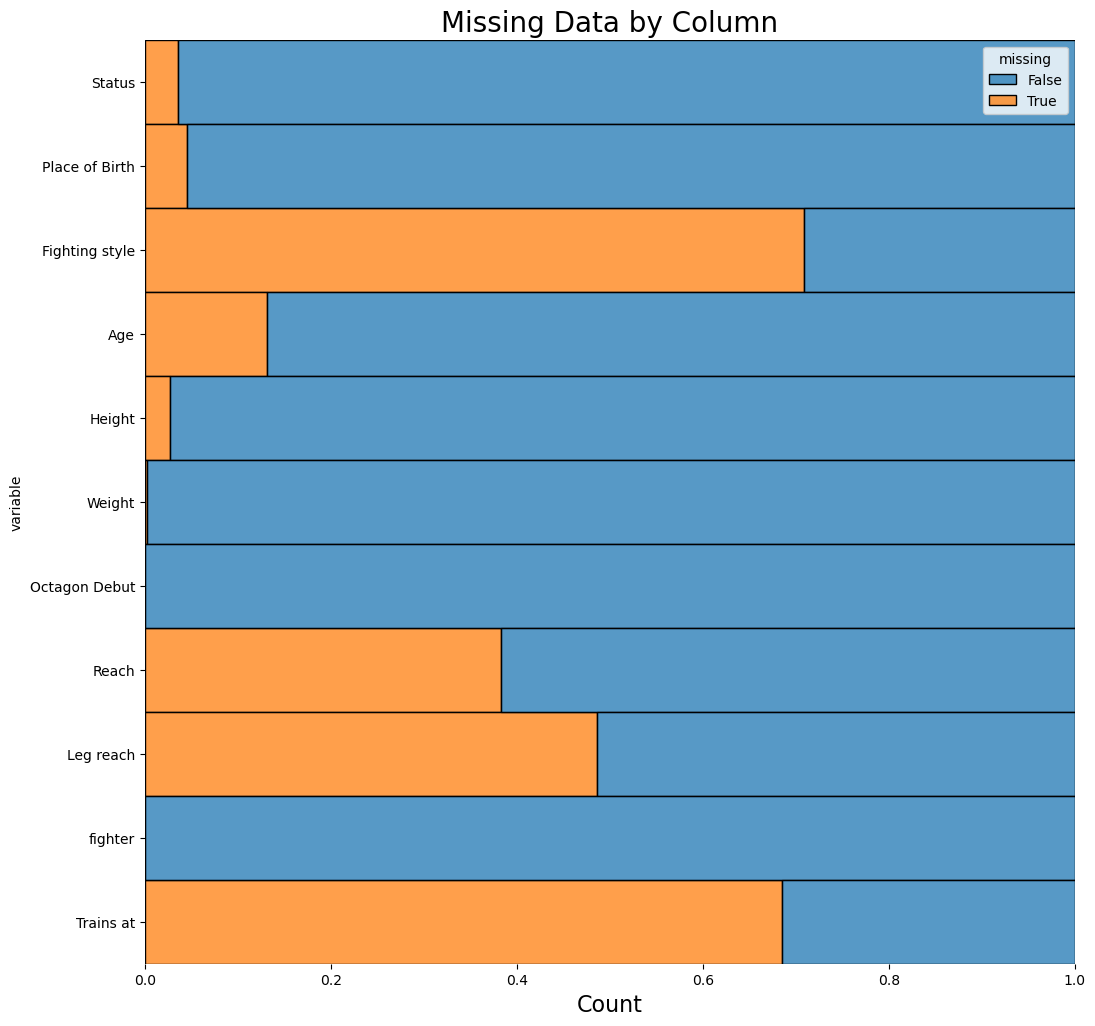

In [74]:
# Check NaNs

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = fighter_bios.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

ax.set_title('Missing Data by Column', fontsize = 20)
ax.set_xlabel('Count', fontsize = 16)

In [75]:
# Check active fighter NANs
active = fighter_bios.loc[fighter_bios['Status'] == "Active"]
active

Status                Place of Birth Fighting style   Age  Height  \
3     Active        Houston, United States      Muay Thai  32.0    69.0   
11    Active                Rabat, Morocco        Striker  36.0    69.0   
12    Active  Republic of Dagestan, Russia            NaN  33.0    71.0   
13    Active                 Argun, Russia            MMA  32.0    74.0   
14    Active       San Jose, United States            NaN  40.0    65.0   
...      ...                           ...            ...   ...     ...   
2408  Active         Irving, United States      Jiu-Jitsu  37.0    72.0   
2411  Active                 Paris, France            MMA  38.0    68.0   
2413  Active                    Kazakhstan      Freestyle  34.0    64.0   
2415  Active                  Hebei, China      Muay Thai  33.0    64.0   
2416  Active                  USSR, Russia        Striker  31.0    68.0   

      Weight  Octagon Debut  Reach  Leg reach                fighter  \
3      135.0  May. 24, 2014   71.0       40.0         Aaron Phillips   
11     185.5  Jul. 22, 2018   76.0       41.0            Abu Azaitar   
12     170.5  Nov. 09, 2019   72.0       39.5  Abubakar Nurmagomedov   
13     186.0  Sep. 03, 2022   78.0       43.0         Abus Magomedov   
14     125.0  Aug. 29, 2017    NaN        NaN           Adam Antolin   
...      ...            ...    ...        ...                    ...   
2408   185.0  Aug. 29, 2013   75.0       40.0           Zak Cummings   
2411   147.0  Oct. 05, 2019   72.0       42.0            Zarah Fairn   
2413   139.8  Jul. 11, 2020   66.5       36.0     Zhalgas Zhumagulov   
2415   114.8  Aug. 04, 2018   63.0       36.0            Zhang Weili   
2416   167.0  Feb. 15, 2014   68.0       38.5       Zubaira Tukhugov   

                               Trains at  
3                          Headkicks MMA  
11                                   NaN  
12                                   NaN  
13                                   NaN  
14                                   NaN  
...                                  ...  
2408                 Glory MMA & Fitness  
2411                         Olympia MMA  
2413                   American Top Team  
2415                                 NaN  
2416  Tiger Muay Thai - Phuket, Thailand  

[641 rows x 11 columns]

Text(0.5, 0, 'Count')

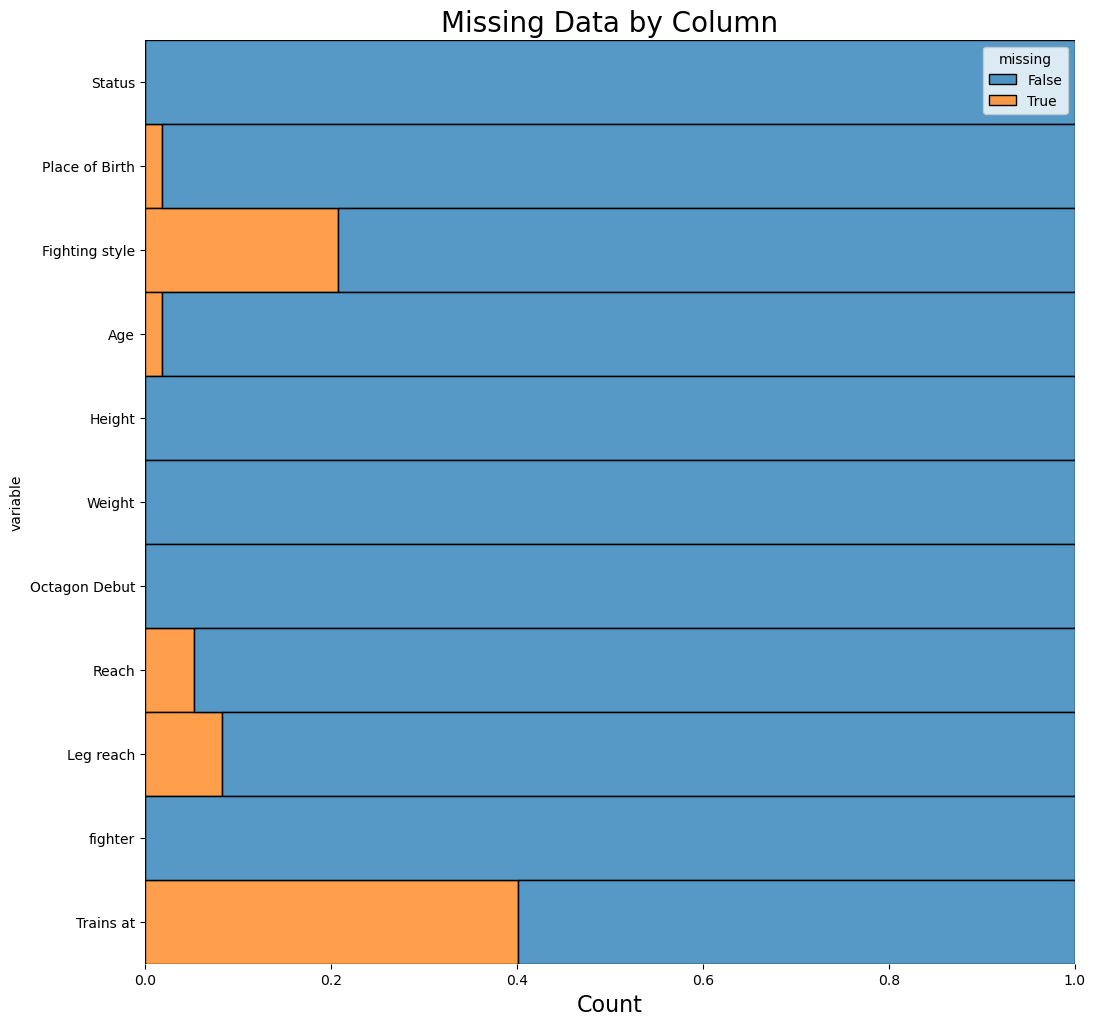

In [76]:
# Check NaNs

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = active.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

ax.set_title('Missing Data by Column', fontsize = 20)
ax.set_xlabel('Count', fontsize = 16)

#### Dealing with Initial Missing Values

Initial missing values are those such as Age, Status, Fighting Style (categorical variables) which I can impute unknown categories to without much issue. The others (height, weight, reach, etc) must be dealt with after the merge.

In [77]:
# if missing place of birth, replace with 'Unknown'
fighter_bios['Place of Birth'].fillna('Unknown', inplace=True)

# if missing fighting style, replace with 'Unknown'
fighter_bios['Fighting style'].fillna('Unknown', inplace=True)

# if missing Trains at, replace with 'Unknown'
fighter_bios['Trains at'].fillna('Unknown', inplace=True)

# if missing status, replace with 'Unknown'
fighter_bios['Status'].fillna('Unknown', inplace=True)

# if missing age, replace with median
fighter_bios['Age'].fillna(fighter_bios['Age'].median(), inplace=True)

# if missing height, replace with median -- thankfully not many missing, as 
# this is a somewhat important feature
fighter_bios['Height'].fillna(fighter_bios['Height'].median(), inplace=True)

# if missing weight, replace with median -- thankfully not many missing
fighter_bios['Weight'].fillna(fighter_bios['Weight'].median(), inplace=True)

In [78]:
def get_bio_data(fighter, stat):
    try:
        data = fighter_bios[fighter_bios['fighter'] == fighter]
        d = data[stat].values[0]
        d = pd.to_numeric(d)
        return d
    except:
        return nan

In [79]:
# test
weight = get_bio_data('Khabib Nurmagomedov', 'Height')
weight

70.0

Grab data from ufc bios, add to fights

In [80]:
fights['A_Height'] = fights.apply(lambda row: get_bio_data(row['Fighter_A'], 'Height'), axis=1)
fights['B_Height'] = fights.apply(lambda row: get_bio_data(row['Fighter_B'], 'Height'), axis=1)
fights['Dif_Height'] = fights['A_Height'] - fights['B_Height']

In [81]:
fights['A_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_A'], 'Reach'), axis=1)
fights['B_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_B'], 'Reach'), axis=1)
fights['Dif_Reach'] = fights['A_Reach'] - fights['B_Reach']

In [82]:
fights['A_Leg_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_A'], 'Leg reach'), axis=1)
fights['B_Leg_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_B'], 'Leg reach'), axis=1)
fights['Dif_Leg_Reach'] = fights['A_Leg_Reach'] - fights['B_Leg_Reach']

<AxesSubplot:xlabel='Count', ylabel='variable'>

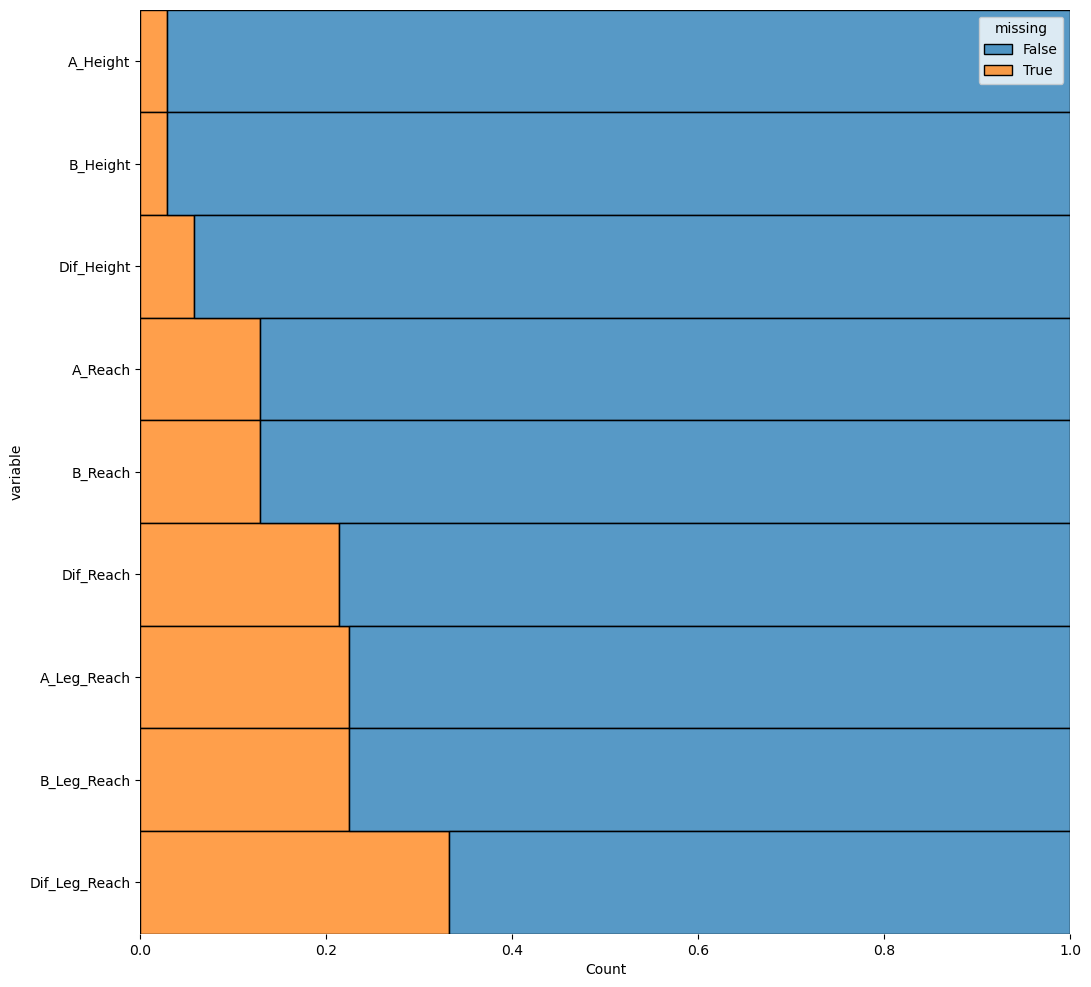

In [83]:
#Identify columns with missing values
nothere = fights.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
cols = nothere.index

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = fights[cols].isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

In [84]:
# drop rows missing height data
fights.dropna(subset=['A_Height', 'B_Height'], inplace=True)
len(fights)

8194

In [85]:
# New column indicating if we have the reach data for fighter A
fights['A_Reach_NA'] = fights['A_Reach'].isna()

# New column indicating if we have the reach data for fighter B
fights['B_Reach_NA'] = fights['B_Reach'].isna()

# New column indicating if we have the reach data for either fighter
fights['Reach_NA'] = fights['A_Reach_NA'] | fights['B_Reach_NA']

# New column indicating if we have leg reach data for fighter A
fights['A_Leg_Reach_NA'] = fights['A_Leg_Reach'].isna()

# New column indicating if we have leg reach data for fighter B
fights['B_Leg_Reach_NA'] = fights['B_Leg_Reach'].isna()

# New column indicating if we have leg reach data for either fighter
fights['Leg_Reach_NA'] = fights['A_Leg_Reach_NA'] | fights['B_Leg_Reach_NA']

### Add Weightclass

Weightclass data is in the All_Events_Fights_and_FightUrls file, which we created in the scraping notebook.

In [86]:
all_events = pd.read_csv('data/final/events/All_Events_Fights_and_FightUrls.csv')

In [87]:
all_events.head()

Unnamed: 0.1  Unnamed: 0  W/L   Weight class           Method  Round  Time  \
0             0           0  win    Heavyweight  KO/TKO  Punches      3  4:23   
1             1           1  win   Middleweight            U-DEC      3  5:00   
2             2           2  win   Middleweight            U-DEC      3  5:00   
3             3           3  win   Middleweight  KO/TKO  Punches      3  1:09   
4             4           4  win  Featherweight            U-DEC      3  5:00   

             Fighter1            Fighter2  F1_Kd  F2_Kd  F1_Str  F2_Str  \
0          Ciryl Gane         Tai Tuivasa      1      1     110      29   
1    Robert Whittaker      Marvin Vettori      0      0      74      33   
2  Nassourdine Imavov     Joaquin Buckley      0      0      51      46   
3       Roman Kopylov  Alessio Di Chirico      1      0      59      39   
4       William Gomis        Jarno Errens      0      0      32      20   

   F1_Td  F2_Td  F1_Sub  F2_Sub  fight_num          event_id  \
0      0      0       0       0          1  00a905a4a4a2b071   
1      1      0       0       0          2  00a905a4a4a2b071   
2      2      0       2       0          3  00a905a4a4a2b071   
3      0      0       0       0          4  00a905a4a4a2b071   
4      3      0       0       1          5  00a905a4a4a2b071   

                                          fight_link  
0  http://www.ufcstats.com/fight-details/810c9da0...  
1  http://www.ufcstats.com/fight-details/b8ca1acd...  
2  http://www.ufcstats.com/fight-details/20f316f9...  
3  http://www.ufcstats.com/fight-details/1a191251...  
4  http://www.ufcstats.com/fight-details/398db400...

In [88]:
def find_typical_weightclass(fighter):
    try:
        data = all_events[all_events['Fighter1'] == fighter]
        data2 = all_events[all_events['Fighter2'] == fighter]
        data = pd.concat([data, data2])
        d = data['Weight class'].value_counts().index[0]
        return d
    except:
        return nan


In [89]:
# test
weight = find_typical_weightclass('Khabib Nurmagomedov')
weight

'Lightweight'

In [90]:
fights['A_Typical_Weightclass'] = fights.apply(lambda row: find_typical_weightclass(row['Fighter_A']), axis=1)
fights['B_Typical_Weightclass'] = fights.apply(lambda row: find_typical_weightclass(row['Fighter_B']), axis=1)

In [91]:
fights.head(3)

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0     Holly Holm   Irene Aldana     0     0                154   
3     Greg Hardy     Ben Sosoli     0     0                 54   
4  Jared Rosholt  Josh Copeland     0     0                 22   

   A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0               301                 69               185   
3               105                 26                97   
4                45                  9                36   

   A_Sig_strike_percent  B_Sig_strike_percent  ...  B_Leg_Reach  \
0                  0.51                  0.37  ...         38.5   
3                  0.51                  0.26  ...         40.0   
4                  0.48                  0.25  ...          NaN   

   Dif_Leg_Reach  A_Reach_NA  B_Reach_NA  Reach_NA  A_Leg_Reach_NA  \
0           -0.5       False       False     False           False   
3            4.0       False       False     False           False   
4            NaN       False       False     False           False   

   B_Leg_Reach_NA  Leg_Reach_NA  A_Typical_Weightclass  B_Typical_Weightclass  
0           False         False   Women's Bantamweight   Women's Bantamweight  
3           False         False            Heavyweight            Heavyweight  
4            True          True            Heavyweight            Heavyweight  

[3 rows x 575 columns]

In [92]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V6.csv', index=False)

In [93]:
def find_weightclass(fight_id):

    # use fight_id to find weightclass of fight

    try:
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        d = data['Weight class'].values[0]
        return d
    except:
        return nan

In [94]:
# test
weight = find_weightclass('ff6c8dab41efcc09')
weight

'Heavyweight'

In [95]:
fights['fight_weightclass'] = fights.apply(lambda row: find_weightclass(row['fight_id']), axis=1)

In [96]:
fights.head(3)

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0     Holly Holm   Irene Aldana     0     0                154   
3     Greg Hardy     Ben Sosoli     0     0                 54   
4  Jared Rosholt  Josh Copeland     0     0                 22   

   A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0               301                 69               185   
3               105                 26                97   
4                45                  9                36   

   A_Sig_strike_percent  B_Sig_strike_percent  ...  Dif_Leg_Reach  A_Reach_NA  \
0                  0.51                  0.37  ...           -0.5       False   
3                  0.51                  0.26  ...            4.0       False   
4                  0.48                  0.25  ...            NaN       False   

   B_Reach_NA  Reach_NA  A_Leg_Reach_NA  B_Leg_Reach_NA  Leg_Reach_NA  \
0       False     False           False           False         False   
3       False     False           False           False         False   
4       False     False           False            True          True   

   A_Typical_Weightclass  B_Typical_Weightclass     fight_weightclass  
0   Women's Bantamweight   Women's Bantamweight  Women's Bantamweight  
3            Heavyweight            Heavyweight           Heavyweight  
4            Heavyweight            Heavyweight           Heavyweight  

[3 rows x 576 columns]

In [97]:
fights['A_Fight_in_Typical_Weightclass'] = fights.apply(lambda row: row['A_Typical_Weightclass'] == row['fight_weightclass'], axis=1)
fights['B_Fight_in_Typical_Weightclass'] = fights.apply(lambda row: row['B_Typical_Weightclass'] == row['fight_weightclass'], axis=1)

In [98]:
fights.head(3)

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0     Holly Holm   Irene Aldana     0     0                154   
3     Greg Hardy     Ben Sosoli     0     0                 54   
4  Jared Rosholt  Josh Copeland     0     0                 22   

   A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0               301                 69               185   
3               105                 26                97   
4                45                  9                36   

   A_Sig_strike_percent  B_Sig_strike_percent  ...  B_Reach_NA  Reach_NA  \
0                  0.51                  0.37  ...       False     False   
3                  0.51                  0.26  ...       False     False   
4                  0.48                  0.25  ...       False     False   

   A_Leg_Reach_NA  B_Leg_Reach_NA  Leg_Reach_NA  A_Typical_Weightclass  \
0           False           False         False   Women's Bantamweight   
3           False           False         False            Heavyweight   
4           False            True          True            Heavyweight   

   B_Typical_Weightclass     fight_weightclass  \
0   Women's Bantamweight  Women's Bantamweight   
3            Heavyweight           Heavyweight   
4            Heavyweight           Heavyweight   

   A_Fight_in_Typical_Weightclass  B_Fight_in_Typical_Weightclass  
0                            True                            True  
3                            True                            True  
4                            True                            True  

[3 rows x 578 columns]

In [99]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V7.csv', index=False)

### Feature: Method

The main methods of fight finishing are:
- Decision (DEC)
- KO/TKO
- Submission (SUB)


In [100]:
all_events.head(2)

Unnamed: 0.1  Unnamed: 0  W/L  Weight class           Method  Round  Time  \
0             0           0  win   Heavyweight  KO/TKO  Punches      3  4:23   
1             1           1  win  Middleweight            U-DEC      3  5:00   

           Fighter1        Fighter2  F1_Kd  F2_Kd  F1_Str  F2_Str  F1_Td  \
0        Ciryl Gane     Tai Tuivasa      1      1     110      29      0   
1  Robert Whittaker  Marvin Vettori      0      0      74      33      1   

   F2_Td  F1_Sub  F2_Sub  fight_num          event_id  \
0      0       0       0          1  00a905a4a4a2b071   
1      0       0       0          2  00a905a4a4a2b071   

                                          fight_link  
0  http://www.ufcstats.com/fight-details/810c9da0...  
1  http://www.ufcstats.com/fight-details/b8ca1acd...

In [101]:
all_events.Method.value_counts()[:20]

U-DEC                    2083
KO/TKO  Punches           673
KO/TKO  Punch             650
S-DEC                     586
SUB  Rear Naked Choke     421
SUB  Guillotine Choke     199
KO/TKO  Kick              147
SUB  Armbar               113
KO/TKO                     95
KO/TKO  Elbows             85
SUB  Arm Triangle          77
KO/TKO  Knee               71
M-DEC                      64
SUB  Triangle Choke        60
SUB  D'Arce Choke          31
KO/TKO  Elbow              30
SUB  Kimura                28
KO/TKO  Flying Knee        27
Overturned                 26
SUB  Anaconda Choke        23
Name: Method, dtype: int64

In [102]:
# split Method into Method and Method Detail
all_events['Method_Primary'] = all_events['Method'].str.split('  ', expand=True)[0]
all_events['Method_Detail'] = all_events['Method'].str.split('  ', expand=True)[1]
all_events.head(3)

Unnamed: 0.1  Unnamed: 0  W/L  Weight class           Method  Round  Time  \
0             0           0  win   Heavyweight  KO/TKO  Punches      3  4:23   
1             1           1  win  Middleweight            U-DEC      3  5:00   
2             2           2  win  Middleweight            U-DEC      3  5:00   

             Fighter1         Fighter2  F1_Kd  ...  F2_Str  F1_Td  F2_Td  \
0          Ciryl Gane      Tai Tuivasa      1  ...      29      0      0   
1    Robert Whittaker   Marvin Vettori      0  ...      33      1      0   
2  Nassourdine Imavov  Joaquin Buckley      0  ...      46      2      0   

   F1_Sub  F2_Sub  fight_num          event_id  \
0       0       0          1  00a905a4a4a2b071   
1       0       0          2  00a905a4a4a2b071   
2       2       0          3  00a905a4a4a2b071   

                                          fight_link Method_Primary  \
0  http://www.ufcstats.com/fight-details/810c9da0...         KO/TKO   
1  http://www.ufcstats.com/fight-details/b8ca1acd...          U-DEC   
2  http://www.ufcstats.com/fight-details/20f316f9...          U-DEC   

  Method_Detail  
0       Punches  
1          None  
2          None  

[3 rows x 22 columns]

Get fight end method

In [103]:
def get_method(fight_id):
    try:
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        d = data['Method_Primary'].values[0]
        return d
    except:
        return nan

In [104]:
def get_details(fight_id):
    try:
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        d = data['Method_Detail'].values[0]
        return d
    except:
        return nan

In [105]:
# test
method = get_method('ff6c8dab41efcc09')
method

'U-DEC'

In [106]:
fights['InFightData__Method_Primary'] = fights.apply(lambda row: get_method(row['fight_id']), axis=1)
fights['InFightData__Method_Detail'] = fights.apply(lambda row: get_details(row['fight_id']), axis=1)

### Feature: Round & Time

In [107]:
def get_round_time(fight_id, round_or_time):
    try: 
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        if round_or_time == 'round':
            d = data['Round'].values[0]
        elif round_or_time == 'time':
            d = data['Time'].values[0]
        return d
    except:
        return nan

In [108]:
# test
round = get_round_time('ff6c8dab41efcc09', 'round')
round

3

In [109]:
fights['InFightData__Round'] = fights.apply(lambda row: get_round_time(row['fight_id'], 'round'), axis=1)
fights['InFightData__Time'] = fights.apply(lambda row: get_round_time(row['fight_id'], 'time'), axis=1)

In [110]:
fights.head(3)

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0     Holly Holm   Irene Aldana     0     0                154   
3     Greg Hardy     Ben Sosoli     0     0                 54   
4  Jared Rosholt  Josh Copeland     0     0                 22   

   A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0               301                 69               185   
3               105                 26                97   
4                45                  9                36   

   A_Sig_strike_percent  B_Sig_strike_percent  ...  Leg_Reach_NA  \
0                  0.51                  0.37  ...         False   
3                  0.51                  0.26  ...         False   
4                  0.48                  0.25  ...          True   

   A_Typical_Weightclass  B_Typical_Weightclass     fight_weightclass  \
0   Women's Bantamweight   Women's Bantamweight  Women's Bantamweight   
3            Heavyweight            Heavyweight           Heavyweight   
4            Heavyweight            Heavyweight           Heavyweight   

   A_Fight_in_Typical_Weightclass  B_Fight_in_Typical_Weightclass  \
0                            True                            True   
3                            True                            True   
4                            True                            True   

   InFightData__Method_Primary  InFightData__Method_Detail  \
0                        U-DEC                        None   
3                   Overturned                        None   
4                       KO/TKO                     Punches   

   InFightData__Round  InFightData__Time  
0                   5               5:00  
3                   3               5:00  
4                   3               3:12  

[3 rows x 582 columns]

In [111]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V8.csv', index=False)

### Dealing with Remaining Missing Values

For the height and reach, we can impute the median height and reach of the fighter's weightclass.

In [112]:
# get missing values, sorted by column
missing_values = fights.isnull().sum().sort_values(ascending=False)
# get rid of 0 values
missing_values = missing_values[missing_values > 0]
# get percentage of missing values
missing_values = missing_values / len(fights) * 100
missing_values

InFightData__Method_Detail    51.598731
Dif_Leg_Reach                 29.118867
A_Leg_Reach                   20.234318
B_Leg_Reach                   20.234318
Dif_Reach                     16.597510
A_Reach                       10.361240
B_Reach                       10.361240
B_Typical_Weightclass          0.085428
A_Typical_Weightclass          0.085428
dtype: float64

In [113]:
# replace nan values in "InFightData__Method_Detail" with "None"
fights['InFightData__Method_Detail'] = fights['InFightData__Method_Detail'].fillna('None')

In [114]:
# replace nan values in Typical Weightclass with current weightclass
fights['A_Typical_Weightclass'] = fights.apply(lambda row: row['fight_weightclass'] if pd.isnull(row['A_Typical_Weightclass']) else row['A_Typical_Weightclass'], axis=1)
fights['B_Typical_Weightclass'] = fights.apply(lambda row: row['fight_weightclass'] if pd.isnull(row['B_Typical_Weightclass']) else row['B_Typical_Weightclass'], axis=1)

In [115]:
# get median reach per height
reach_by_height = fights.groupby('A_Height')['A_Reach'].median()
reach_by_height

A_Height
0.0      NaN
60.0    60.0
61.0    62.0
61.5    62.0
62.0    64.0
62.5    62.5
63.0    64.5
63.5    65.5
64.0    64.0
64.5    68.0
65.0    66.0
66.0    67.0
66.5    66.0
67.0    69.0
67.5    69.0
68.0    70.0
68.5    71.0
69.0    71.0
70.0    72.0
70.5    76.0
71.0    73.0
71.5    73.0
72.0    74.0
72.5    78.0
73.0    75.0
73.5    77.0
74.0    75.5
74.5    78.0
75.0    77.0
75.5    76.0
76.0    80.0
77.0    79.0
78.0    81.0
78.5    79.0
79.0    80.0
80.0    80.0
84.0    84.5
Name: A_Reach, dtype: float64

In [116]:
# replace nan values in reach with median reach per height
fights['A_Reach'] = fights.apply(lambda row: reach_by_height[row['A_Height']] if pd.isnull(row['A_Reach']) else row['A_Reach'], axis=1)
fights['B_Reach'] = fights.apply(lambda row: reach_by_height[row['B_Height']] if pd.isnull(row['B_Reach']) else row['B_Reach'], axis=1)

In [117]:
# get median leg reach per height
leg_reach_by_height = fights.groupby('A_Height')['A_Leg_Reach'].median()
leg_reach_by_height

A_Height
0.0       NaN
60.0    34.00
61.0    35.00
61.5    35.00
62.0    36.00
62.5    38.00
63.0    36.00
63.5    38.00
64.0    37.00
64.5    38.00
65.0    37.50
66.0    38.00
66.5    38.00
67.0    38.00
67.5    37.25
68.0    39.00
68.5    38.50
69.0    39.50
70.0    40.00
70.5    42.00
71.0    40.50
71.5    43.00
72.0    41.00
72.5    40.00
73.0    41.50
73.5    41.00
74.0    42.00
74.5    44.00
75.0    43.50
75.5    43.00
76.0    44.50
77.0    46.00
78.0    44.50
78.5    45.50
79.0    47.50
80.0      NaN
84.0    44.00
Name: A_Leg_Reach, dtype: float64

In [118]:
# replace nan values in leg reach with median leg reach per height
fights['A_Leg_Reach'] = fights.apply(lambda row: leg_reach_by_height[row['A_Height']] if pd.isnull(row['A_Leg_Reach']) else row['A_Leg_Reach'], axis=1)
fights['B_Leg_Reach'] = fights.apply(lambda row: leg_reach_by_height[row['B_Height']] if pd.isnull(row['B_Leg_Reach']) else row['B_Leg_Reach'], axis=1)

In [119]:
# recalculate leg reach dif and reach dif
fights['A_Leg_Reach_Dif'] = fights['A_Leg_Reach'] - fights['B_Leg_Reach']
fights['A_Reach_Dif'] = fights['A_Reach'] - fights['B_Reach']

In [120]:
fights.dtypes[-40:]

Dif_Rolling_Body_Strikes_att_std            float64
Dif_Rolling_Body_Strikes_percent_std        float64
Dif_Rolling_Leg_Strikes_land_std            float64
Dif_Rolling_Leg_Strikes_att_std             float64
Dif_Rolling_Leg_Strikes_percent_std         float64
Dif_Rolling_Distance_Strikes_land_std       float64
Dif_Rolling_Distance_Strikes_att_std        float64
Dif_Rolling_Distance_Strikes_percent_std    float64
Dif_Rolling_Clinch_Strikes_land_std         float64
Dif_Rolling_Clinch_Strikes_att_std          float64
Dif_Rolling_Clinch_Strikes_percent_std      float64
Dif_Rolling_Ground_Strikes_land_std         float64
Dif_Rolling_Ground_Strikes_att_std          float64
Dif_Rolling_Ground_Strikes_percent_std      float64
A_Height                                    float64
B_Height                                    float64
Dif_Height                                  float64
A_Reach                                     float64
B_Reach                                     float64
Dif_Reach   

In [121]:
# get missing values, sorted by column
missing_values = fights.isnull().sum().sort_values(ascending=False)
# get rid of 0 values
missing_values = missing_values[missing_values > 0]
# get percentage of missing values
missing_values = missing_values / len(fights) * 100
missing_values

Dif_Leg_Reach      29.118867
Dif_Reach          16.597510
A_Leg_Reach_Dif     0.683427
A_Reach_Dif         0.610203
A_Leg_Reach         0.353918
B_Leg_Reach         0.353918
A_Reach             0.317305
B_Reach             0.317305
dtype: float64

In [122]:
# get median reach per weightclass
reach_by_weightclass = fights.groupby('fight_weightclass')['A_Reach'].median()
reach_by_weightclass

fight_weightclass
Bantamweight             69.0
Catch Weight             71.0
Featherweight            71.0
Flyweight                66.0
Heavyweight              78.0
Light Heavyweight        76.0
Lightweight              71.0
Middleweight             75.0
Welterweight             74.0
Women's Bantamweight     67.5
Women's Featherweight    68.5
Women's Flyweight        66.5
Women's Strawweight      64.0
Name: A_Reach, dtype: float64

In [123]:
# get median height per weightclass
height_by_weightclass = fights.groupby('fight_weightclass')['A_Height'].median()
height_by_weightclass

fight_weightclass
Bantamweight             67.0
Catch Weight             70.0
Featherweight            69.0
Flyweight                65.0
Heavyweight              75.0
Light Heavyweight        74.0
Lightweight              70.0
Middleweight             73.0
Welterweight             71.0
Women's Bantamweight     66.0
Women's Featherweight    67.0
Women's Flyweight        66.0
Women's Strawweight      64.0
Name: A_Height, dtype: float64

In [124]:
# replace nan values in "A_Reach" with median for weight class
fights['A_Reach'] = fights.apply(lambda row: reach_by_weightclass[row['fight_weightclass']] if pd.isnull(row['A_Reach']) else row['A_Reach'], axis=1)
fights['B_Reach'] = fights.apply(lambda row: reach_by_weightclass[row['fight_weightclass']] if pd.isnull(row['B_Reach']) else row['B_Reach'], axis=1)

# replace nan values in "A_Height" with median for weight class
fights['A_Height'] = fights.apply(lambda row: height_by_weightclass[row['fight_weightclass']] if pd.isnull(row['A_Height']) else row['A_Height'], axis=1)
fights['B_Height'] = fights.apply(lambda row: height_by_weightclass[row['fight_weightclass']] if pd.isnull(row['B_Height']) else row['B_Height'], axis=1)


In [125]:
# Once again, re-run the Difs
fights['Dif_Leg_Reach'] = fights['A_Leg_Reach'] - fights['B_Leg_Reach']
fights['Dif_Reach'] = fights['A_Reach'] - fights['B_Reach']

In [126]:
# get missing
missing_values = fights.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / len(fights) * 100
missing_values

Dif_Leg_Reach      0.683427
A_Leg_Reach_Dif    0.683427
A_Reach_Dif        0.610203
B_Leg_Reach        0.353918
A_Leg_Reach        0.353918
dtype: float64

In [127]:
# drop nan values
fights = fights.dropna()


In [128]:
# drop A_Reach_Dif and A_Leg_Reach_Dif
fights = fights.drop(['A_Reach_Dif', 'A_Leg_Reach_Dif'], axis=1)

### Feature: Size Ratios

In [129]:
fights['A_Ape_Index'] = fights['A_Reach'] / fights['A_Height']
fights['B_Ape_Index'] = fights['B_Reach'] / fights['B_Height']

# Leg_Index = Leg_Reach / Height
fights['A_Leg_Index'] = fights['A_Leg_Reach'] / fights['A_Height']
fights['B_Leg_Index'] = fights['B_Leg_Reach'] / fights['B_Height']

# Leg_to_Wing_Index = Leg_Reach / Reach
fights['A_Leg_to_Wing_Index'] = fights['A_Leg_Reach'] / fights['A_Reach']
fights['B_Leg_to_Wing_Index'] = fights['B_Leg_Reach'] / fights['B_Reach']

In [130]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V9.csv', index=False)

### Feature: Winner

In [131]:
# split Winner columns by " 
fights['Winner'] = fights['Winner'].str.split('"').str[0].str.strip()
fights.head(2)

Fighter_A     Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  A_Sig_strike_att  \
0  Holly Holm  Irene Aldana     0     0                154               301   
3  Greg Hardy    Ben Sosoli     0     0                 54               105   

   B_Sig_strike_land  B_Sig_strike_att  A_Sig_strike_percent  \
0                 69               185                  0.51   
3                 26                97                  0.51   

   B_Sig_strike_percent  ...  InFightData__Method_Primary  \
0                  0.37  ...                        U-DEC   
3                  0.26  ...                   Overturned   

   InFightData__Method_Detail  InFightData__Round  InFightData__Time  \
0                        None                   5               5:00   
3                        None                   3               5:00   

   A_Ape_Index  B_Ape_Index  A_Leg_Index  B_Leg_Index  A_Leg_to_Wing_Index  \
0     1.014706     0.992754     0.558824     0.557971             0.550725   
3     1.038961     1.006944     0.571429     0.555556             0.550000   

   B_Leg_to_Wing_Index  
0             0.562044  
3             0.551724  

[2 rows x 588 columns]

In [132]:
# add column "win?", if column winner is equal to fighter_A
fights['win?'] = fights.apply(lambda row: 1 if row['Winner'] == row['Fighter_A'] else 0, axis=1)
fights.head(30)

Fighter_A         Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0          Holly Holm      Irene Aldana     0     0                154   
3          Greg Hardy        Ben Sosoli     0     0                 54   
4       Jared Rosholt     Josh Copeland     0     0                 22   
5    Alistair Overeem     Stefan Struve     0     0                 17   
10      Nordine Taleb     Kyle Prepolec     0     0                 90   
11         Matt Brown       Jordan Mein     0     1                 40   
12     Beneil Dariush  Rashid Magomedov     0     0                 60   
15          Andy Ogle       Cole Miller     0     0                 27   
16       Urijah Faber  Michael McDonald     1     0                 29   
20       Li Jingliang       Dhiego Lima     1     0                 13   
22         Joe Lauzon       Marcin Held     0     0                 20   
25       Chad Laprise    Thibault Gouti     2     0                 17   
29          Pat Barry     Stefan Struve     0     0                 30   
31  Alexandre Pantoja      Eric Shelton     0     0                 37   
32         Holly Holm     Bethe Correia     1     0                 25   
35  Katlyn Chookagian       Jessica Eye     0     0                 65   
36        Chas Skelly     Maximo Blanco     0     0                  1   
39      Anthony Smith       Jimmy Crute     0     0                 26   
41        Jimi Manuwa    Corey Anderson     1     0                  6   
42      John Teixeira        Hugo Viana     0     0                 52   
43         Roy Nelson       Dave Herman     1     0                  2   
48      Chris Camozzi        Tom Watson     0     0                 87   
50       Cheick Kongo     Travis Browne     0     0                 58   
52         Phil Hawes      Kyle Daukaus     0     0                 66   
61      Thales Leites   Jack Hermansson     0     0                 11   
63      Carlos Felipe       Justin Tafa     0     0                 77   
65        Tim Elliott    Brandon Royval     0     0                 17   
68      Thiago Moises    Kurt Holobaugh     0     0                 66   
69  Raquel Pennington      Irene Aldana     0     0                 47   
70      Warlley Alves   Colby Covington     0     0                  2   

    A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0                301                 69               185   
3                105                 26                97   
4                 45                  9                36   
5                 25                  2                 5   
10               201                 52               153   
11                84                 24                58   
12               120                 41                78   
15                51                 21                40   
16                46                  9                27   
20                39                  6                16   
22                62                 23                78   
25                35                  4                16   
29                45                 31                82   
31                99                 32                93   
32                53                 15                65   
35               201                 81               190   
36                 1                  0                 1   
39                39                 18                35   
41                13                  6                27   
42               140                 65               141   
43                 4                  3                 8   
48               146                 82               140   
50               109                 22                75   
52               101                 28                82   
61                17                 35                56   
63               142                 86               148   
65                32                 16                33   
68       

In [133]:
# check number of wins vs losses
fights['win?'].value_counts()

1    4069
0    4069
Name: win?, dtype: int64

In [134]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V10.csv', index=False)

### Feature: Favorite

In [135]:
# get columns in fight df with odds in the name
odds_columns = [col for col in fights.columns if 'Odds' in col]
odds_columns

['Fighter_A_Odds',
 'Fighter_B_Odds',
 'Fighter_A_Odds_Change',
 'Fighter_B_Odds_Change',
 'Dif_Odds']

In [136]:
fights['favorite?'] = np.where(fights['Fighter_A_Odds'] < fights['Fighter_B_Odds'], 1, 0)
fights['favorite?'].value_counts()

0    4139
1    3999
Name: favorite?, dtype: int64

In [137]:
fight_check_cols = ['Fighter_A', 'Fighter_B', 'Winner', 'win?', 'Fighter_A_Odds', 'Fighter_B_Odds','favorite?']
fights[fight_check_cols].head(30)

Fighter_A         Fighter_B             Winner  win?  \
0          Holly Holm      Irene Aldana         Holly Holm     1   
3          Greg Hardy        Ben Sosoli         Ben Sosoli     0   
4       Jared Rosholt     Josh Copeland      Jared Rosholt     1   
5    Alistair Overeem     Stefan Struve   Alistair Overeem     1   
10      Nordine Taleb     Kyle Prepolec      Nordine Taleb     1   
11         Matt Brown       Jordan Mein         Matt Brown     1   
12     Beneil Dariush  Rashid Magomedov     Beneil Dariush     1   
15          Andy Ogle       Cole Miller        Cole Miller     0   
16       Urijah Faber  Michael McDonald       Urijah Faber     1   
20       Li Jingliang       Dhiego Lima       Li Jingliang     1   
22         Joe Lauzon       Marcin Held         Joe Lauzon     1   
25       Chad Laprise    Thibault Gouti       Chad Laprise     1   
29          Pat Barry     Stefan Struve      Stefan Struve     0   
31  Alexandre Pantoja      Eric Shelton  Alexandre Pantoja     1   
32         Holly Holm     Bethe Correia         Holly Holm     1   
35  Katlyn Chookagian       Jessica Eye        Jessica Eye     0   
36        Chas Skelly     Maximo Blanco        Chas Skelly     1   
39      Anthony Smith       Jimmy Crute      Anthony Smith     1   
41        Jimi Manuwa    Corey Anderson        Jimi Manuwa     1   
42      John Teixeira        Hugo Viana         Hugo Viana     0   
43         Roy Nelson       Dave Herman         Roy Nelson     1   
48      Chris Camozzi        Tom Watson      Chris Camozzi     1   
50       Cheick Kongo     Travis Browne      Travis Browne     0   
52         Phil Hawes      Kyle Daukaus         Phil Hawes     1   
61      Thales Leites   Jack Hermansson    Jack Hermansson     0   
63      Carlos Felipe       Justin Tafa      Carlos Felipe     1   
65        Tim Elliott    Brandon Royval     Brandon Royval     0   
68      Thiago Moises    Kurt Holobaugh      Thiago Moises     1   
69  Raquel Pennington      Irene Aldana  Raquel Pennington     1   
70      Warlley Alves   Colby Covington      Warlley Alves     1   

    Fighter_A_Odds  Fighter_B_Odds  favorite?  
0           -125.0           105.0          1  
3           -400.0           325.0          1  
4           -310.0           280.0          1  
5           -200.0           185.0          1  
10          -420.0           335.0          1  
11           290.0          -320.0          0  
12          -115.0          -105.0          1  
15           185.0          -200.0          0  
16          -150.0           130.0          1  
20           130.0          -140.0          0  
22          -140.0           120.0          1  
25          -320.0           290.0          1  
29          -165.0           155.0          1  
31           100.0          -120.0          0  
32          -570.0           435.0          1  
35          -235.0           195.0          1  
36          -150.0           130.0          1  
39           210.0          -250.0          0  
41          -145.0           125.0          1  
42           185.0          -200.0          0  
43          -162.0           152.0          1  
48          -135.0           115.0          1  
50          -178.0           167.0          1  
52           132.0          -152.0          0  
61           110.0          -130.0          0  
63          -185.0           160.0          1  
65          -138.0           118.0          1  
68          -125.0           105.0          1  
69           115.0          -135.0          0  
70           105.0          -125.0          0

In [138]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V11.csv', index=False)

### Features: Win/Loss Details

In [139]:
# get columns with date in the name
date_columns = [col for col in fights.columns if 'date' in col]
date_columns

['date']

In [140]:
# add a formatted date column
fights['datetime'] = pd.to_datetime(fights['date'])
fights['date_formatted'] = fights['datetime'].dt.date

In [141]:
def get_number_UFC_fights(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return len(data)


In [142]:
# test the function
get_number_UFC_fights('Conor McGregor', '2020-01-01')

10

In [143]:
fights['A_Total_UFC_Fights'] = fights.apply(lambda row: get_number_UFC_fights(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Total_UFC_Fights'] = fights.apply(lambda row: get_number_UFC_fights(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Total_UFC_Fights'] = fights['A_Total_UFC_Fights'] - fights['B_Total_UFC_Fights']

In [144]:
fights.head(3)

Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0     Holly Holm   Irene Aldana     0     0                154   
3     Greg Hardy     Ben Sosoli     0     0                 54   
4  Jared Rosholt  Josh Copeland     0     0                 22   

   A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0               301                 69               185   
3               105                 26                97   
4                45                  9                36   

   A_Sig_strike_percent  B_Sig_strike_percent  ...  B_Leg_Index  \
0                  0.51                  0.37  ...     0.557971   
3                  0.51                  0.26  ...     0.555556   
4                  0.48                  0.25  ...     0.568493   

   A_Leg_to_Wing_Index  B_Leg_to_Wing_Index  win?  favorite?   datetime  \
0             0.550725             0.562044     1          1 2020-10-03   
3             0.550000             0.551724     0          1 2019-10-18   
4             0.546667             0.553333     1          1 2015-03-14   

   date_formatted  A_Total_UFC_Fights  B_Total_UFC_Fights  \
0      2020-10-03                   9                   7   
3      2019-10-18                   3                   0   
4      2015-03-14                   2                   1   

   Dif_Total_UFC_Fights  
0                     2  
3                     3  
4                     1  

[3 rows x 595 columns]

#### Wins

In [145]:
# add number of wins
def get_number_UFC_wins(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return data['win?'].sum()

In [146]:
fights['A_UFC_Wins'] = fights.apply(lambda row: get_number_UFC_wins(row['Fighter_A'], row['datetime']), axis=1)
fights['B_UFC_Wins'] = fights.apply(lambda row: get_number_UFC_wins(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_UFC_Wins'] = fights['A_UFC_Wins'] - fights['B_UFC_Wins']

#### Losses

In [147]:
def get_number_UFC_losses(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return len(data) - data['win?'].sum()

In [148]:
fights['A_UFC_Losses'] = fights.apply(lambda row: get_number_UFC_losses(row['Fighter_A'], row['datetime']), axis=1)
fights['B_UFC_Losses'] = fights.apply(lambda row: get_number_UFC_losses(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_UFC_Losses'] = fights['A_UFC_Losses'] - fights['B_UFC_Losses']

#### W/L Percentages

In [149]:
fights['A_UFC_Win_Percentage'] = fights['A_UFC_Wins'] / fights['A_Total_UFC_Fights']
fights['B_UFC_Win_Percentage'] = fights['B_UFC_Wins'] / fights['B_Total_UFC_Fights']

# add diff
fights['Dif_UFC_Win_Percentage'] = fights['A_UFC_Win_Percentage'] - fights['B_UFC_Win_Percentage']

#### Last 5 Games Win Percentage

In [150]:
def get_last5_win_percentage(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    data = data.sort_values(by='datetime', ascending=False)
    data = data.head(5)
    return data['win?'].sum() / len(data)

In [151]:
fights['A_Last5_Win_Percentage'] = fights.apply(lambda row: get_last5_win_percentage(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Last5_Win_Percentage'] = fights.apply(lambda row: get_last5_win_percentage(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Last5_Win_Percentage'] = fights['A_Last5_Win_Percentage'] - fights['B_Last5_Win_Percentage']

#### Last 3 Win Percentage

In [152]:
def get_last3_win_percentage(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    data = data.sort_values(by='datetime', ascending=False)
    data = data.head(3)
    return data['win?'].sum() / len(data)

In [153]:
fights['A_Last3_Win_Percentage'] = fights.apply(lambda row: get_last3_win_percentage(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Last3_Win_Percentage'] = fights.apply(lambda row: get_last3_win_percentage(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Last3_Win_Percentage'] = fights['A_Last3_Win_Percentage'] - fights['B_Last3_Win_Percentage']

### Win_by / Loss_by Features

In [154]:

fights['InFightData__Method_Primary'].value_counts()

U-DEC         3018
KO/TKO        2584
SUB           1472
S-DEC          872
M-DEC           78
Overturned      64
CNC             30
DQ              18
Other            2
Name: InFightData__Method_Primary, dtype: int64

In [155]:
def get_general_method(fight_method):
    if 'DEC' in fight_method:
        return 'DEC'
    elif 'SUB' in fight_method:
        return 'SUB'
    elif 'KO' in fight_method:
        return 'KO'
    else:
        return 'OTHER'

In [156]:
# make general method column
fights['InFightData__General_Method'] = fights['InFightData__Method_Primary'].apply(lambda x: get_general_method(x))

In [157]:
fights.head(2)

Fighter_A     Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  A_Sig_strike_att  \
0  Holly Holm  Irene Aldana     0     0                154               301   
3  Greg Hardy    Ben Sosoli     0     0                 54               105   

   B_Sig_strike_land  B_Sig_strike_att  A_Sig_strike_percent  \
0                 69               185                  0.51   
3                 26                97                  0.51   

   B_Sig_strike_percent  ...  A_UFC_Win_Percentage  B_UFC_Win_Percentage  \
0                  0.37  ...              0.666667              0.571429   
3                  0.26  ...              0.666667                   NaN   

   Dif_UFC_Win_Percentage  A_Last5_Win_Percentage  B_Last5_Win_Percentage  \
0                0.095238                0.600000                     0.8   
3                     NaN                0.666667                     NaN   

   Dif_Last5_Win_Percentage  A_Last3_Win_Percentage  B_Last3_Win_Percentage  \
0                      -0.2                0.666667                0.666667   
3                       NaN                0.666667                     NaN   

   Dif_Last3_Win_Percentage  InFightData__General_Method  
0                       0.0                          DEC  
3                       NaN                        OTHER  

[2 rows x 611 columns]

Identify the method of win/loss for each fighter

In [158]:
def get_win_by_ko_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    wins = data[data['win?'] == 1]
    wins = wins[wins['InFightData__General_Method'] == 'KO']
    return data['win?'].sum() / len(data)

def get_loss_by_ko_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    losses = data[data['win?'] == 0]
    losses = losses[losses['InFightData__General_Method'] == 'KO']
    return data['win?'].sum() / len(data)

In [159]:
fights['A_Win_By_KO_Percentage'] = fights.apply(lambda row: get_win_by_ko_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Win_By_KO_Percentage'] = fights.apply(lambda row: get_win_by_ko_percent(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Win_By_KO_Percentage'] = fights['A_Win_By_KO_Percentage'] - fights['B_Win_By_KO_Percentage']

In [160]:
fights['A_Loss_By_KO_Percentage'] = fights.apply(lambda row: get_loss_by_ko_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Loss_By_KO_Percentage'] = fights.apply(lambda row: get_loss_by_ko_percent(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Loss_By_KO_Percentage'] = fights['A_Loss_By_KO_Percentage'] - fights['B_Loss_By_KO_Percentage']

#### Win/Loss by DEC

In [161]:
def get_win_by_decision_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    wins = data[data['win?'] == 1]
    wins = wins[wins['InFightData__General_Method'] == 'DEC']
    return data['win?'].sum() / len(data)

def get_loss_by_decision_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    losses = data[data['win?'] == 0]
    losses = losses[losses['InFightData__General_Method'] == 'DEC']
    return data['win?'].sum() / len(data)

In [162]:
fights['A_Win_By_Decision_Percentage'] = fights.apply(lambda row: get_win_by_decision_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Win_By_Decision_Percentage'] = fights.apply(lambda row: get_win_by_decision_percent(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Win_By_Decision_Percentage'] = fights['A_Win_By_Decision_Percentage'] - fights['B_Win_By_Decision_Percentage']

In [163]:
fights['A_Loss_By_Decision_Percentage'] = fights.apply(lambda row: get_loss_by_decision_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Loss_By_Decision_Percentage'] = fights.apply(lambda row: get_loss_by_decision_percent(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Loss_By_Decision_Percentage'] = fights['A_Loss_By_Decision_Percentage'] - fights['B_Loss_By_Decision_Percentage']

In [164]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V12.csv', index=False)

### Round & Time Statistics

In [165]:
# find round columns
round_cols = [col for col in fights.columns if 'Round' in col]
round_cols

['InFightData__Round']

In [166]:
time_cols = [col for col in fights.columns if 'Time' in col]
time_cols

['InFightData__Time']

In [167]:
fights.InFightData__Round.dtypes

dtype('int64')

In [168]:
fights.InFightData__Time

0       5:00
3       5:00
4       3:12
5       4:13
10      5:00
        ... 
8345    1:10
8347    5:00
8351    5:00
8352    5:00
8356    2:37
Name: InFightData__Time, Length: 8138, dtype: object

I want time in seconds

In [169]:
# convert time to seconds
fights['final_round_seconds'] = fights.InFightData__Time.apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

In [170]:
fights['InFightData__Total_Fight_Time_Seconds'] = (fights['InFightData__Round'] - 1) * 5 * 60 + fights['final_round_seconds']

#### Career Fight Time

In [171]:
def get_career_fight_time_seconds(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return data['InFightData__Total_Fight_Time_Seconds'].sum()

In [172]:
fights['A_UFC_Fight_Time_Seconds'] = fights.apply(lambda row: get_career_fight_time_seconds(row['Fighter_A'], row['datetime']), axis=1)
fights['B_UFC_Fight_Time_Seconds'] = fights.apply(lambda row: get_career_fight_time_seconds(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_UFC_Fight_Time_Seconds'] = fights['A_UFC_Fight_Time_Seconds'] - fights['B_UFC_Fight_Time_Seconds']

### Fix NANs

In [173]:
missing = fights.isna().sum()
missing[missing > 0]
missing = missing[missing > 0]
missing

A_UFC_Win_Percentage               1613
B_UFC_Win_Percentage               1613
Dif_UFC_Win_Percentage             2624
A_Last5_Win_Percentage             1613
B_Last5_Win_Percentage             1613
Dif_Last5_Win_Percentage           2624
A_Last3_Win_Percentage             1613
B_Last3_Win_Percentage             1613
Dif_Last3_Win_Percentage           2624
A_Win_By_KO_Percentage             1613
B_Win_By_KO_Percentage             1613
Dif_Win_By_KO_Percentage           2624
A_Loss_By_KO_Percentage            1613
B_Loss_By_KO_Percentage            1613
Dif_Loss_By_KO_Percentage          2624
A_Win_By_Decision_Percentage       1613
B_Win_By_Decision_Percentage       1613
Dif_Win_By_Decision_Percentage     2624
A_Loss_By_Decision_Percentage      1613
B_Loss_By_Decision_Percentage      1613
Dif_Loss_By_Decision_Percentage    2624
dtype: int64

In [174]:
# fill nans with 0
fights = fights.fillna(0)

In [175]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V13.csv', index=False)

### Stats / Round Features

For these, use 1) Top down, and 2) Opponent averages.

First, we have to identify the correct columns to work with. 

In [176]:
topdown_cols = [n for n in fights.columns.to_list() if 'topdown' in n]
# A TOPDOWN
a_topdown_cols = [n for n in topdown_cols if n.startswith('A_')]
# get rid of any percent columns
a_topdown_cols = [n for n in a_topdown_cols if 'percent' not in n]

# B TOPDOWN
b_topdown_cols = [n for n in topdown_cols if n.startswith('B_')]
# get rid of any percent columns
b_topdown_cols = [n for n in b_topdown_cols if 'percent' not in n]


In [177]:
# get total number of rounds in ufc
fights['A_UFC_Fight_Rounds'] = fights['A_UFC_Fight_Time_Seconds'] / 300
fights['B_UFC_Fight_Rounds'] = fights['B_UFC_Fight_Time_Seconds'] / 300

In [178]:
# add per-round averages using topdown columns
for col in a_topdown_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['A_UFC_Fight_Rounds']

for col in b_topdown_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['B_UFC_Fight_Rounds']

In [179]:
fights.head(2)

Fighter_A     Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  A_Sig_strike_att  \
0  Holly Holm  Irene Aldana     0     0                154               301   
3  Greg Hardy    Ben Sosoli     0     0                 54               105   

   B_Sig_strike_land  B_Sig_strike_att  A_Sig_strike_percent  \
0                 69               185                  0.51   
3                 26                97                  0.51   

   B_Sig_strike_percent  ...  B_topdown_Avg_Body_Strikes_land_per_round  \
0                  0.37  ...                                   0.565982   
3                  0.26  ...                                        inf   

   B_topdown_Avg_Body_Strikes_att_per_round  \
0                                  1.006851   
3                                       inf   

   B_topdown_Avg_Leg_Strikes_land_per_round  \
0                                  0.679178   
3                                       inf   

   B_topdown_Avg_Leg_Strikes_att_per_round  \
0                                 0.911528   
3                                      inf   

   B_topdown_Avg_Distance_Strikes_land_per_round  \
0                                       3.395889   
3                                            inf   

   B_topdown_Avg_Distance_Strikes_att_per_round  \
0                                      9.627644   
3                                           inf   

   B_topdown_Avg_Clinch_Strikes_land_per_round  \
0                                      0.23235   
3                                          NaN   

   B_topdown_Avg_Clinch_Strikes_att_per_round  \
0                                    0.327674   
3                                         inf   

   B_topdown_Avg_Ground_Strikes_land_per_round  \
0                                     0.268097   
3                                          NaN   

   B_topdown_Avg_Ground_Strikes_att_per_round  
0                                    0.387251  
3                                         NaN  

[2 rows x 680 columns]

In [180]:
fights.columns.to_list()

['Fighter_A',
 'Fighter_B',
 'A_Kd',
 'B_Kd',
 'A_Sig_strike_land',
 'A_Sig_strike_att',
 'B_Sig_strike_land',
 'B_Sig_strike_att',
 'A_Sig_strike_percent',
 'B_Sig_strike_percent',
 'A_Total_Strikes_land',
 'A_Total_Strikes_att',
 'B_Total_Strikes_land',
 'B_Total_Strikes_att',
 'A_Total_Strikes_percent',
 'B_Total_Strikes_percent',
 'A_Takedowns_land',
 'A_Takedowns_att',
 'B_Takedowns_land',
 'B_Takedowns_att',
 'A_Takedown_percent',
 'B_Takedown_percent',
 'A_Sub_Attempts_land',
 'A_Sub_Attempts_att',
 'B_Sub_Attempts_land',
 'B_Sub_Attempts_att',
 'A_Rev',
 'B_Rev',
 'A_Ctrl_time_min',
 'A_Ctrl_time_sec',
 'B_Ctrl_time_min',
 'B_Ctrl_time_sec',
 'A_Ctrl_time_tot',
 'B_Ctrl_time_tot',
 'details',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'fight_id',
 'A_Head_Strikes_land',
 'A_Head_Strikes_att',
 'B_Head_Strikes_land',
 'B_Head_Strikes_att',
 'A_Head_Strikes_percent',
 'B_Head_Strikes_percent',
 'A_Body_Strikes_land',
 'A_Body_Strikes_att',
 'B_Body_Strikes_land',
 'B_Body

In [181]:
# get opponent average columns
opp_avg_cols = [n for n in fights.columns.to_list() if 'Opp_Avg' in n]
# A OPP AVG
a_opp_avg_cols = [n for n in opp_avg_cols if n.startswith('A_')]
# get rid of any percent columns
a_opp_avg_cols = [n for n in a_opp_avg_cols if 'percent' not in n]

# B OPP AVG
b_opp_avg_cols = [n for n in opp_avg_cols if n.startswith('B_')]
# get rid of any percent columns
b_opp_avg_cols = [n for n in b_opp_avg_cols if 'percent' not in n]

b_opp_avg_cols

['B_Opp_Avg_Kd',
 'B_Opp_Avg_Sig_strike_land',
 'B_Opp_Avg_Sig_strike_att',
 'B_Opp_Avg_Total_Strikes_land',
 'B_Opp_Avg_Total_Strikes_att',
 'B_Opp_Avg_Takedowns_land',
 'B_Opp_Avg_Takedowns_att',
 'B_Opp_Avg_Sub_Attempts_land',
 'B_Opp_Avg_Sub_Attempts_att',
 'B_Opp_Avg_Rev',
 'B_Opp_Avg_Ctrl_time_min',
 'B_Opp_Avg_Ctrl_time_sec',
 'B_Opp_Avg_Ctrl_time_tot',
 'B_Opp_Avg_Head_Strikes_land',
 'B_Opp_Avg_Head_Strikes_att',
 'B_Opp_Avg_Body_Strikes_land',
 'B_Opp_Avg_Body_Strikes_att',
 'B_Opp_Avg_Leg_Strikes_land',
 'B_Opp_Avg_Leg_Strikes_att',
 'B_Opp_Avg_Distance_Strikes_land',
 'B_Opp_Avg_Distance_Strikes_att',
 'B_Opp_Avg_Clinch_Strikes_land',
 'B_Opp_Avg_Clinch_Strikes_att',
 'B_Opp_Avg_Ground_Strikes_land',
 'B_Opp_Avg_Ground_Strikes_att']

In [182]:
# add per-round averages using opponent averages
for col in a_opp_avg_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['A_UFC_Fight_Rounds']

for col in b_opp_avg_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['B_UFC_Fight_Rounds']


#### Add Per-Round Difs

In [183]:
# add difference in per-round averages

# get per-round topdown columns
topdown_per_round_cols = [n for n in fights.columns.to_list() if 'topdown' and 'per_round' in n]

topdown_per_round_cols = pd.DataFrame(topdown_per_round_cols)
topdown_per_round_cols.columns = ['col']
topdown_per_round_cols['non-specific'] = topdown_per_round_cols['col'].str[2:]
# get unique values
topdown_per_round_cols = topdown_per_round_cols['non-specific'].unique().tolist()

In [184]:
for col in topdown_per_round_cols:
    fights[f'Dif_{col}'] = fights[f'A_{col}'] - fights[f'B_{col}']

In [185]:
fights.head(2)

Fighter_A     Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  A_Sig_strike_att  \
0  Holly Holm  Irene Aldana     0     0                154               301   
3  Greg Hardy    Ben Sosoli     0     0                 54               105   

   B_Sig_strike_land  B_Sig_strike_att  A_Sig_strike_percent  \
0                 69               185                  0.51   
3                 26                97                  0.51   

   B_Sig_strike_percent  ...  Dif_Opp_Avg_Body_Strikes_land_per_round  \
0                  0.37  ...                                -0.438261   
3                  0.26  ...                                     -inf   

   Dif_Opp_Avg_Body_Strikes_att_per_round  \
0                               -0.773091   
3                                    -inf   

   Dif_Opp_Avg_Leg_Strikes_land_per_round  \
0                               -0.375092   
3                                    -inf   

   Dif_Opp_Avg_Leg_Strikes_att_per_round  \
0                              -0.354364   
3                                   -inf   

   Dif_Opp_Avg_Distance_Strikes_land_per_round  \
0                                    -2.452268   
3                                         -inf   

   Dif_Opp_Avg_Distance_Strikes_att_per_round  \
0                                   -6.012022   
3                                        -inf   

   Dif_Opp_Avg_Clinch_Strikes_land_per_round  \
0                                   0.171166   
3                                       -inf   

   Dif_Opp_Avg_Clinch_Strikes_att_per_round  \
0                                  0.113466   
3                                      -inf   

   Dif_Opp_Avg_Ground_Strikes_land_per_round  \
0                                  -0.117277   
3                                        NaN   

   Dif_Opp_Avg_Ground_Strikes_att_per_round  
0                                 -0.271253  
3                                       NaN  

[2 rows x 780 columns]

In [186]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V14.csv', index=False)

# EDA

In [187]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V14.csv')

In [188]:
fights.columns

Index(['Fighter_A', 'Fighter_B', 'A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent',
       ...
       'Dif_Opp_Avg_Body_Strikes_land_per_round',
       'Dif_Opp_Avg_Body_Strikes_att_per_round',
       'Dif_Opp_Avg_Leg_Strikes_land_per_round',
       'Dif_Opp_Avg_Leg_Strikes_att_per_round',
       'Dif_Opp_Avg_Distance_Strikes_land_per_round',
       'Dif_Opp_Avg_Distance_Strikes_att_per_round',
       'Dif_Opp_Avg_Clinch_Strikes_land_per_round',
       'Dif_Opp_Avg_Clinch_Strikes_att_per_round',
       'Dif_Opp_Avg_Ground_Strikes_land_per_round',
       'Dif_Opp_Avg_Ground_Strikes_att_per_round'],
      dtype='object', length=780)

#### First, I want to look at what wins fights using in-fight data, which I will not be using to solve with. 

In [189]:
unnamed = [n for n in fights.columns.to_list() if 'Unnamed' in n]
# drop unnamed columns
fights = fights.drop(columns=unnamed)

In [190]:
# drop first 115 columns
fight_viz = fights.iloc[:, 115:]

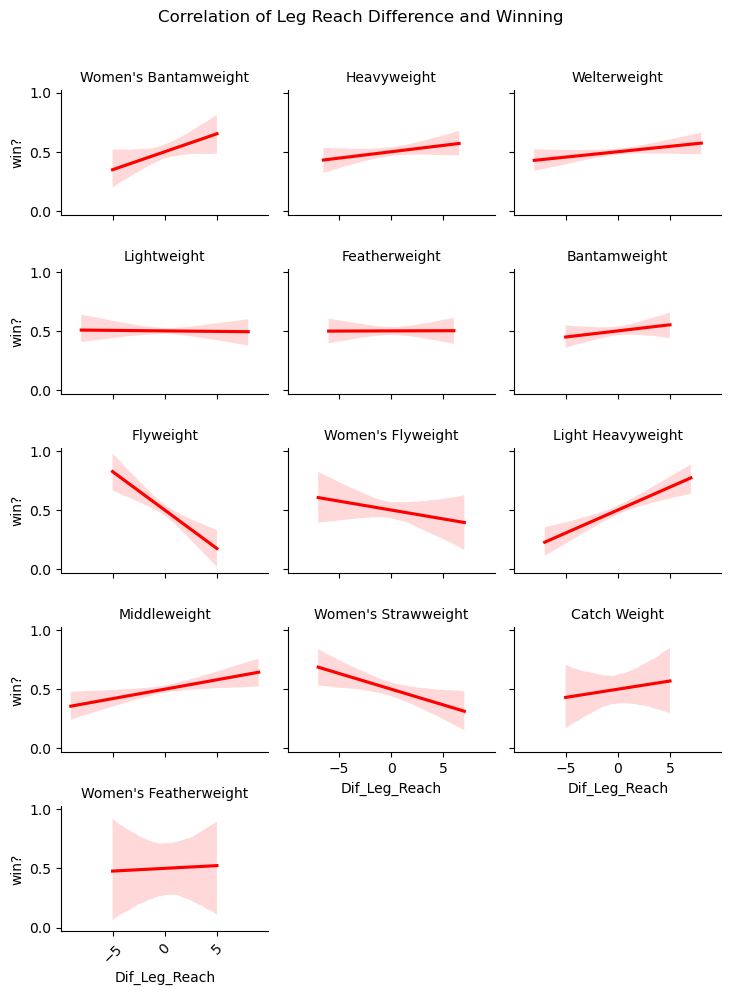

In [191]:
# plot correlation coefficients 
g = sns.FacetGrid(fight_viz, col='fight_weightclass', col_wrap=3, height=2, aspect=1.25)
g.map_dataframe(sns.regplot, x='Dif_Leg_Reach', y='win?', scatter=False, color='red')
g.set_axis_labels('Dif_Leg_Reach', 'win?')
g.set_titles('{col_name}')
g.fig.suptitle('Correlation of Leg Reach Difference and Winning')
g.fig.subplots_adjust(top=0.9)
# plot x-axis ticks and labels
plt.xticks(rotation=45)
plt.show()
# show y-axis ticks


This is interesting, as it shows that in some weightclasses, having a leg reach disadvantage may actually be an advantage, such as with the Flyweight class. This would seem to indicate that the smaller the athlete, the more important compactness (of body) becomes. Let's look further into this by taking a look at reach. 

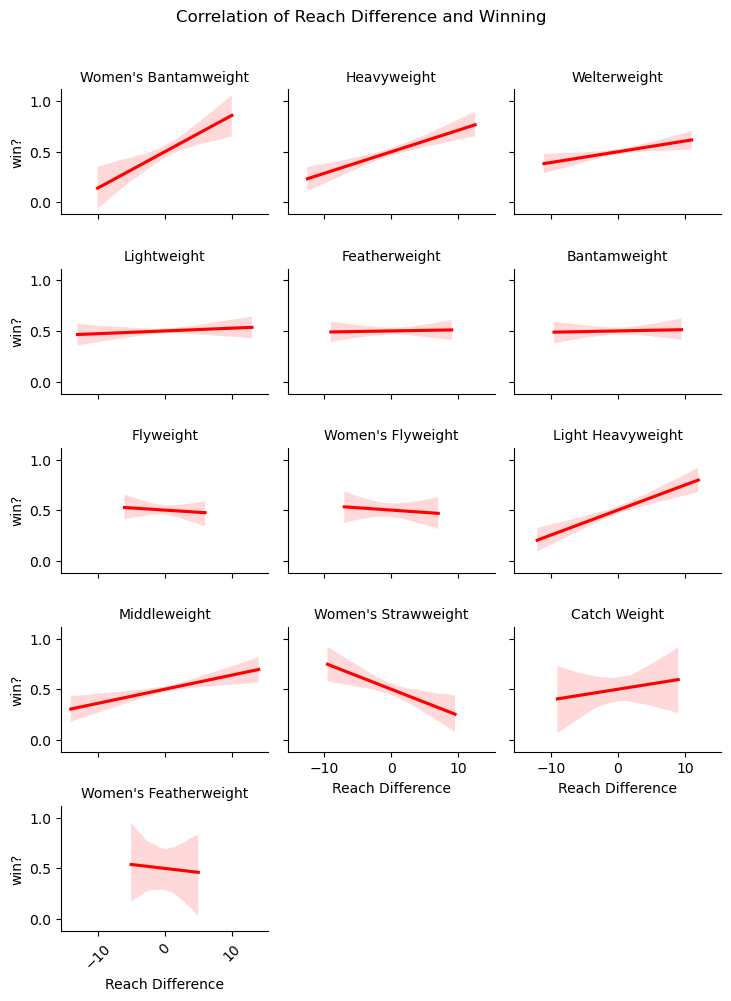

In [192]:
# plot correlation coefficients 
g = sns.FacetGrid(fight_viz, col='fight_weightclass', col_wrap=3, height=2, aspect=1.25)
g.map_dataframe(sns.regplot, x='Dif_Reach', y='win?', scatter=False, color='red')
g.set_axis_labels('Reach Difference', 'win?')
g.set_titles('{col_name}')
g.fig.suptitle('Correlation of Reach Difference and Winning')
g.fig.subplots_adjust(top=0.9)
# plot x-axis ticks and labels
plt.xticks(rotation=45)
plt.show()

Once again, it appears that as the weightclass decreases, the importance of reach decreases, and vice versa. This makes sense when it comes to heavyweights, as being able to reach your opponent AND having 'knockout power' is a large advantage. Let's check the KO/TKO rate for each weightclass.

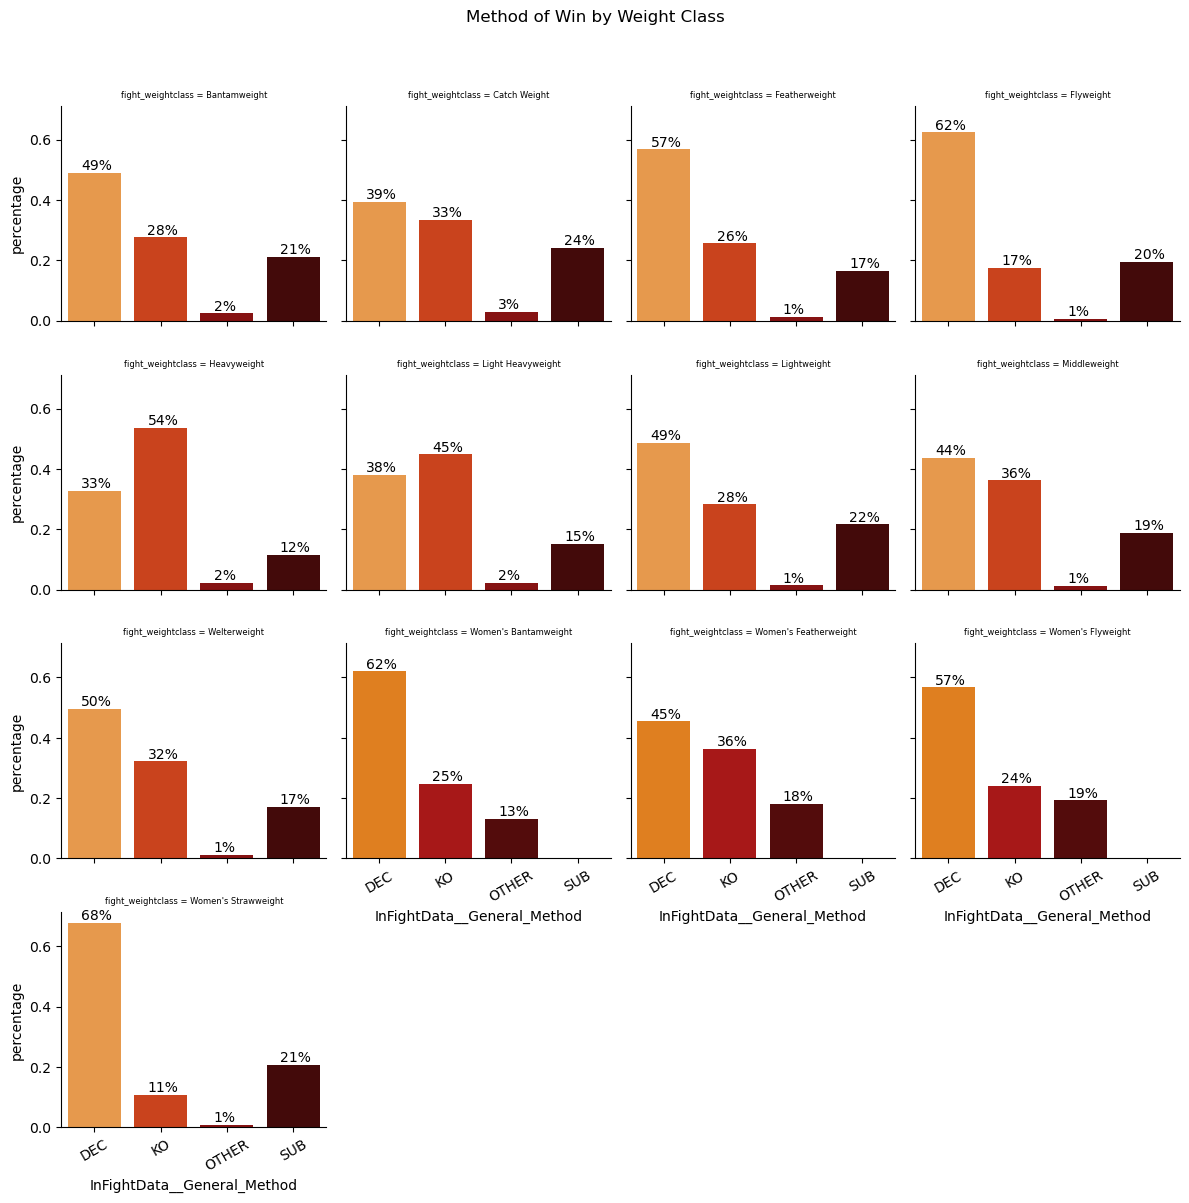

In [193]:
grouped = fights.groupby(['InFightData__General_Method', 'fight_weightclass']).size().reset_index(name='counts')
grouped['percentage'] = grouped.groupby('fight_weightclass')['counts'].apply(lambda x: x / x.sum())
g = sns.FacetGrid(grouped, col='fight_weightclass', col_wrap=4, height=3)
g = g.map(sns.barplot, 'InFightData__General_Method', 'percentage', palette='gist_heat_r')

# make titles smaller
for ax in g.axes.flat:
    ax.title.set_fontsize(6)
# show x-axis ticks and labels
# add data labels
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.01))

# show x-axis ticks and labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# add overall title
g.fig.suptitle('Method of Win by Weight Class')
g.fig.subplots_adjust(top=0.9)

plt.show()

In [194]:
data_pred = fight_viz
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

# only keep pairs that include win?
df = df[df.index.map(lambda x: 'win?' in x[0] or 'win?' in x[1])]
# make cc not scientific notation
df['cc'] = df['cc'].apply(lambda x: '{:.2f}'.format(x))
df['cc'] = df['cc'].astype(float)
# only keep pairs with cc > 0.2
df = df[df['cc'] > 0.2]

df



cc
pairs                                                
(Dif_Odds, win?)                                 0.36
(win?, favorite?)                                0.31
(win?, Dif_Rolling_Head_Strikes_land_mean)       0.28
(win?, Dif_Rolling_Head_Strikes_percent_mean)    0.27
(win?, Dif_Rolling_Sig_strike_land_mean)         0.27
(win?, Dif_Rolling_Head_Strikes_percent_median)  0.26
(Dif_Rolling_Ground_Strikes_land_mean, win?)     0.26
(Dif_Rolling_Kd_std, win?)                       0.25
(win?, Dif_Rolling_Total_Strikes_land_mean)      0.25
(Dif_Rolling_Ground_Strikes_att_mean, win?)      0.25
(Dif_Rolling_Total_Strikes_land_std, win?)       0.23
(win?, Dif_Rolling_Head_Strikes_land_std)        0.23
(win?, Dif_Rolling_Sig_strike_land_std)          0.23
(Dif_Rolling_Sig_strike_percent_mean, win?)      0.23
(win?, Dif_Rolling_Ground_Strikes_land_std)      0.23
(Dif_Rolling_Head_Strikes_land_median, win?)     0.23
(win?, Dif_Rolling_Ground_Strikes_att_std)       0.23
(win?, Dif_Rolling_Distance_Strikes_land_std)    0.23
(Dif_Rolling_Kd_mean, win?)                      0.23
(Dif_Rolling_Ground_Strikes_percent_mean, win?)  0.23
(win?, Dif_Rolling_Ctrl_time_tot_std)            0.22
(Dif_Rolling_Sig_strike_land_median, win?)       0.22
(win?, Dif_Rolling_Sig_strike_percent_median)    0.22
(win?, Dif_Rolling_Ctrl_time_min_std)            0.22
(Dif_Rolling_Total_Strikes_land_median, win?)    0.21
(Dif_Rolling_Takedowns_land_std, win?)           0.21
(Dif_Rolling_Total_Strikes_att_std, win?)        0.21
(win?, Dif_Rolling_Total_Strikes_att_mean)       0.21

Plot histogram and PDF of each column

In [195]:
fight_viz_num = fight_viz.select_dtypes(include=['float64', 'int64'])
# get rid of any infinite values
fight_viz_num = fight_viz_num.replace([np.inf, -np.inf], np.nan)

# drop any rows with NaN values
fight_viz_num = fight_viz_num.dropna()

In [196]:
fight_viz_rolling_dif_columns= [n for n in fight_viz_num.columns.to_list() if 'Dif' in n and 'Rolling' in n]
fight_viz_rolling_dif_columns

['Dif_Rolling_Kd_mean',
 'Dif_Rolling_Sig_strike_land_mean',
 'Dif_Rolling_Sig_strike_att_mean',
 'Dif_Rolling_Sig_strike_percent_mean',
 'Dif_Rolling_Total_Strikes_land_mean',
 'Dif_Rolling_Total_Strikes_att_mean',
 'Dif_Rolling_Total_Strikes_percent_mean',
 'Dif_Rolling_Takedowns_land_mean',
 'Dif_Rolling_Takedowns_att_mean',
 'Dif_Rolling_Takedown_percent_mean',
 'Dif_Rolling_Sub_Attempts_land_mean',
 'Dif_Rolling_Sub_Attempts_att_mean',
 'Dif_Rolling_Rev_mean',
 'Dif_Rolling_Ctrl_time_min_mean',
 'Dif_Rolling_Ctrl_time_sec_mean',
 'Dif_Rolling_Ctrl_time_tot_mean',
 'Dif_Rolling_Head_Strikes_land_mean',
 'Dif_Rolling_Head_Strikes_att_mean',
 'Dif_Rolling_Head_Strikes_percent_mean',
 'Dif_Rolling_Body_Strikes_land_mean',
 'Dif_Rolling_Body_Strikes_att_mean',
 'Dif_Rolling_Body_Strikes_percent_mean',
 'Dif_Rolling_Leg_Strikes_land_mean',
 'Dif_Rolling_Leg_Strikes_att_mean',
 'Dif_Rolling_Leg_Strikes_percent_mean',
 'Dif_Rolling_Distance_Strikes_land_mean',
 'Dif_Rolling_Distance_Strik

In [197]:
fv_rolling_dif_cols = fight_viz_num[fight_viz_rolling_dif_columns]

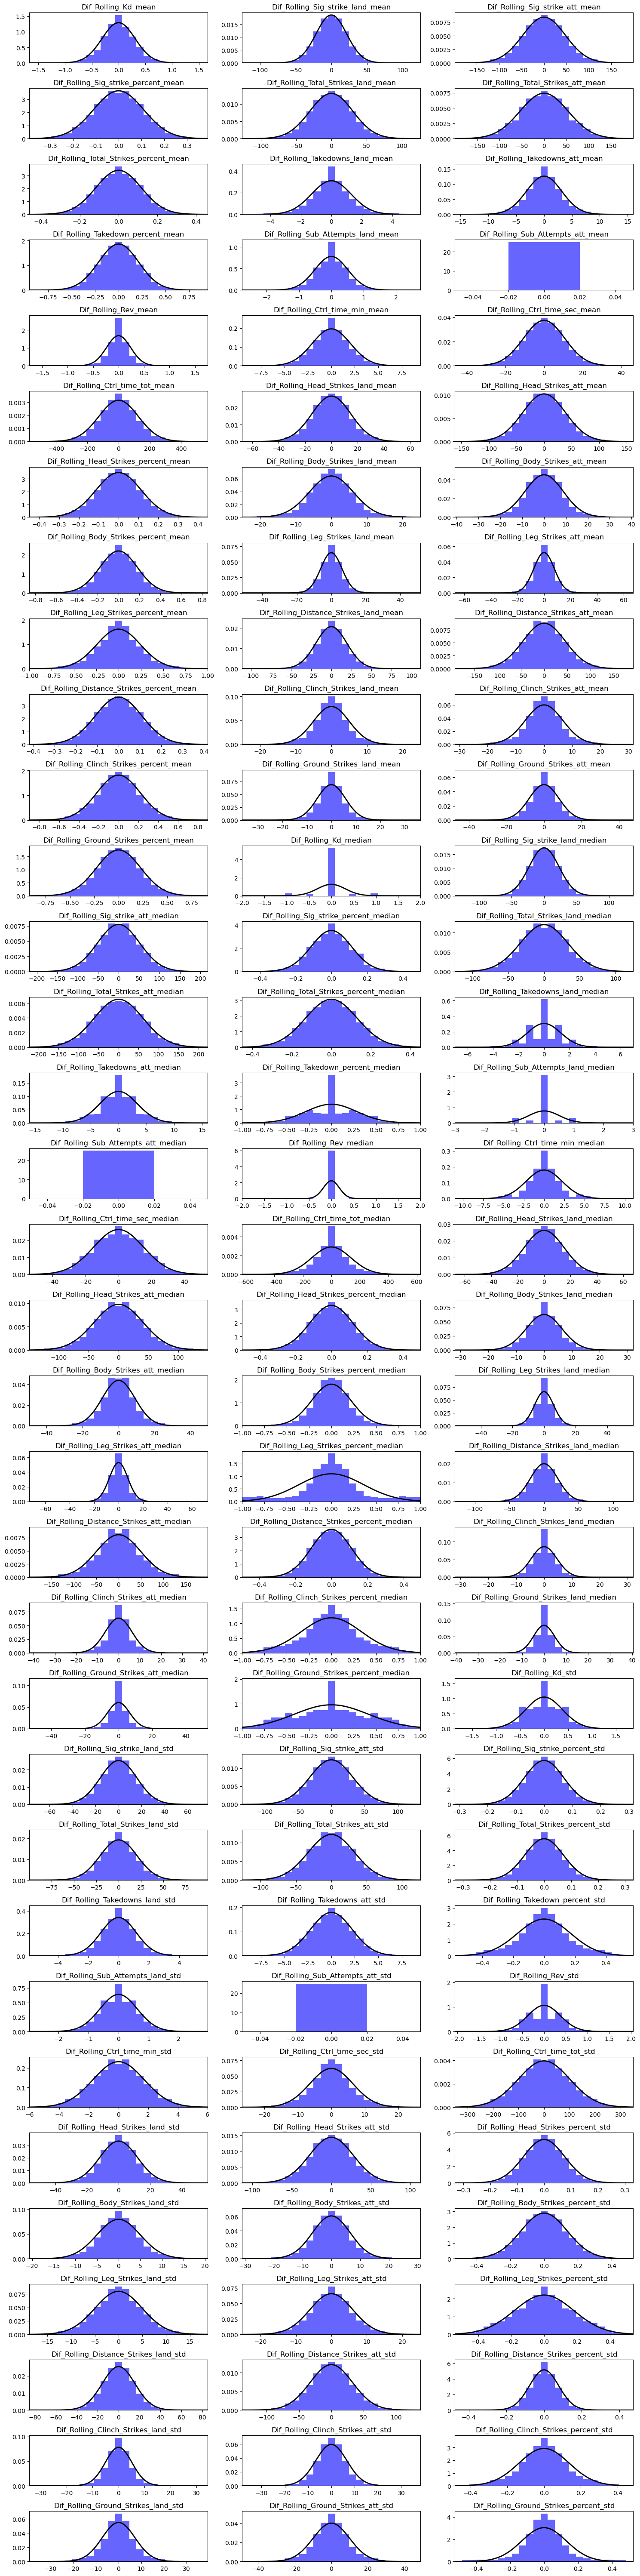

In [198]:

ncols = 3
nrows = int(np.ceil(len(fv_rolling_dif_cols.columns) / ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 60))
ax = ax.ravel()

for i, column in enumerate(fv_rolling_dif_cols.columns):
    data = fv_rolling_dif_cols[column]
    mu, std = norm.fit(data)
    x = np.linspace(np.min(data), np.max(data), 100)
    p = norm.pdf(x, mu, std)
    ax[i].hist(data, bins=25, density=True, alpha=0.6, color='b')
    ax[i].plot(x, p, 'k', linewidth=2)
    ax[i].set_title(column)
    ax[i].set_xlim(np.min(data), np.max(data))

plt.tight_layout()
plt.show()



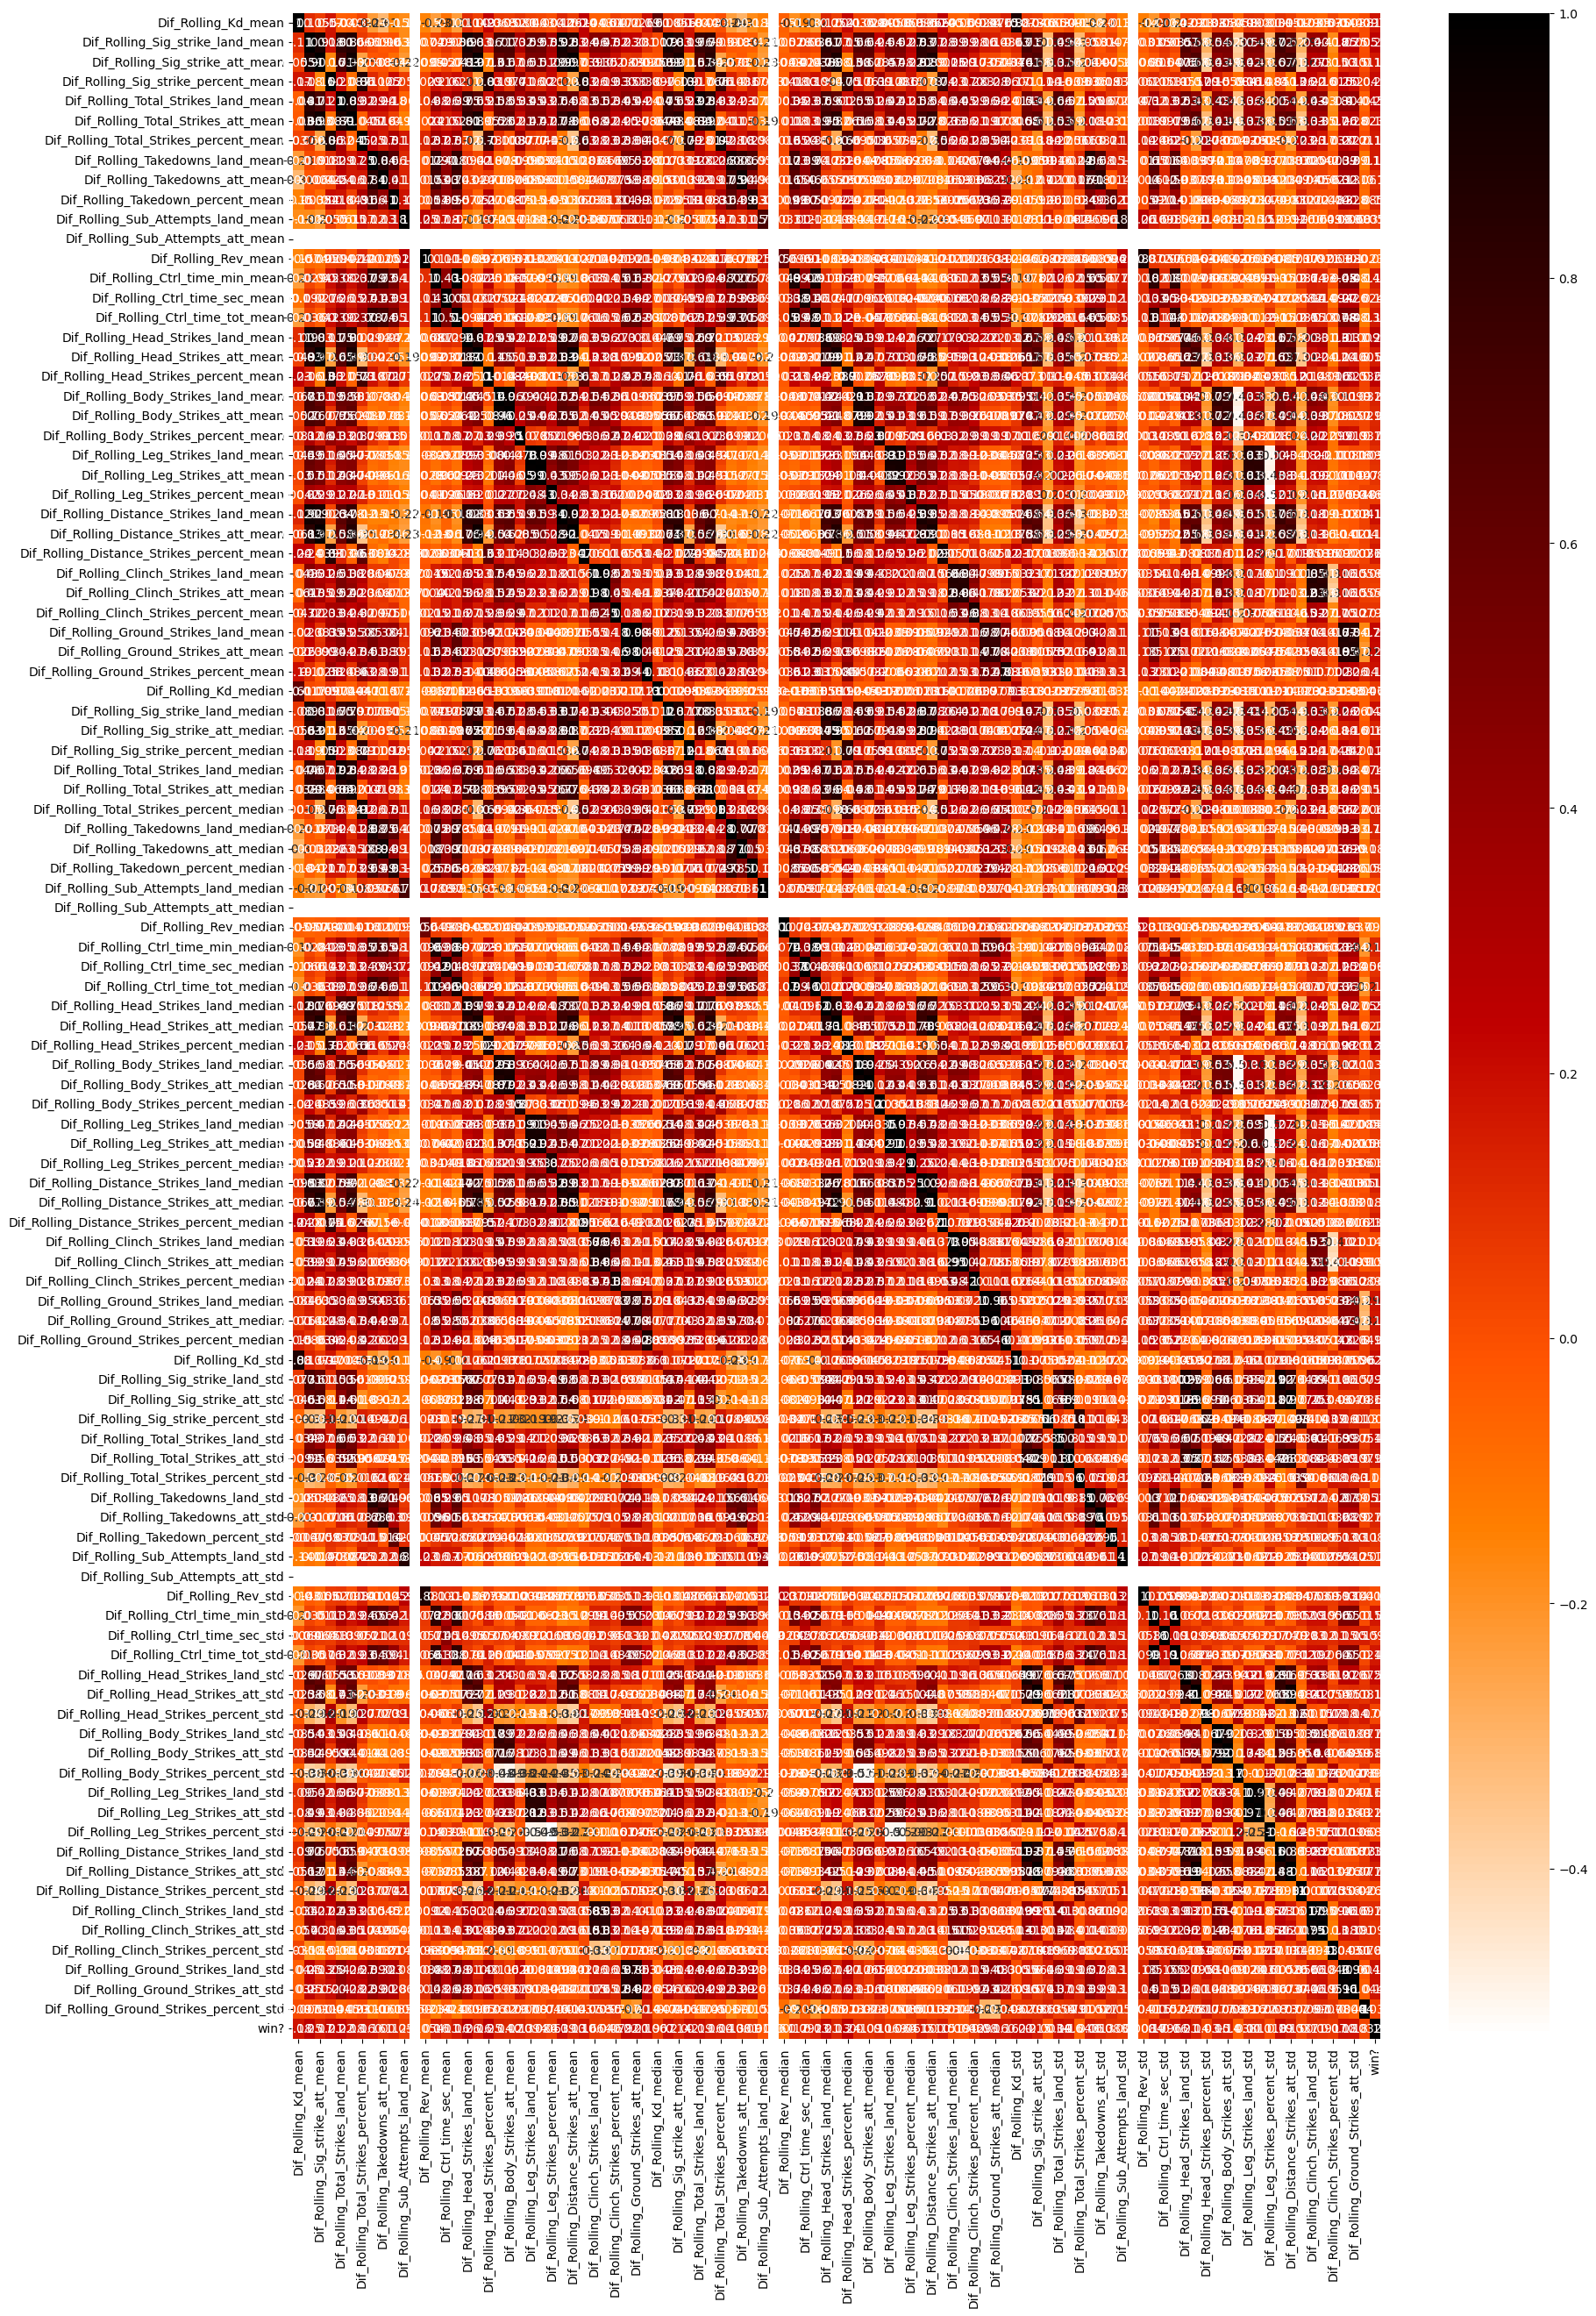

In [199]:
# check correlation coefficients for rolling difference columns with win?
fvrd_and_wins = fv_rolling_dif_cols.join(fight_viz_num['win?'])
# correlation heatmap
corr = fvrd_and_wins.corr()
plt.figure(figsize=(20, 30))
sns.heatmap(corr, annot=True, cmap='gist_heat_r')
plt.show()


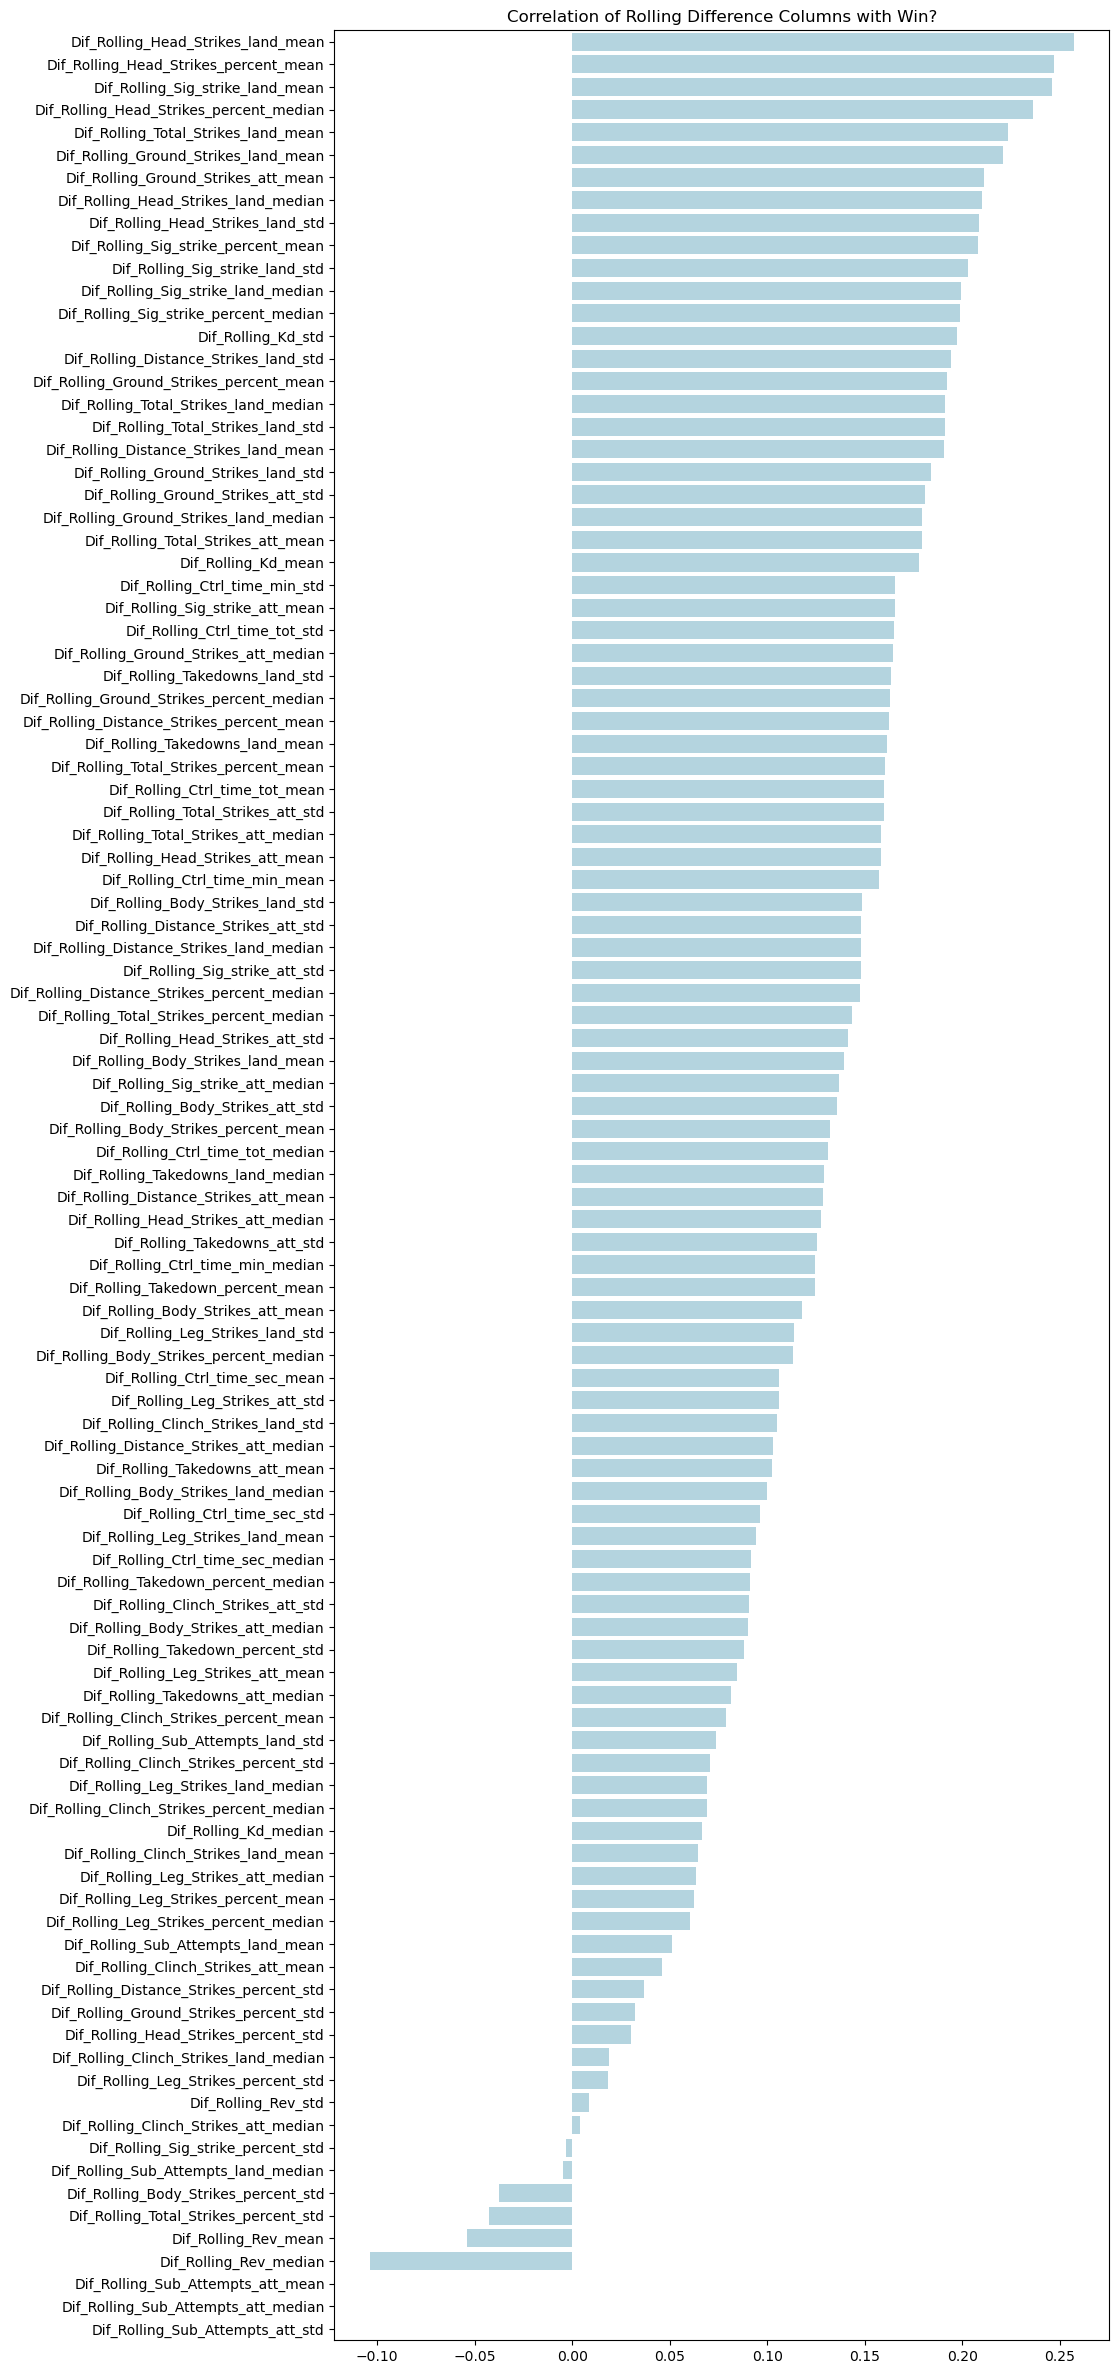

In [200]:
# correlation coefficients for rolling difference columns with win?
# drop win? from the list
rol_cors = fvrd_and_wins.corr()['win?'].sort_values(ascending=False)
rol_cors = rol_cors.drop('win?')
# plot correlation coefficients in a horizontal bar chart
plt.figure(figsize=(10, 30))
sns.barplot(x=rol_cors.values, y=rol_cors.index, color='lightblue')
plt.title('Correlation of Rolling Difference Columns with Win?')
plt.show()


# Prediction

In [201]:
df  = pd.read_csv('data/final/aggregates/Double_Fights_DF_V14.csv') 
print(df.shape)
df.head(3)

(8138, 780)


Fighter_A      Fighter_B  A_Kd  B_Kd  A_Sig_strike_land  \
0     Holly Holm   Irene Aldana     0     0                154   
1     Greg Hardy     Ben Sosoli     0     0                 54   
2  Jared Rosholt  Josh Copeland     0     0                 22   

   A_Sig_strike_att  B_Sig_strike_land  B_Sig_strike_att  \
0               301                 69               185   
1               105                 26                97   
2                45                  9                36   

   A_Sig_strike_percent  B_Sig_strike_percent  ...  \
0                  0.51                  0.37  ...   
1                  0.51                  0.26  ...   
2                  0.48                  0.25  ...   

   Dif_Opp_Avg_Body_Strikes_land_per_round  \
0                                -0.438261   
1                                     -inf   
2                                -3.222222   

   Dif_Opp_Avg_Body_Strikes_att_per_round  \
0                               -0.773091   
1                                    -inf   
2                               -3.944444   

   Dif_Opp_Avg_Leg_Strikes_land_per_round  \
0                               -0.375092   
1                                    -inf   
2                               -1.888889   

   Dif_Opp_Avg_Leg_Strikes_att_per_round  \
0                              -0.354364   
1                                   -inf   
2                              -2.194444   

   Dif_Opp_Avg_Distance_Strikes_land_per_round  \
0                                    -2.452268   
1                                         -inf   
2                                    -7.500000   

   Dif_Opp_Avg_Distance_Strikes_att_per_round  \
0                                   -6.012022   
1                                        -inf   
2                                  -19.138889   

   Dif_Opp_Avg_Clinch_Strikes_land_per_round  \
0                                   0.171166   
1                                       -inf   
2                                  -1.888889   

   Dif_Opp_Avg_Clinch_Strikes_att_per_round  \
0                                  0.113466   
1                                      -inf   
2                                 -1.694444   

   Dif_Opp_Avg_Ground_Strikes_land_per_round  \
0                                  -0.117277   
1                                        NaN   
2                                  -1.138889   

   Dif_Opp_Avg_Ground_Strikes_att_per_round  
0                                 -0.271253  
1                                       NaN  
2                                 -2.166667  

[3 rows x 780 columns]

In [202]:
unnamed = [n for n in df.columns if 'Unnamed' in n]
df.drop(columns=unnamed, inplace=True)
#Identify columns with missing values
nothere = df.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
nothere

0
A_topdown_Avg_Kd_per_round                  892
A_topdown_Avg_Sig_strike_land_per_round      14
A_topdown_Avg_Sig_strike_att_per_round        2
A_topdown_Avg_Total_Strikes_land_per_round    8
A_topdown_Avg_Total_Strikes_att_per_round     2
...                                         ...
Dif_Opp_Avg_Distance_Strikes_att_per_round  604
Dif_Opp_Avg_Clinch_Strikes_land_per_round   732
Dif_Opp_Avg_Clinch_Strikes_att_per_round    698
Dif_Opp_Avg_Ground_Strikes_land_per_round   778
Dif_Opp_Avg_Ground_Strikes_att_per_round    762

[150 rows x 1 columns]

In [203]:
# get cols with InFightData in the name
InFightData = [n for n in df.columns if 'InFightData' in n]
InFightData


['InFightData__Method_Primary',
 'InFightData__Method_Detail',
 'InFightData__Round',
 'InFightData__Time',
 'InFightData__General_Method',
 'InFightData__Total_Fight_Time_Seconds']

In [204]:
# drop them from df
df.drop(columns=InFightData, inplace=True)

In [205]:
df.columns[:50]

Index(['Fighter_A', 'Fighter_B', 'A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes_land',
       'A_Total_Strikes_att', 'B_Total_Strikes_land', 'B_Total_Strikes_att',
       'A_Total_Strikes_percent', 'B_Total_Strikes_percent',
       'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land',
       'B_Takedowns_att', 'A_Takedown_percent', 'B_Takedown_percent',
       'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land',
       'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min',
       'A_Ctrl_time_sec', 'B_Ctrl_time_min', 'B_Ctrl_time_sec',
       'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details', 'event_title',
       'event_url', 'date', 'Winner', 'fight_id', 'A_Head_Strikes_land',
       'A_Head_Strikes_att', 'B_Head_Strikes_land', 'B_Head_Strikes_att',
       'A_Head_Strikes_percent', 'B_Head_Strikes_percent',
       'A_Body_Strikes_land

In [206]:
df.columns[51:85]

Index(['B_Body_Strikes_percent', 'A_Leg_Strikes_land', 'A_Leg_Strikes_att',
       'B_Leg_Strikes_land', 'B_Leg_Strikes_att', 'A_Leg_Strikes_percent',
       'B_Leg_Strikes_percent', 'A_Distance_Strikes_land',
       'A_Distance_Strikes_att', 'B_Distance_Strikes_land',
       'B_Distance_Strikes_att', 'A_Distance_Strikes_percent',
       'B_Distance_Strikes_percent', 'A_Clinch_Strikes_land',
       'A_Clinch_Strikes_att', 'B_Clinch_Strikes_land', 'B_Clinch_Strikes_att',
       'A_Clinch_Strikes_percent', 'B_Clinch_Strikes_percent',
       'A_Ground_Strikes_land', 'A_Ground_Strikes_att',
       'B_Ground_Strikes_land', 'B_Ground_Strikes_att',
       'A_Ground_Strikes_percent', 'B_Ground_Strikes_percent', 'event_code',
       'Fighter_A_Odds', 'Fighter_B_Odds', 'Fighter_A_Odds_Change',
       'Fighter_B_Odds_Change', 'Dif_Kd', 'Dif_Sig_strike_land',
       'Dif_Sig_strike_att', 'Dif_Sig_strike_percent'],
      dtype='object')

In [207]:
to_drop= ['A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes_land',
       'A_Total_Strikes_att', 'B_Total_Strikes_land', 'B_Total_Strikes_att',
       'A_Total_Strikes_percent', 'B_Total_Strikes_percent',
       'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land',
       'B_Takedowns_att', 'A_Takedown_percent', 'B_Takedown_percent',
       'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land',
       'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min',
       'A_Ctrl_time_sec', 'B_Ctrl_time_min', 'B_Ctrl_time_sec',
       'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details','A_Head_Strikes_land',
       'A_Head_Strikes_att', 'B_Head_Strikes_land', 'B_Head_Strikes_att',
       'A_Head_Strikes_percent', 'B_Head_Strikes_percent',
       'A_Body_Strikes_land', 'A_Body_Strikes_att', 'B_Body_Strikes_land',
       'B_Body_Strikes_att', 'B_Body_Strikes_percent', 'A_Leg_Strikes_land', 'A_Leg_Strikes_att',
       'B_Leg_Strikes_land', 'B_Leg_Strikes_att', 'A_Leg_Strikes_percent',
       'B_Leg_Strikes_percent', 'A_Distance_Strikes_land',
       'A_Distance_Strikes_att', 'B_Distance_Strikes_land',
       'B_Distance_Strikes_att', 'A_Distance_Strikes_percent',
       'B_Distance_Strikes_percent', 'A_Clinch_Strikes_land',
       'A_Clinch_Strikes_att', 'B_Clinch_Strikes_land', 'B_Clinch_Strikes_att',
       'A_Clinch_Strikes_percent', 'B_Clinch_Strikes_percent',
       'A_Ground_Strikes_land', 'A_Ground_Strikes_att',
       'B_Ground_Strikes_land', 'B_Ground_Strikes_att',
       'A_Ground_Strikes_percent', 'B_Ground_Strikes_percent',  'A_Body_Strikes_percent']

df.drop(columns=to_drop, inplace=True)

In [208]:
# drop all Dif Rows
dif_rows = ['Dif_Kd', 'Dif_Sig_strike_land', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent',
 'Dif_Total_Strikes_land', 'Dif_Total_Strikes_att', 'Dif_Total_Strikes_percent', 'Dif_Takedowns_land',
 'Dif_Takedowns_att', 'Dif_Takedown_percent', 'Dif_Sub_Attempts_land', 'Dif_Sub_Attempts_att',
 'Dif_Rev', 'Dif_Ctrl_time_min', 'Dif_Ctrl_time_sec', 'Dif_Ctrl_time_tot', 'Dif_Head_Strikes_land',
 'Dif_Head_Strikes_att', 'Dif_Head_Strikes_percent', 'Dif_Body_Strikes_land', 'Dif_Body_Strikes_att',
 'Dif_Body_Strikes_percent', 'Dif_Leg_Strikes_land', 'Dif_Leg_Strikes_att', 'Dif_Leg_Strikes_percent',
 'Dif_Distance_Strikes_land', 'Dif_Distance_Strikes_att', 'Dif_Distance_Strikes_percent', 'Dif_Clinch_Strikes_land',
 'Dif_Clinch_Strikes_att', 'Dif_Clinch_Strikes_percent', 'Dif_Ground_Strikes_land','Dif_Ground_Strikes_att',
 'Dif_Ground_Strikes_percent']

df.drop(columns=dif_rows, inplace=True)

#### Check NAN

In [209]:
# Check NAN
missing = df.isna().sum()
missing = pd.DataFrame(missing)
missing = missing.loc[missing[0] > 0]
missing

0
A_topdown_Avg_Kd_per_round                  892
A_topdown_Avg_Sig_strike_land_per_round      14
A_topdown_Avg_Sig_strike_att_per_round        2
A_topdown_Avg_Total_Strikes_land_per_round    8
A_topdown_Avg_Total_Strikes_att_per_round     2
...                                         ...
Dif_Opp_Avg_Distance_Strikes_att_per_round  604
Dif_Opp_Avg_Clinch_Strikes_land_per_round   732
Dif_Opp_Avg_Clinch_Strikes_att_per_round    698
Dif_Opp_Avg_Ground_Strikes_land_per_round   778
Dif_Opp_Avg_Ground_Strikes_att_per_round    762

[150 rows x 1 columns]

In [210]:
# replace NAN with 0
df.fillna(0, inplace=True)

In [211]:
# replace and INF with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

In [212]:
all_cols = df.columns.to_list()
all_cols

['Fighter_A',
 'Fighter_B',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'fight_id',
 'event_code',
 'Fighter_A_Odds',
 'Fighter_B_Odds',
 'Fighter_A_Odds_Change',
 'Fighter_B_Odds_Change',
 'Dif_Odds',
 'A_Rolling_Kd_mean',
 'B_Rolling_Kd_mean',
 'A_Rolling_Kd_std',
 'B_Rolling_Kd_std',
 'A_Rolling_Kd_median',
 'B_Rolling_Kd_median',
 'A_Rolling_Sig_strike_land_mean',
 'B_Rolling_Sig_strike_land_mean',
 'A_Rolling_Sig_strike_land_std',
 'B_Rolling_Sig_strike_land_std',
 'A_Rolling_Sig_strike_land_median',
 'B_Rolling_Sig_strike_land_median',
 'A_Rolling_Sig_strike_att_mean',
 'B_Rolling_Sig_strike_att_mean',
 'A_Rolling_Sig_strike_att_std',
 'B_Rolling_Sig_strike_att_std',
 'A_Rolling_Sig_strike_att_median',
 'B_Rolling_Sig_strike_att_median',
 'A_Rolling_Sig_strike_percent_mean',
 'B_Rolling_Sig_strike_percent_mean',
 'A_Rolling_Sig_strike_percent_std',
 'B_Rolling_Sig_strike_percent_std',
 'A_Rolling_Sig_strike_percent_median',
 'B_Rolling_Sig_strike_percent_median',
 'A_Rolli

In [213]:
# find weightclass columns
weightclass = [n for n in all_cols if 'Weightclass' in n]
weightclass

['A_Typical_Weightclass',
 'B_Typical_Weightclass',
 'A_Fight_in_Typical_Weightclass',
 'B_Fight_in_Typical_Weightclass']

In [214]:
# check Winner column
df['Winner'].value_counts()

Jim Miller             46
Donald Cerrone         38
Charles Oliveira       38
Dustin Poirier         34
Jon Jones              34
                       ..
Daniel Spitz            2
Chris Kelades           2
Michihiro Omigawa       2
Christian Morecraft     2
Royston Wee             2
Name: Winner, Length: 1144, dtype: int64

In [215]:
#df.drop(columns=in_fight_cols, inplace=True)
#df.drop(columns=in_fight_difs, inplace=True)
colz = list(df.columns)
# get favorite
#df['favorite?'] = np.where(df['Fighter_A_Odds_obf'] < 0, 1, 0)

In [216]:
# check value counts
df['win?'].value_counts()

1    4069
0    4069
Name: win?, dtype: int64

In [217]:
fav_check = df.groupby('favorite?')['win?'].value_counts()
fav_check

favorite?  win?
0          0       2696
           1       1443
1          1       2626
           0       1373
Name: win?, dtype: int64

In [218]:
# Check how often winner is favorite
fav = df.loc[df['favorite?'] == 1]
fav['win?'].value_counts()

1    2626
0    1373
Name: win?, dtype: int64

#### Assign Target and Split

In [219]:
target_name = "win?"
y = df[target_name]
X = df.drop(columns=[target_name])

# drop columns you dont want to use
to_drop = ['event_title','event_url','date', 'fight_id', 'Fighter_A', 'Fighter_B', 'datetime', 'date_formatted',
            'Winner', 'event_code', 'A_Typical_Weightclass', 'B_Typical_Weightclass', 'final_round_seconds' ]  # sometimes 'event_id' needed
X = X.drop(columns=to_drop)

# Scoring Metric
class_metric = 'accuracy'

In [220]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

categorical_columns

['fight_weightclass']

In [221]:
numerical_columns

['Fighter_A_Odds',
 'Fighter_B_Odds',
 'Fighter_A_Odds_Change',
 'Fighter_B_Odds_Change',
 'Dif_Odds',
 'A_Rolling_Kd_mean',
 'B_Rolling_Kd_mean',
 'A_Rolling_Kd_std',
 'B_Rolling_Kd_std',
 'A_Rolling_Kd_median',
 'B_Rolling_Kd_median',
 'A_Rolling_Sig_strike_land_mean',
 'B_Rolling_Sig_strike_land_mean',
 'A_Rolling_Sig_strike_land_std',
 'B_Rolling_Sig_strike_land_std',
 'A_Rolling_Sig_strike_land_median',
 'B_Rolling_Sig_strike_land_median',
 'A_Rolling_Sig_strike_att_mean',
 'B_Rolling_Sig_strike_att_mean',
 'A_Rolling_Sig_strike_att_std',
 'B_Rolling_Sig_strike_att_std',
 'A_Rolling_Sig_strike_att_median',
 'B_Rolling_Sig_strike_att_median',
 'A_Rolling_Sig_strike_percent_mean',
 'B_Rolling_Sig_strike_percent_mean',
 'A_Rolling_Sig_strike_percent_std',
 'B_Rolling_Sig_strike_percent_std',
 'A_Rolling_Sig_strike_percent_median',
 'B_Rolling_Sig_strike_percent_median',
 'A_Rolling_Total_Strikes_land_mean',
 'B_Rolling_Total_Strikes_land_mean',
 'A_Rolling_Total_Strikes_land_std',
 '

In [222]:
numerical_columns.remove('favorite?')
categorical_columns.append('favorite?')

In [223]:
col_list = X.columns.to_list()

#### Split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [225]:
catcols = []

for col in categorical_columns:
    ind = col_list.index(col)
    catcols.append(ind)

catcols

[462, 471]

In [226]:
cont_cols_index = [n for n in range(len(X_train.columns)) if n not in catcols]

In [227]:
# To get the column names from onehotencoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
checker = ohe.fit_transform(X_train[categorical_columns])

In [228]:
feature_names_categorical = ohe.get_feature_names(categorical_columns)

### Preprocessing

In [229]:
# pipeline for categorical data
cat_preprocessing = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)
# pipeline for numerical data
num_preprocessing = make_pipeline(StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, cont_cols_index), ("cat", cat_preprocessing, catcols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...]),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [462, 471])])

### Function Additions

In [230]:
# SOURCE: The origin of this confusion matrix code was found on medium, '
# from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            a = cf[0,0]
            b = cf[0,1]
            c = cf[1,0]
            d = cf[1,1]
            tn = ((a / (a+b))*100).round(2).astype(str) + '%'
            fp = ((b / (a+b))*100).round(2).astype(str) + '%'
            fn = ((c / (c+d))*100).round(2).astype(str) + '%'
            tp = ((d / (c+d))*100).round(2).astype(str) + '%'
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            rwf_score = (1+(2**2)) * ((precision * recall) / (((2**2) * precision) + recall))
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\n\nRecall-Weighted F Score={:0.3f}".format(
                accuracy,precision,recall,f1_score, rwf_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages =  [tn,fp,fn,tp]
        # old = group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label', weight = 'bold')
        plt.xlabel('Predicted label' + stats_text, weight = 'bold')
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title,size = 20, weight = 'bold')

In [231]:
dfcols = ['Model', 'RWF Score', 'F1',  'Recall',  'Precision',  'Accuracy']
model_summary = pd.DataFrame(columns=dfcols)
model_summary

Empty DataFrame
Columns: [Model, RWF Score, F1, Recall, Precision, Accuracy]
Index: []

In [232]:
# Define Result Saving Initial Function
def save_result_w_matrix(cf,cv_mean_accuracy, cv_std_accuracy, model_name):
            global model_summary
            accuracy  = np.trace(cf) / float(np.sum(cf))
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            f_beta = (1+(.5**2)) * ((precision * recall) / (((.5**2) * precision) + recall))
            row = [(model_name, f_beta, f1_score, recall, precision, accuracy, cv_mean_accuracy, cv_std_accuracy)]
            res = pd.DataFrame(columns = dfcols, data = row)
            yeep = [model_summary, res]
            model_summary = pd.concat(yeep)
            model_summary = model_summary.sort_values('Accuracy', ascending = False)
            model_summary = model_summary.drop_duplicates()
            return model_summary.round(3)

In [233]:
def save_result(cv_mean_accuracy, cv_std_accuracy, model_name):
            global model_summary2
            row = [(model_name, cv_mean_accuracy, cv_std_accuracy)]
            res = pd.DataFrame(columns = dfcols2, data = row)
            yeep = [model_summary2, res]
            model_summary2 = pd.concat(yeep)
            model_summary2 = model_summary2.sort_values('Cv_Mean_Accuracy', ascending = False)
            model_summary2 = model_summary2.drop_duplicates()
            return model_summary2.round(3)

In [234]:
# Function runs model, fits it, and saves the results
def run_model(model, model_name):
    model.fit(X_train, y_train)
    model_prediction = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, model_prediction)
    save_result(cf_matrix, model_name)
    cf = make_confusion_matrix(cf_matrix)
    return model_summary

In [235]:
dfcols2 = ['Model', 'Cv_Mean_Accuracy', 'Cv_Std']
model_summary2 = pd.DataFrame(columns=dfcols2)
model_summary2

Empty DataFrame
Columns: [Model, Cv_Mean_Accuracy, Cv_Std]
Index: []

In [236]:
def make_cf(model):
    #load pickle file
    with open(model, 'rb') as f:
        model = pickle.load(f)
    #get predictions
    y_pred = model.predict(X_test)
    cf = plot_confusion_matrix(model, y_test, y_pred)
    return cf

In [237]:
# Function creates a pipeline, runs it, saves the result, and saves a pickle file

def create_fullpipe(preprocessing, model, model_name):
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', model)])
    fullpipe.fit(X_train, y_train)
    # cross validation
    cv = cross_val_score(fullpipe, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(fullpipe, open(f'models/{model_name}.pkl', 'wb'))
    return res

### Run Vanilla Models

In [238]:
create_fullpipe(preprocessing, LogisticRegression(), 'Logistic_Regression')
create_fullpipe(preprocessing, RandomForestClassifier(), 'Random_Forest')
create_fullpipe(preprocessing, DecisionTreeClassifier(), 'Decision_Tree')
create_fullpipe(preprocessing, BaggingClassifier(), 'Bagged_Trees')
create_fullpipe(preprocessing, ExtraTreesClassifier(), 'Extra_Trees')
create_fullpipe(preprocessing, KNeighborsClassifier(), 'K_Neighbors')
create_fullpipe(preprocessing, XGBClassifier(eval_metric = 'logloss'), 'XGBoost')

Model  Cv_Mean_Accuracy  Cv_Std
0        Random_Forest             0.710   0.005
0          Extra_Trees             0.709   0.011
0              XGBoost             0.705   0.013
0  Logistic_Regression             0.691   0.013
0         Bagged_Trees             0.672   0.005
0          K_Neighbors             0.629   0.005
0        Decision_Tree             0.600   0.011

In [239]:
# Function cross validates a model and saves the result and a pickle file
def gridsearched_model(model, model_name):
    cv = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(model, open(f'models/{model_name}.pkl', 'wb'))
    # make confusion matrix
    return res

In [240]:
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=500), 'Random_Forest_500')
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000), 'Random_Forest_1000')


Model  Cv_Mean_Accuracy  Cv_Std
0    Random_Forest_500             0.714   0.012
0   Random_Forest_1000             0.713   0.016
0        Random_Forest             0.710   0.005
0          Extra_Trees             0.709   0.011
0              XGBoost             0.705   0.013
0  Logistic_Regression             0.691   0.013
0         Bagged_Trees             0.672   0.005
0          K_Neighbors             0.629   0.005
0        Decision_Tree             0.600   0.011

#### Estimators Best at 1000

Now max features

In [241]:
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000, max_features = 'auto'), 'Random_Forest_mf_auto')
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000, max_features = 'sqrt'), 'Random_Forest_mf_sqrt')


Model  Cv_Mean_Accuracy  Cv_Std
0  Random_Forest_mf_auto             0.718   0.010
0  Random_Forest_mf_sqrt             0.716   0.014
0      Random_Forest_500             0.714   0.012
0     Random_Forest_1000             0.713   0.016
0          Random_Forest             0.710   0.005
0            Extra_Trees             0.709   0.011
0                XGBoost             0.705   0.013
0    Logistic_Regression             0.691   0.013
0           Bagged_Trees             0.672   0.005
0            K_Neighbors             0.629   0.005
0          Decision_Tree             0.600   0.011

In [242]:
# This function is an edited (to fit my purposes) version of a function found on medium.com
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=False,
                          graph=True,
                          display_all_params=True):

    from matplotlib      import pyplot as plt
    from IPython.display import display

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    new_param = 'param_' + param_name
    best_row = scores_df.iloc[0, :]
    best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row[new_param]

    # display the top 'num_results' results
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # PLOT
    scores_df = scores_df.sort_values(by=new_param)

    means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df[new_param]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        try:
            plt.errorbar(params, means, yerr=stds)
            plt.axhline(y=best_mean + best_stdev, color='red')
            plt.axhline(y=best_mean - best_stdev, color='red')
            plt.plot(best_param, best_mean, 'or')
            plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
            plt.xlabel(param_name)
            plt.ylabel('Score')
            plt.show()
        except:
            plt.plot(best_param, best_mean, 'or')
            plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
            plt.xlabel(param_name)
            plt.ylabel('Score')
            plt.show()

Instread of doing a full gridsearch, which would take days with this dataset, I will do a gridsearch for each parameter, adding the best parameter to the next gridsearch. In testing, this was the most efficient way to find the best parameters.

In [243]:
def random_forest_gridsearch(model):
    init_grid = {'model__n_estimators' : [50, 100, 150, 200, 350, 500, 750, 1000],
                    'model__max_depth' : [None],
                    'model__max_features' : ['auto'],
                    'model__criterion' : ['gini'],
                    'model__min_samples_split' : [2],
                    'model__min_samples_leaf' : [1],
                    'model__bootstrap' :  [True],
                    'model__max_leaf_nodes' : [None],
                    'model__min_impurity_decrease' : [0.0],
                    'model__ccp_alpha' : [0.0]}

    # grid search #1  - n_estimators
    gridsearch_1 = GridSearchCV(model, init_grid, cv = 4, scoring = 'accuracy', n_jobs = 16, verbose = 10)
    gridsearch_1.fit(X_train, y_train)
    gridsearched_model(gridsearch_1.best_estimator_, 'Random_Forest_Gridsearched_1')
    bp = gridsearch_1.best_params_
    bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

    # get param values
    n_est = bp2[bp2['index'] == 'model__n_estimators']
    n_est = n_est[0].values[0]

    # if estimators or depth is min or max, keep pushing boundaries

    if n_est == 1000:
        # go higher!
        grid2 = {'model__n_estimators' : [500, 650, 800, 1000, 1500, 2000],
                    'model__max_depth' : [None],
                    'model__max_features' : ['auto'],
                    'model__criterion' : ['gini', 'entropy'],
                    'model__min_samples_split' : [2],
                    'model__min_samples_leaf' : [1],
                    'model__bootstrap' :  [True],
                    'model__max_leaf_nodes' : [None],
                    'model__min_impurity_decrease' : [0.0],
                    'model__ccp_alpha' : [0.0]}
        gridsearch_2 = GridSearchCV(model, grid2, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_2.fit(X_train, y_train)
        gridsearched_model(gridsearch_2.best_estimator_, 'Random_Forest_Gridsearched_2')
        bp = gridsearch_2.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

    if n_est == 50:
        # go lower
        grid2 = {'model__n_estimators' : [20, 30, 40, 50, 60, 75, 100],
                    'model__max_depth' : [None],
                    'model__max_features' : ['auto'],
                    'model__criterion' : ['gini'],
                    'model__min_samples_split' : [2],
                    'model__min_samples_leaf' : [1],
                    'model__bootstrap' :  [True],
                    'model__max_leaf_nodes' : [None],
                    'model__min_impurity_decrease' : [0.0],
                    'model__ccp_alpha' : [0.0]}
        gridsearch_2 = GridSearchCV(model, grid2, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_2.fit(X_train, y_train)
        gridsearched_model(gridsearch_2.best_estimator_, 'Random_Forest_Gridsearched_2')
        bp = gridsearch_2.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

    else:
        print(f'Best n_estimators: {n_est}')
        maxdepth_grid = {'model__n_estimators' : [n_est],
                    'model__max_depth' : [None, 2,3,4,5,6,7,8,9,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 100],
                    'model__max_features' : ['auto'],
                    'model__criterion' : ['gini'],
                    'model__min_samples_split' : [2],
                    'model__min_samples_leaf' : [1],
                    'model__bootstrap' :  [True],
                    'model__max_leaf_nodes' : [None],
                    'model__min_impurity_decrease' : [0.0],
                    'model__ccp_alpha' : [0.0]}

        ##### GRID SEARCH 2 -- MAX DEPTH #####
        gridsearch_2 = GridSearchCV(model, maxdepth_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_2.fit(X_train, y_train)
        gridsearched_model(gridsearch_2.best_estimator_, 'Random_Forest_Gridsearched_2')
        bp = gridsearch_2.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        max_depth = bp2[bp2['index'] == 'model__max_depth']
        max_depth = max_depth[0].values[0]
        print(f'Best max_depth: {max_depth}')

        ##### GRID SEARCH 3 -- MAX FEATURES #####
        max_features_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__max_features' : ['auto', 'sqrt', 'log2', .4, .5, .6, .7, .8, .9, 1.0],
                                'model__criterion' : ['gini'],
                                'model__min_samples_split' : [2],
                                'model__min_samples_leaf' : [1],
                                'model__bootstrap' :  [True],
                                'model__max_leaf_nodes' : [None],
                                'model__min_impurity_decrease' : [0.0],
                                'model__ccp_alpha' : [0.0]}
        gridsearch_3 = GridSearchCV(model, max_features_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)

        gridsearch_3.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_3.best_estimator_, 'Random_Forest_Gridsearched_3')
        bp = gridsearch_3.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        max_features = bp2[bp2['index'] == 'model__max_features']
        max_features = max_features[0].values[0]
        print(f'Best max_features: {max_features}')

        ##### GRID SEARCH 4 -- MIN SAMPLES SPLIT #####
        min_samples_split_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__max_features' : [max_features],
                                'model__criterion' : ['gini'],
                                'model__min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'model__min_samples_leaf' : [1],
                                'model__bootstrap' :  [True],
                                'model__max_leaf_nodes' : [None],
                                'model__min_impurity_decrease' : [0.0],
                                'model__ccp_alpha' : [0.0]}

        gridsearch_4 = GridSearchCV(model, min_samples_split_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_4.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_4.best_estimator_, 'Random_Forest_Gridsearched_4')
        bp = gridsearch_4.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        min_samples_split = bp2[bp2['index'] == 'model__min_samples_split']
        min_samples_split = min_samples_split[0].values[0]
        print(f'Best min_samples_split: {min_samples_split}')

        ##### GRID SEARCH 5 -- MIN SAMPLES LEAF #####
        min_samples_leaf_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__max_features' : [max_features],
                                'model__criterion' : ['gini'],
                                'model__min_samples_split' : [min_samples_split],
                                'model__min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'model__bootstrap' :  [True],
                                'model__max_leaf_nodes' : [None],
                                'model__min_impurity_decrease' : [0.0],
                                'model__ccp_alpha' : [0.0]}

        gridsearch_5 = GridSearchCV(model, min_samples_leaf_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_5.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_5.best_estimator_, 'Random_Forest_Gridsearched_5')
        bp = gridsearch_5.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        min_samples_leaf = bp2[bp2['index'] == 'model__min_samples_leaf']
        min_samples_leaf = min_samples_leaf[0].values[0]
        print(f'Best min_samples_leaf: {min_samples_leaf}')

        ##### GRID SEARCH 6 -- MAX LEAF NODES #####
        max_leaf_nodes_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__max_features' : [max_features],
                                'model__criterion' : ['gini'],
                                'model__min_samples_split' : [min_samples_split],
                                'model__min_samples_leaf' : [min_samples_leaf],
                                'model__bootstrap' :  [True],
                                'model__max_leaf_nodes' : [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'model__min_impurity_decrease' : [0.0],
                                'model__ccp_alpha' : [0.0]}
        gridsearch_6 = GridSearchCV(model, max_leaf_nodes_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_6.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_6.best_estimator_, 'Random_Forest_Gridsearched_6')
        bp = gridsearch_6.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        max_leaf_nodes = bp2[bp2['index'] == 'model__max_leaf_nodes']
        max_leaf_nodes = max_leaf_nodes[0].values[0]
        print(f'Best max_leaf_nodes: {max_leaf_nodes}')

        ##### GRID SEARCH 7 -- MIN IMPURITY DECREASE #####
        min_impurity_decrease_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__max_features' : [max_features],
                                'model__criterion' : ['gini'],
                                'model__min_samples_split' : [min_samples_split],
                                'model__min_samples_leaf' : [min_samples_leaf],
                                'model__bootstrap' :  [True],
                                'model__max_leaf_nodes' : [max_leaf_nodes],
                                'model__min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                'model__ccp_alpha' : [0.0]}
        gridsearch_7 = GridSearchCV(model, min_impurity_decrease_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_7.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_7.best_estimator_, 'Random_Forest_Gridsearched_7')
        bp = gridsearch_7.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        min_impurity_decrease = bp2[bp2['index'] == 'model__min_impurity_decrease']
        min_impurity_decrease = min_impurity_decrease[0].values[0]
        print(f'Best min_impurity_decrease: {min_impurity_decrease}')

        ##### GRID SEARCH 8 -- CCP ALPHA #####
        ccp_alpha_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__max_features' : [max_features],
                                'model__criterion' : ['gini'],
                                'model__min_samples_split' : [min_samples_split],
                                'model__min_samples_leaf' : [min_samples_leaf],
                                'model__bootstrap' :  [True],
                                'model__max_leaf_nodes' : [max_leaf_nodes],
                                'model__min_impurity_decrease' : [min_impurity_decrease],
                                'model__ccp_alpha' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}
                                
        gridsearch_8 = GridSearchCV(model, ccp_alpha_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_8.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_8.best_estimator_, 'Random_Forest_Gridsearched_8')
        bp = gridsearch_8.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        ccp_alpha = bp2[bp2['index'] == 'model__ccp_alpha']
        ccp_alpha = ccp_alpha[0].values[0]
        print(f'Best ccp_alpha: {ccp_alpha}')

        return gm, gridsearch_1.best_params_, gridsearch_2.best_params_, gridsearch_3.best_params_, gridsearch_4.best_params_, gridsearch_5.best_params_, gridsearch_6.best_params_, gridsearch_7.best_params_, gridsearch_8.best_params_

In [244]:
random_forest = pickle.load(open('models/random_forest.pkl', 'rb'))
random_forest_gridsearch(random_forest)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best n_estimators: 500
Fitting 4 folds for each of 26 candidates, totalling 104 fits
Best max_depth: 8
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best max_features: 0.8
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best min_samples_split: 2
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best min_samples_leaf: 4
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best max_leaf_nodes: None
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best min_impurity_decrease: 0.0
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best ccp_alpha: 0.0


(                          Model  Cv_Mean_Accuracy  Cv_Std
 0  Random_Forest_Gridsearched_2             0.719   0.009
 0         Random_Forest_mf_auto             0.718   0.010
 0         Random_Forest_mf_sqrt             0.716   0.014
 0             Random_Forest_500             0.714   0.012
 0            Random_Forest_1000             0.713   0.016
 0  Random_Forest_Gridsearched_4             0.713   0.006
 0  Random_Forest_Gridsearched_6             0.711   0.009
 0  Random_Forest_Gridsearched_8             0.710   0.006
 0                 Random_Forest             0.710   0.005
 0  Random_Forest_Gridsearched_1             0.710   0.006
 0  Random_Forest_Gridsearched_7             0.709   0.008
 0  Random_Forest_Gridsearched_5             0.709   0.005
 0                   Extra_Trees             0.709   0.011
 0  Random_Forest_Gridsearched_3             0.706   0.015
 0                       XGBoost             0.705   0.013
 0           Logistic_Regression             0.691   0.0

### Model 1: XGBoost

In [245]:
xg_boost = pickle.load(open('models/XGBoost.pkl', 'rb'))
keys = xg_boost.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
xg_boost[1].get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=32,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [246]:
def xgboost_gridsearch(model):
        ##### GRID SEARCH 1 -- N ESTIMATORS #####
        n_est_grid = {'model__n_estimators' : [50, 100, 200, 300, 500, 600,  800,  1000],
                                'model__max_depth' : [None],
                                'model__learning_rate' : [0.1],
                                'model__min_child_weight' : [1],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}


        gridsearch_1 = GridSearchCV(model, n_est_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_1.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_1.best_estimator_, 'XGBoost_Gridsearched_1')
        bp = gridsearch_1.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        n_est = bp2[bp2['index'] == 'model__n_estimators']
        n_est = n_est[0].values[0]
        print(f'Best n_estimators: {n_est}')

        ##### GRID SEARCH 2 -- MAX DEPTH #####
        max_depth_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
                                'model__learning_rate' : [0.1],
                                'model__min_child_weight' : [1],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}


        gridsearch_2 = GridSearchCV(model, max_depth_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_2.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_2.best_estimator_, 'XGBoost_Gridsearched_2')
        bp = gridsearch_2.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        max_depth = bp2[bp2['index'] == 'model__max_depth']
        max_depth = max_depth[0].values[0]
        print(f'Best max_depth: {max_depth}')

        ##### GRID SEARCH 3 -- LEARNING RATE #####
        learning_rate_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
                                'model__min_child_weight' : [1],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_3 = GridSearchCV(model, learning_rate_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_3.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_3.best_estimator_, 'XGBoost_Gridsearched_3')
        bp = gridsearch_3.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        learning_rate = bp2[bp2['index'] == 'model__learning_rate']
        learning_rate = learning_rate[0].values[0]
        print(f'Best learning_rate: {learning_rate}')

        ##### GRID SEARCH 4 -- MIN CHILD WEIGHT #####
        min_child_weight_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_4 = GridSearchCV(model, min_child_weight_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_4.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_4.best_estimator_, 'XGBoost_Gridsearched_4')
        bp = gridsearch_4.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        min_child_weight = bp2[bp2['index'] == 'model__min_child_weight']
        min_child_weight = min_child_weight[0].values[0]
        print(f'Best min_child_weight: {min_child_weight}')

        ##### GRID SEARCH 5 -- GAMMA #####
        gamma_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_5 = GridSearchCV(model, gamma_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_5.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_5.best_estimator_, 'XGBoost_Gridsearched_5')
        bp = gridsearch_5.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        gamma = bp2[bp2['index'] == 'model__gamma']
        gamma = gamma[0].values[0]
        print(f'Best gamma: {gamma}')

        ##### GRID SEARCH 6 -- SUBSAMPLE #####
        subsample_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_6 = GridSearchCV(model, subsample_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_6.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_6.best_estimator_, 'XGBoost_Gridsearched_6')
        bp = gridsearch_6.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        subsample = bp2[bp2['index'] == 'model__subsample']
        subsample = subsample[0].values[0]
        print(f'Best subsample: {subsample}')

        ##### GRID SEARCH 7 -- COLSAMPLE BYTREE #####
        colsample_bytree_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_7 = GridSearchCV(model, colsample_bytree_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_7.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_7.best_estimator_, 'XGBoost_Gridsearched_7')
        bp = gridsearch_7.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        colsample_bytree = bp2[bp2['index'] == 'model__colsample_bytree']
        colsample_bytree = colsample_bytree[0].values[0]
        print(f'Best colsample_bytree: {colsample_bytree}')

        ##### GRID SEARCH 8 -- COLSAMPLE BYLEVEL #####
        colsample_bylevel_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_8 = GridSearchCV(model, colsample_bylevel_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_8.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_8.best_estimator_, 'XGBoost_Gridsearched_8')
        bp = gridsearch_8.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        colsample_bylevel = bp2[bp2['index'] == 'model__colsample_bylevel']
        colsample_bylevel = colsample_bylevel[0].values[0]

        print(f'Best colsample_bylevel: {colsample_bylevel}')

        ##### GRID SEARCH 9 -- COLSAMPLE BYNODE #####
        colsample_bynode_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_9 = GridSearchCV(model, colsample_bynode_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_9.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_9.best_estimator_, 'XGBoost_Gridsearched_9')
        bp = gridsearch_9.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        colsample_bynode = bp2[bp2['index'] == 'model__colsample_bynode']
        colsample_bynode = colsample_bynode[0].values[0]
        print(f'Best colsample_bynode: {colsample_bynode}')

        ##### GRID SEARCH 10 -- REG ALPHA #####
        reg_alpha_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_10 = GridSearchCV(model, reg_alpha_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_10.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_10.best_estimator_, 'XGBoost_Gridsearched_10')
        bp = gridsearch_10.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        reg_alpha = bp2[bp2['index'] == 'model__reg_alpha']
        reg_alpha = reg_alpha[0].values[0]
        print(f'Best reg_alpha: {reg_alpha}')

        ##### GRID SEARCH 11 -- REG LAMBDA #####
        reg_lambda_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}
                                

        gridsearch_11 = GridSearchCV(model, reg_lambda_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_11.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_11.best_estimator_, 'XGBoost_Gridsearched_11')
        bp = gridsearch_11.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        reg_lambda = bp2[bp2['index'] == 'model__reg_lambda']
        reg_lambda = reg_lambda[0].values[0]
        print(f'Best reg_lambda: {reg_lambda}')

        ##### GRID SEARCH 12 -- SCALE POS WEIGHT #####
        scale_pos_weight_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [reg_lambda],
                                'model__scale_pos_weight' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_12 = GridSearchCV(model, scale_pos_weight_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_12.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_12.best_estimator_, 'XGBoost_Gridsearched_12')
        bp = gridsearch_12.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        scale_pos_weight = bp2[bp2['index'] == 'model__scale_pos_weight']
        scale_pos_weight = scale_pos_weight[0].values[0]

        print(f'Best scale_pos_weight: {scale_pos_weight}')

        ##### GRID SEARCH 13 -- BASE SCORE #####
        base_score_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [reg_lambda],
                                'model__scale_pos_weight' : [scale_pos_weight],
                                'model__base_score' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_13 = GridSearchCV(model, base_score_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_13.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_13.best_estimator_, 'XGBoost_Gridsearched_13')
        bp = gridsearch_13.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        base_score = bp2[bp2['index'] == 'model__base_score']
        base_score = base_score[0].values[0]

        print(f'Best base_score: {base_score}')

        ##### GRID SEARCH 14 -- MAX DELTA STEP #####
        max_delta_step_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [reg_lambda],
                                'model__scale_pos_weight' : [scale_pos_weight],
                                'model__base_score' : [base_score],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_14 = GridSearchCV(model, max_delta_step_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_14.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_14.best_estimator_, 'XGBoost_Gridsearched_14')

        ## RETURN

        return gm, gridsearch_1.best_params_, gridsearch_2.best_params_, gridsearch_3.best_params_, gridsearch_4.best_params_, gridsearch_5.best_params_, gridsearch_6.best_params_, gridsearch_7.best_params_, gridsearch_8.best_params_, gridsearch_9.best_params_, gridsearch_10.best_params_, gridsearch_11.best_params_, gridsearch_12.best_params_, gridsearch_13.best_params_, gridsearch_14.best_params_




In [247]:
xgboost_gridsearch(xg_boost)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best n_estimators: 100
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Best max_depth: 5
Fitting 4 folds for each of 11 candidates, totalling 44 fits
Best learning_rate: 0.1
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best min_child_weight: 5
Fitting 4 folds for each of 11 candidates, totalling 44 fits
Best gamma: 0.7
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best subsample: 1
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best colsample_bytree: 0.9
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best colsample_bylevel: 1
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best colsample_bynode: 1
Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best reg_alpha: 0.001
Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best reg_lambda: 1
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best scale_pos_weight: 1
Fitting

(                          Model  Cv_Mean_Accuracy  Cv_Std
 0  Random_Forest_Gridsearched_2             0.719   0.009
 0         Random_Forest_mf_auto             0.718   0.010
 0         Random_Forest_mf_sqrt             0.716   0.014
 0             Random_Forest_500             0.714   0.012
 0            Random_Forest_1000             0.713   0.016
 0  Random_Forest_Gridsearched_4             0.713   0.006
 0  Random_Forest_Gridsearched_6             0.711   0.009
 0  Random_Forest_Gridsearched_8             0.710   0.006
 0        XGBoost_Gridsearched_1             0.710   0.014
 0                 Random_Forest             0.710   0.005
 0  Random_Forest_Gridsearched_1             0.710   0.006
 0  Random_Forest_Gridsearched_7             0.709   0.008
 0  Random_Forest_Gridsearched_5             0.709   0.005
 0                   Extra_Trees             0.709   0.011
 0  Random_Forest_Gridsearched_3             0.706   0.015
 0       XGBoost_Gridsearched_11             0.705   0.0

### Extra Trees

In [248]:
extra_trees = pickle.load(open('models/Extra_Trees.pkl', 'rb'))

In [249]:
keys = extra_trees.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
model_keys

['model',
 'model__bootstrap',
 'model__ccp_alpha',
 'model__class_weight',
 'model__criterion',
 'model__max_depth',
 'model__max_features',
 'model__max_leaf_nodes',
 'model__max_samples',
 'model__min_impurity_decrease',
 'model__min_samples_leaf',
 'model__min_samples_split',
 'model__min_weight_fraction_leaf',
 'model__n_estimators',
 'model__n_jobs',
 'model__oob_score',
 'model__random_state',
 'model__verbose',
 'model__warm_start']

In [250]:
def extra_trees_gridsearch(model):
        """
        Gridsearches the Extra Trees model
        """
        # GRID SEARCH 1 -- N ESTIMATORS
        n_estimators_grid = {'model__n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                             'model__criterion' : ['gini'],
                             'model__max_depth' : [None,],
                             'model__min_samples_split' : [2 ],
                             'model__min_samples_leaf' : [1, ],
                             'model__min_weight_fraction_leaf' : [0.0],
                             'model__max_features' : ['auto'],
                             'model__max_leaf_nodes' : [None],
                             'model__min_impurity_decrease' : [0.0],
                             'model__bootstrap' : [False],
                             'model__oob_score' : [False],
                             'model__n_jobs' : [20],
                             'model__ccp_alpha' : [0.0]}

        gridsearch_1 = GridSearchCV(model, n_estimators_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_1.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_1.best_estimator_, 'Extra_Trees_Gridsearched_1')
        bp = gridsearch_1.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        
        # save the best n_estimators
        n_est = bp2[bp2['index'] == 'model__n_estimators']
        n_est = n_est[0].values[0]

        print(f'Best n_estimators: {n_est}')

        # GRID SEARCH 2 -- CRITERION
        criterion_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : ['gini', 'entropy'],
                            'model__max_depth' : [None],
                            'model__min_samples_split' : [2 ],
                            'model__min_samples_leaf' : [1 ],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_2 = GridSearchCV(model, criterion_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_2.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_2.best_estimator_, 'Extra_Trees_Gridsearched_2')
        bp = gridsearch_2.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        criterion = bp2[bp2['index'] == 'model__criterion']
        criterion = criterion[0].values[0]

        print(f'Best criterion: {criterion}')

        # GRID SEARCH 3 -- MAX DEPTH
        max_depth_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 150],
                            'model__min_samples_split' : [2 ],
                            'model__min_samples_leaf' : [1 ],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_3 = GridSearchCV(model, max_depth_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_3.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_3.best_estimator_, 'Extra_Trees_Gridsearched_3')
        bp = gridsearch_3.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        max_depth = bp2[bp2['index'] == 'model__max_depth']
        max_depth = max_depth[0].values[0]

        print(f'Best max_depth: {max_depth}')

        # GRID SEARCH 4 -- MIN SAMPLES SPLIT
        min_samples_split_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [2,3,4,5,6,7,8,9,10],
                            'model__min_samples_leaf' : [1 ],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_4 = GridSearchCV(model, min_samples_split_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_4.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_4.best_estimator_, 'Extra_Trees_Gridsearched_4')
        bp = gridsearch_4.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_samples_split = bp2[bp2['index'] == 'model__min_samples_split']
        min_samples_split = min_samples_split[0].values[0]

        print(f'Best min_samples_split: {min_samples_split}')

        # GRID SEARCH 5 -- MIN SAMPLES LEAF
        min_samples_leaf_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}

        gridsearch_5 = GridSearchCV(model, min_samples_leaf_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_5.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_5.best_estimator_, 'Extra_Trees_Gridsearched_5')
        bp = gridsearch_5.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_samples_leaf = bp2[bp2['index'] == 'model__min_samples_leaf']
        min_samples_leaf = min_samples_leaf[0].values[0]

        print(f'Best min_samples_leaf: {min_samples_leaf}')

        # GRID SEARCH 6 -- MIN WEIGHT FRACTION LEAF
        min_weight_fraction_leaf_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}

        gridsearch_6 = GridSearchCV(model, min_weight_fraction_leaf_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_6.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_6.best_estimator_, 'Extra_Trees_Gridsearched_6')
        bp = gridsearch_6.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_weight_fraction_leaf = bp2[bp2['index'] == 'model__min_weight_fraction_leaf']
        min_weight_fraction_leaf = min_weight_fraction_leaf[0].values[0]

        print(f'Best min_weight_fraction_leaf: {min_weight_fraction_leaf}')

        # GRID SEARCH 7 -- MAX FEATURES
        max_features_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : ['auto', 'sqrt', 'log2'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_7 = GridSearchCV(model, max_features_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_7.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_7.best_estimator_, 'Extra_Trees_Gridsearched_7')
        bp = gridsearch_7.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        max_features = bp2[bp2['index'] == 'model__max_features']
        max_features = max_features[0].values[0]

        print(f'Best max_features: {max_features}')

        # GRID SEARCH 8 -- MAX LEAF NODES
        max_leaf_nodes_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_8 = GridSearchCV(model, max_leaf_nodes_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_8.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_8.best_estimator_, 'Extra_Trees_Gridsearched_8')
        bp = gridsearch_8.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        max_leaf_nodes = bp2[bp2['index'] == 'model__max_leaf_nodes']
        max_leaf_nodes = max_leaf_nodes[0].values[0]

        print(f'Best max_leaf_nodes: {max_leaf_nodes}')

        # GRID SEARCH 9 -- MIN IMPURITY DECREASE
        min_impurity_decrease_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}

        gridsearch_9 = GridSearchCV(model, min_impurity_decrease_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_9.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_9.best_estimator_, 'Extra_Trees_Gridsearched_9')
        bp = gridsearch_9.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_impurity_decrease = bp2[bp2['index'] == 'model__min_impurity_decrease']
        min_impurity_decrease = min_impurity_decrease[0].values[0]

        print(f'Best min_impurity_decrease: {min_impurity_decrease}')

        # GRID SEARCH 10 -- BOOTSTRAP
        bootstrap_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [min_impurity_decrease],
                            'model__bootstrap' : [False, True],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_10 = GridSearchCV(model, bootstrap_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_10.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_10.best_estimator_, 'Extra_Trees_Gridsearched_10')
        bp = gridsearch_10.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        bootstrap = bp2[bp2['index'] == 'model__bootstrap']
        bootstrap = bootstrap[0].values[0]

        print(f'Best bootstrap: {bootstrap}')

        # GRID SEARCH 11 -- OOB SCORE
        oob_score_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [min_impurity_decrease],
                            'model__bootstrap' : [bootstrap],
                            'model__oob_score' : [False, True],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_11 = GridSearchCV(model, oob_score_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_11.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_11.best_estimator_, 'Extra_Trees_Gridsearched_11')
        bp = gridsearch_11.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        oob_score = bp2[bp2['index'] == 'model__oob_score']
        oob_score = oob_score[0].values[0]

        print(f'Best oob_score: {oob_score}')

        # GRID SEARCH 12 -- CCP ALPHA
        ccp_alpha_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [min_impurity_decrease],
                            'model__bootstrap' : [bootstrap],
                            'model__oob_score' : [oob_score],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}
        gridsearch_12 = GridSearchCV(model, ccp_alpha_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_12.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_12.best_estimator_, 'Extra_Trees_Gridsearched_12')
        bp = gridsearch_12.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        ccp_alpha = bp2[bp2['index'] == 'model__ccp_alpha']
        ccp_alpha = ccp_alpha[0].values[0]

        print(f'Best ccp_alpha: {ccp_alpha}')

        return gm, gridsearch_1.best_params_, gridsearch_2.best_params_, gridsearch_3.best_params_, gridsearch_4.best_params_, gridsearch_5.best_params_, gridsearch_6.best_params_, gridsearch_7.best_params_, gridsearch_8.best_params_, gridsearch_9.best_params_, gridsearch_10.best_params_, gridsearch_11.best_params_, gridsearch_12.best_params_

In [251]:
extra_trees_gridsearch(extra_trees)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4; 1/10] START model__bootstrap=False, model__ccp_alpha=0.0, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__max_leaf_nodes=None, model__min_impurity_decrease=0.0, model__min_samples_leaf=1, model__min_samples_split=2, model__min_weight_fraction_leaf=0.0, model__n_estimators=100, model__n_jobs=20, model__oob_score=False
[CV 1/4; 1/10] END model__bootstrap=False, model__ccp_alpha=0.0, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__max_leaf_nodes=None, model__min_impurity_decrease=0.0, model__min_samples_leaf=1, model__min_samples_split=2, model__min_weight_fraction_leaf=0.0, model__n_estimators=100, model__n_jobs=20, model__oob_score=False;, score=0.698 total time=   0.7s
[CV 2/4; 1/10] START model__bootstrap=False, model__ccp_alpha=0.0, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__max_leaf_nodes=None, model__min_impurity_dec

(                          Model  Cv_Mean_Accuracy  Cv_Std
 0    Extra_Trees_Gridsearched_2             0.726   0.018
 0    Extra_Trees_Gridsearched_1             0.720   0.009
 0  Random_Forest_Gridsearched_2             0.719   0.009
 0         Random_Forest_mf_auto             0.718   0.010
 0         Random_Forest_mf_sqrt             0.716   0.014
 0             Random_Forest_500             0.714   0.012
 0            Random_Forest_1000             0.713   0.016
 0  Random_Forest_Gridsearched_4             0.713   0.006
 0  Random_Forest_Gridsearched_6             0.711   0.009
 0   Extra_Trees_Gridsearched_11             0.711   0.016
 0  Random_Forest_Gridsearched_8             0.710   0.006
 0        XGBoost_Gridsearched_1             0.710   0.014
 0  Random_Forest_Gridsearched_1             0.710   0.006
 0                 Random_Forest             0.710   0.005
 0  Random_Forest_Gridsearched_7             0.709   0.008
 0  Random_Forest_Gridsearched_5             0.709   0.0

#### Best Model


In [259]:
best_model = pickle.load(open('models/Extra_Trees_Gridsearched_2.pkl', 'rb'))

In [260]:
best_model['model'].get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': 20,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [261]:
cat_list= list(feature_names_categorical)

In [262]:
all_cats = cat_list + numerical_columns

In [263]:
f_imp = best_model.steps[1][1].feature_importances_
f_imp_df = pd.DataFrame(f_imp, index = all_cats, columns = ['Importance'])
f_imp_df = f_imp_df.sort_values('Importance', ascending = False)
f_imp_df = f_imp_df.round(3)
f_imp_df

Importance
Dif_Opp_Avg_Ground_Strikes_land_per_round       0.015
Dif_Opp_Avg_Ground_Strikes_att_per_round        0.014
fight_weightclass_Heavyweight                   0.007
fight_weightclass_Catch Weight                  0.007
fight_weightclass_Bantamweight                  0.006
...                                               ...
Dif_Rolling_Clinch_Strikes_percent_mean         0.000
B_Rolling_Takedowns_att_std                     0.000
A_Rolling_Takedowns_att_median                  0.000
B_Opp_Avg_Leg_Strikes_att_per_round             0.000
A_Rolling_Takedown_percent_std                  0.000

[670 rows x 1 columns]

Show the feature importances, top 50

In [264]:
f_imp_df[:50]

Importance
Dif_Opp_Avg_Ground_Strikes_land_per_round       0.015
Dif_Opp_Avg_Ground_Strikes_att_per_round        0.014
fight_weightclass_Heavyweight                   0.007
fight_weightclass_Catch Weight                  0.007
fight_weightclass_Bantamweight                  0.006
Dif_Rolling_Ground_Strikes_land_std             0.004
Dif_Rolling_Body_Strikes_land_median            0.004
Dif_Rolling_Sig_strike_percent_mean             0.004
Dif_Rolling_Ground_Strikes_att_std              0.004
Dif_Rolling_Sig_strike_land_mean                0.004
B_Opp_Avg_Distance_Strikes_att                  0.003
fight_weightclass_Middleweight                  0.003
Dif_Rolling_Sig_strike_percent_median           0.003
fight_weightclass_Welterweight                  0.003
Dif_Rolling_Sub_Attempts_land_std               0.003
Dif_Rolling_Body_Strikes_att_median             0.003
A_Opp_Avg_Distance_Strikes_percent              0.003
Dif_Rolling_Head_Strikes_percent_mean           0.003
Dif_Rolling_Sig_strike_land_median              0.003
A_Opp_Avg_Clinch_Strikes_land                   0.003
Dif_Rolling_Sig_strike_land_std                 0.002
fight_weightclass_Light Heavyweight             0.002
A_Rolling_Clinch_Strikes_percent_median         0.002
B_Opp_Avg_Sig_strike_land                       0.002
Dif_Rolling_Head_Strikes_att_std                0.002
Dif_Rolling_Leg_Strikes_land_mean               0.002
Dif_Rolling_Head_Strikes_percent_median         0.002
B_Rolling_Ground_Strikes_land_std               0.002
B_Opp_Avg_Clinch_Strikes_land                   0.002
Dif_Rolling_Kd_std                              0.002
Dif_Rolling_Head_Strikes_land_std               0.002
A_Opp_Avg_Distance_Strikes_att                  0.002
Dif_Rolling_Leg_Strikes_att_median              0.002
B_Opp_Avg_Distance_Strikes_land                 0.002
A_Opp_Avg_Sig_strike_att                        0.002
Dif_Rolling_Ground_Strikes_att_median           0.002
A_Rolling_Ground_Strikes_land_mean              0.002
Dif_Rolling_Head_Strikes_land_mean              0.002
fight_weightclass_Lightweight                   0.002
Dif_Rolling_Leg_Strikes_percent_median          0.002
B_Rolling_Total_Strikes_percent_median          0.002
A_Rolling_Takedowns_land_mean                   0.002
A_Rolling_Ground_Strikes_land_median            0.002
Dif_Rolling_Head_Strikes_att_mean               0.002
B_Rolling_Clinch_Strikes_land_median            0.002
Dif_Rolling_Sub_Attempts_land_mean              0.002
Dif_Rolling_Body_Strikes_att_mean               0.002
B_topdown_Avg_Distance_Strikes_land             0.002
A_topdown_Avg_Distance_Strikes_att              0.002
Dif_Rolling_Leg_Strikes_att_mean                0.002

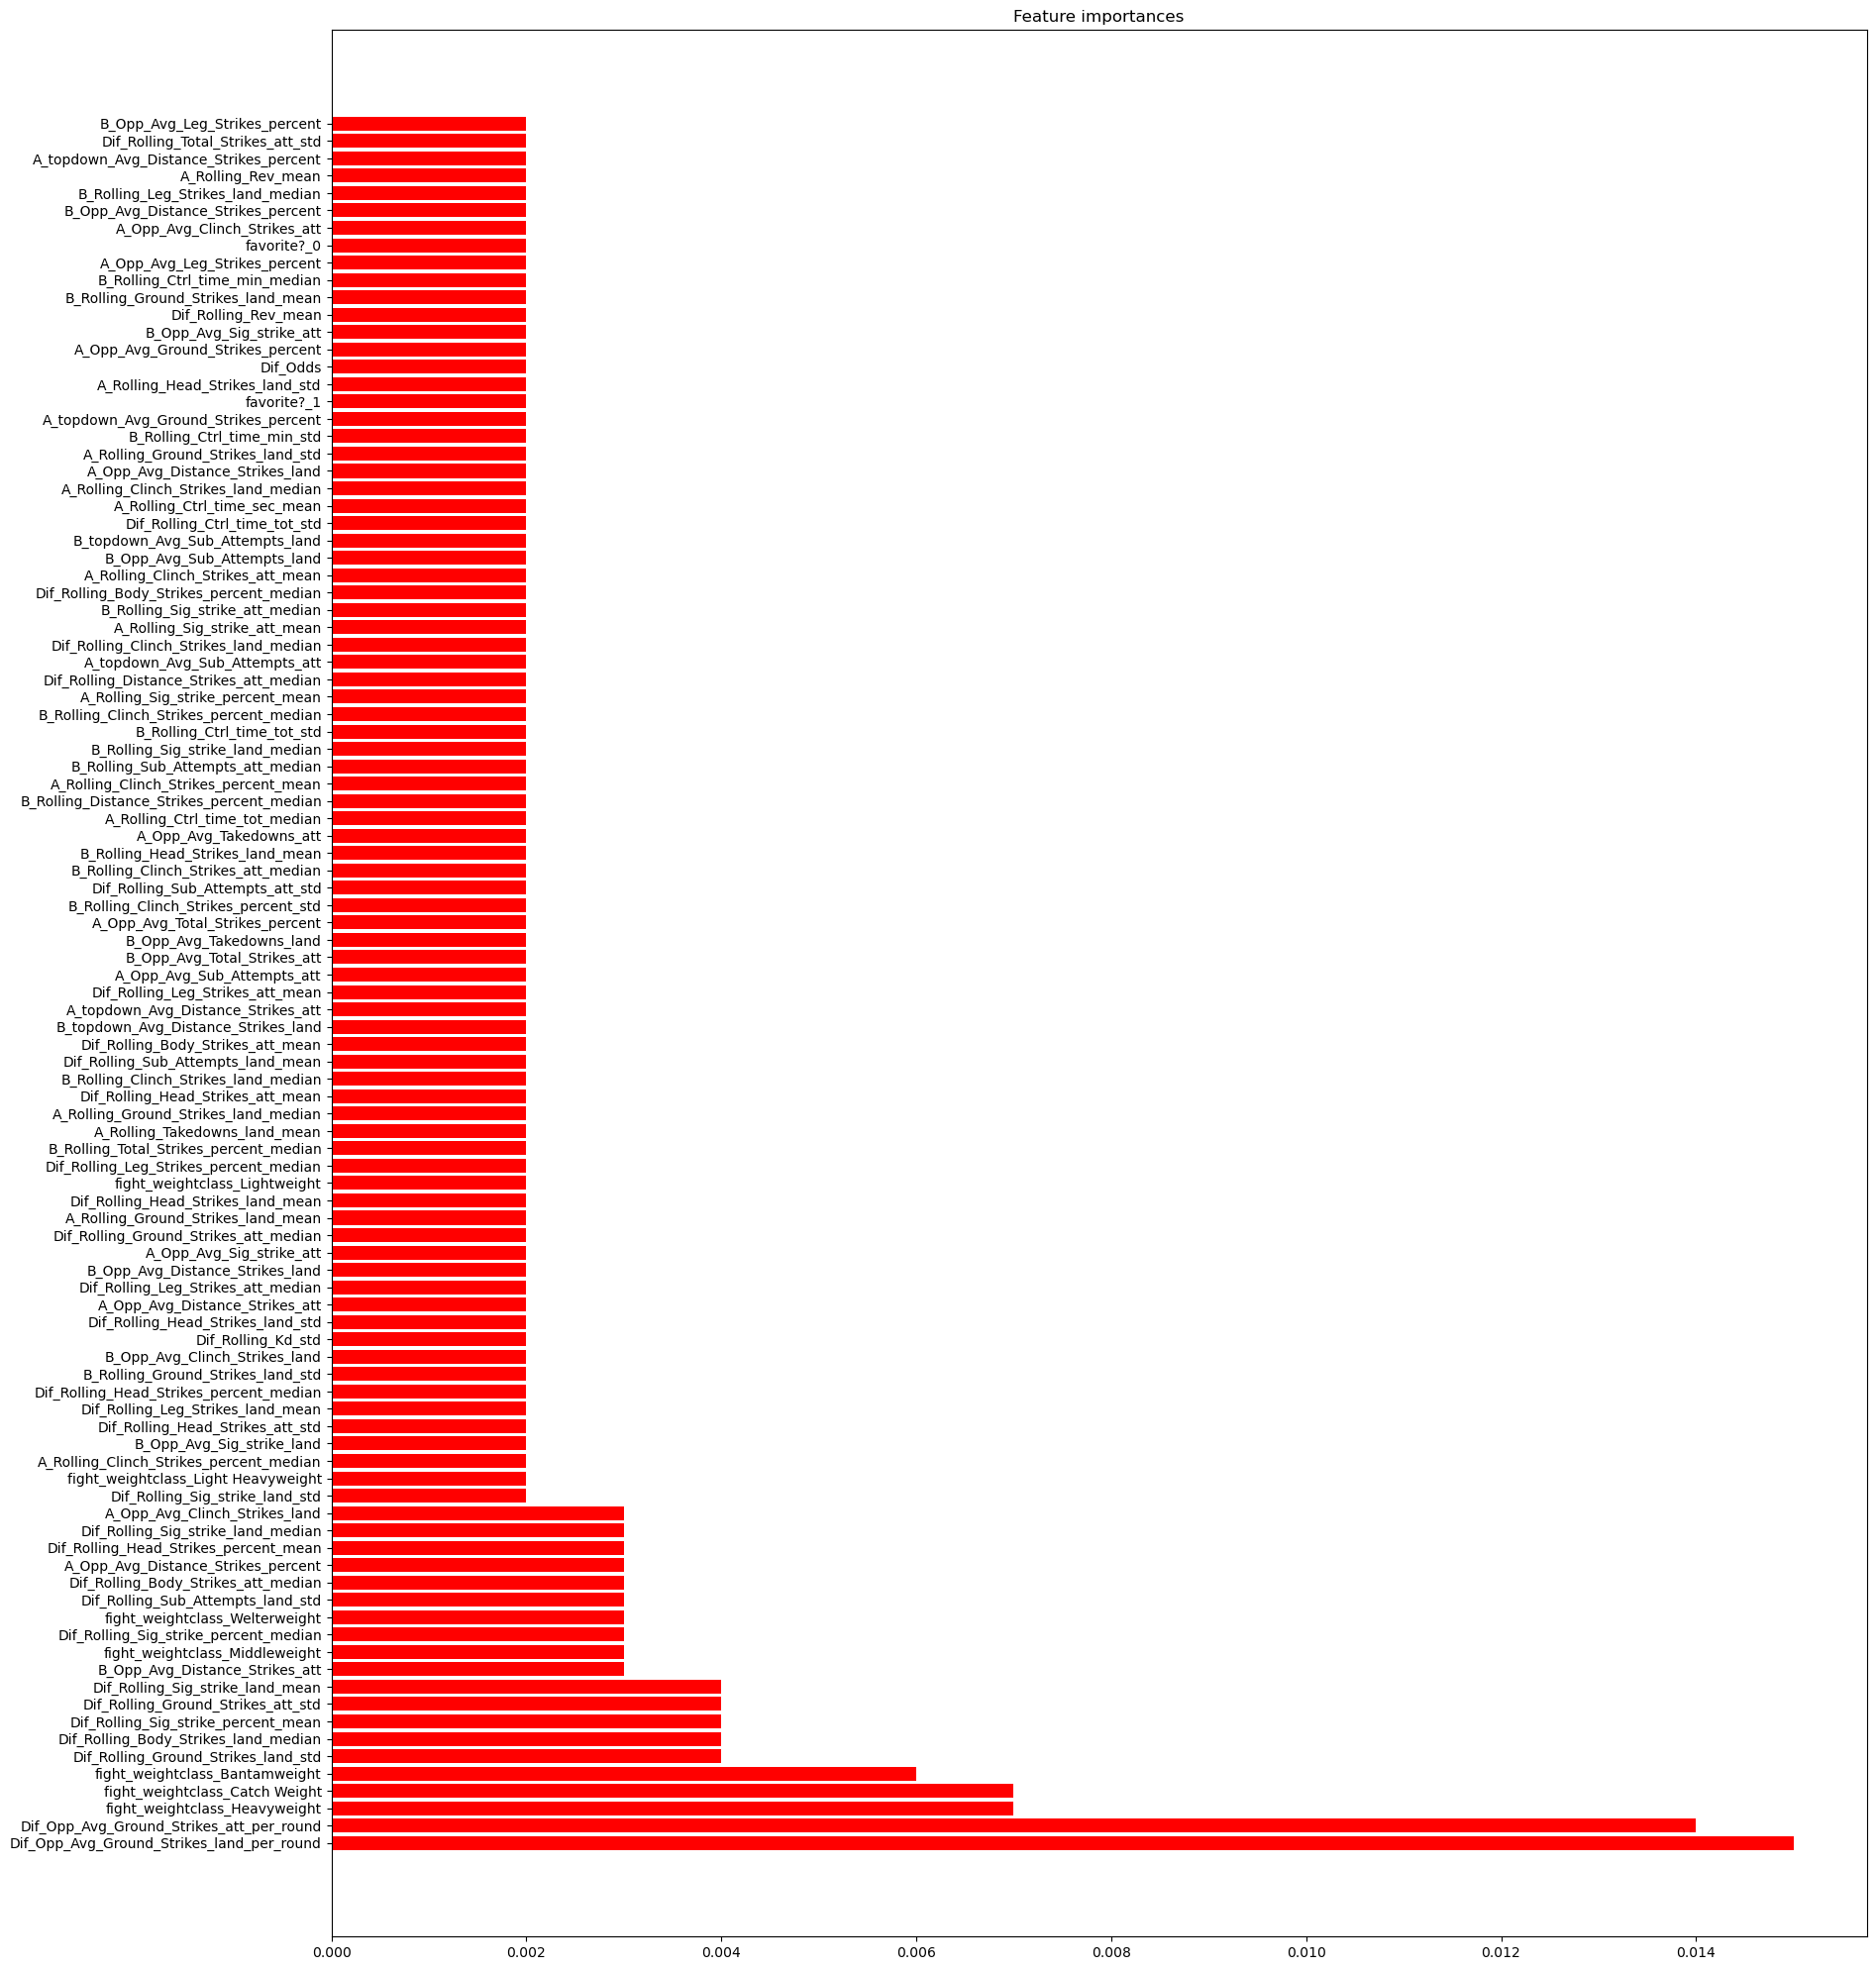

In [265]:
#plot 100 most important features, sorted by largest to smallest
f_imp_df
# plot the feature importances of the forest
plt.figure(figsize=(20, 25))
plt.title("Feature importances")
# bar plot of feature importances on the y axis
plt.barh(range(100), f_imp_df['Importance'][:100], color="r", align="center")
# x axis labels
plt.yticks(range(100), f_imp_df.index[:100])
# show the plot
plt.show()


## Conclusion

Interestingly enough, the most important feature of this model was the difference between a fighters' ground strikes per round. While most other models that I trained included the odds in the top 5 features, this model did not. This is interesting, as it implies that the odds may not be as important as the in-fight statistics.

The final model achieved accuracy of .726.

The model's most important features included:
- Difference between fighter's average ground strikes attempted per round
- Weightclass
- Difference between median ground strikes landed per match
- Difference in submission attempts per match (on average)


The betting favorite wins approximately 62 percent of the time, indicating the lack of "market" (as in, the betting market) knowledge about what makes a winning fighter. That being said, it is our most accurate single statistical metric for predicting a fight. 

Weightclass was a major factor in predicting a fight. This makes sense, as we saw (in the EDA section) that the weightclass of a fighter dramatically changes the importance of certain statistics, such as reach. 

Ground strikes are strikes thrown from a ground position, meaning the martial artists are likely utilizing wrestling, sambo, or jujitsu. The ability to utilize these is indoubtedly important. 

Takedown percentage is the percentage of successful takedowns a martial artist has divided by the number attempted. A takedown typically involves utilizing wrestling skills, although variations with sambo, jujitsu, and judo also occur. It may be important to note that utilizing ground strikes is typically only possible after a successful takedown. 

The number of head strikes is also important, albeit less so than the factors above. Head strikes - or the number of strikes to an opponents head, using boxing, muay thai, kickboxing, etc. - is often thought of as the most valuable technique for success, but we find it just to be among them. 

Finally, significant strikes percentage. This can be thought of as the accuracy of the striker, but does not reflect total output. 


### Future Improvements

There are many improvements that I could think to make, the first being the historical basis of a martial artists' skills. For instance, it seems that those with a Sambo background fare increasingly well against those with a Jujitsu background, but I was unable to find enough data to quantify this. 

One idea that I am leaning towards would be creating a model to identify martial artist's backgrounds through scraping their wikipedia pages. Getting the coaches, trainers, locations, and some methods may help improve the general model. 


### Final Product

The final product can predict the winner of a UFC match with 73% accuracy. The product could be a web or phone application. Further, the product can give some indication to the viewer of WHY one martial artist may win over another martial artist, by reviewing the respective fighter's most important features. A version of this final product is available and working on streamlit. 

